# Fallstudie "Tablet GmbH"

## 1. Einleitung

Dieses Notebook umfasst die Analyse zur Fallstudie "Tablet GmbH", auf der die in der Präsentation erarbeiteten Erkenntnisse basieren. Darüber hinaus beinhaltet das Notebook weitere Analysen, welche die Analysen aus der Präsentation erweitern. Bei der Durchführung der Analyse hat sich die Projektgruppe an dem in der Vorlesung erlernten Business Analytics Prozess orientiert. 

Im Folgenden wird zunächst die Vorgehensweise vorgestellt und die Fragestellungen und Ziele der Analyse aufgestellt. Anschließend werden die Datensätze eingelesen, aufbereitet und transformiert, um danach die Analysen durchzuführen. Hierbei werden für jede Analyse passende Handlungsempfehlungen abgeleitet. Abschließend wird ein Fazit mit den wichtigsten Erkenntnissen und Handlungsempfehlungen gezogen.

Zu der Projektgruppe gehören die folgenden Mitglieder:
- Ali Cicek (1290028)
- Daniel Novakovic (1282962)
- Silas Elbers (1282272)
- Vincenzo Barberi (1290817)

## 2. Vorgehensweise

Die Analyse beinhaltet die folgenden Schritte:

1. Aufstellung der Fragestellungen und Ziele
2. Import der wichtigsten Bibliotheken und Konfiguration allgemeiner Einstellungen
3. Einlesen der genutzten Datensätze
4. Aufbereiten und Transformieren der Datensätze
5. Analyse: Transformieren, Visualisieren und Modellieren, um Erkenntnisse zu gewinnen und Handlungsempfehlungen aufzustellen

Bei dem fünften Schritt ist zu beachten, dass es sich hierbei um einen iterativen Prozess handelt.


## 3. Problemstellung und Ziele

Vor der Durchführung der Analyse wurden folgende Fragestellungen formuliert:

- Warum war die wirtschaftlich Entwicklung der Tablet GmbH in den letzten beiden Jahren negativ? 
- Welche Faktoren beeinflussten die Situation?
- Wie kann die wirtschaftliche Situation der Tablet GmbH verbessert werden?

Als Ergebnisse der Analyse wurden folgenden Ziele definiert:

- Gründe für die wirtschaftliche Entwicklung analysieren
- Handlungsempfehlungen aufstellen, um die wirtschaftliche Entwicklung zu verbessern

## 4. Import der genutzten Bibliotheken und Konfiguration

Um die Analyse möglichst effizient durchzuführen, wurden die Python-Bibliotheken Pandas, Seaborn, Matplotlib, Numpy, Statsmodels verwendet. Um Betriebssystemfunktionalitäten nutzen zu können, wurde außerdem das OS-Modul importiert.

In [1]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import statsmodels.formula.api as smf
import os

In der folgenden Zelle wurden einige Anpassungen an der Formatierung von Dataframes vorgenommen.

In [2]:
# Zahlen in Dataframes ohne wissenschaftliche Notation und mit zwei Nachkommastellen ausgeben
pd.options.display.float_format = '{:,.2f}'.format

# Alle Spalten eines Dataframes anzeigen lassen
pd.set_option('display.max_columns', None)

## 5. Einlesen der Datensätze

Da die Datensätze ursprünglich als Excel-Dateien vorlagen, wurden die Datensätze als csv-Dateien umformatiert. Hierdurch haben sich die Ladezeiten beim Einlesen der Datensätze und der Benutzung ebendieser deutlich verringert. Der Code wurde auskommentiert, da die Umformatierung bereits durchgeführt wurden. Die csv-Dateien befinden sich im `data_csv` Ordner innerhalb des Projektordners.

In [3]:
# input_folder = './data'
# output_folder = './data_csv'

# Output-Verzeichnis erstellen
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# Alle Dateien im Input-Verzeichnis durchgehen, die auf .xlsx oder .xls enden, und in CSV umwandeln
# for file in os.listdir(input_folder):

#     if file.endswith('.xlsx') or file.endswith('.xls'):

#         file_path = os.path.join(input_folder, file)
#         output_file_path = os.path.join(output_folder, os.path.splitext(file)[0] + '.csv')

#         df = pd.read_excel(file_path)
#         df.to_csv(output_file_path, index=False)

In [4]:
# Einlesen der CSV-Dateien
df_crm = pd.read_csv("./data_csv/CRM_data.csv")
df_downtime = pd.read_csv("./data_csv/Downtime.csv")
df_preise = pd.read_csv("./data_csv/Preise.csv")

df_a_online = pd.read_csv("./data_csv/RegionA_online.csv")
df_a_phone = pd.read_csv("./data_csv/RegionA_phone.csv")
df_a_store = pd.read_csv("./data_csv/RegionA_store.csv")

df_b_online = pd.read_csv("./data_csv/RegionB_online.csv")
df_b_phone = pd.read_csv("./data_csv/RegionB_phone.csv")
df_b_store = pd.read_csv("./data_csv/RegionB_store.csv")

df_c_online = pd.read_csv("./data_csv/RegionC_online.csv")
df_c_phone = pd.read_csv("./data_csv/RegionC_phone.csv")
df_c_store = pd.read_csv("./data_csv/RegionC_store.csv")

df_d_online = pd.read_csv("./data_csv/RegionD_online.csv")
df_d_phone = pd.read_csv("./data_csv/RegionD_phone.csv")
df_d_store = pd.read_csv("./data_csv/RegionD_store.csv")

## 6. Aufbereiten der Datensätze

### CRM-Daten:

Der CRM-Datensatz beinhaltet Informationen zu den einzelnen Transaktionen, u. a. die Transaktions-ID, Kundendaten wie z. B. der Name oder die E-Mail und die Kundenbewertung der jeweilgen Transaktion. Im Beobachtungszeitraum (01.11.2021 bis 31.10.20222) gab es insgesamt 340.000 Transaktionen. Da keine Auffälligkeiten im Datensatz gefunden werden konnten, wurde lediglich die Spalte `id` in `transaction_id` umbenannt, da dieser Name auch in den Transaktionsdatensätzen verwendet wurde. Die Spalten `vorname`, `nachname`, `iban` und `email` wurden entfernt, da sie für die Analysen nicht verwendet wurden.

In [5]:
df_crm

,id,vorname,nachname,iban,email,customer_rating
0,0,Curt,Roskoth,DE29557982464763273025,curt.roskoth@gmx.de,7.20
1,1,Till,Klingelhöfer,DE36890407044640624074,till.klingelhöfer@gmail.com,8.40
2,2,Dora,Winkler,DE26144834913572865717,dora.winkler@web.de,6.70
3,3,Tom,Krause,DE16352804742225738584,tom.krause@aol.de,9.40
4,4,Dina,Matthäi,DE24968455090529372560,dina.matthäi@hotmail.de,9.10
...,...,...,...,...,...,...
339995,339995,Martin,Heinrich,DE06833178600136945770,martin.heinrich@aol.de,8.40
339996,339996,Hartwig,Koch II,DE66942502046709852454,hartwig.koch_ii@yahoo.de,8.20
339997,339997,Reza,Boucsein,DE35718077975432977896,reza.boucsein@web.de,9.90
339998,339998,Thekla,Vollbrecht,DE65129187433166256313,thekla.vollbrecht@web.de,8.70


In [6]:
df_crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               340000 non-null  int64  
 1   vorname          340000 non-null  object 
 2   nachname         340000 non-null  object 
 3   iban             340000 non-null  object 
 4   email            340000 non-null  object 
 5   customer_rating  340000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.6+ MB


In [7]:
# Spalte id umbenennen
df_crm = df_crm.rename(columns={
    'id': 'transaction_id'
})

# Spalten vorname, nachname, iban und email entfernen
df_crm = df_crm.drop(columns=['vorname', 'nachname', 'iban', 'email'], axis=1)

df_crm

,transaction_id,customer_rating
0,0,7.20
1,1,8.40
2,2,6.70
3,3,9.40
4,4,9.10
...,...,...
339995,339995,8.40
339996,339996,8.20
339997,339997,9.90
339998,339998,8.70


### Preisdaten:

Die Preisdaten beinhalten die Preise für die Produkte Tablet Basic, Tablet Mini und Tablet Pro für die Jahre 2021 und 2022.

In [8]:
df_preise

,Jahr,product,preis
0,"""2021""",Tablet Pro,999
1,"""""20022""",Tablet Pro,999
2,"""2021""",Tablet Mini,680
3,"""""20022""",Tablet Mini,550
4,"""2021""",Tablet Basics,529
5,"""""20022""",Tablet Basics,499


In [9]:
df_preise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Jahr     6 non-null      object
 1   product  6 non-null      object
 2   preis    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


Zur Aufbereitung dieses Datensatzes wurden u. a. die Werte in der Jahresspalte in das Datumsformat umformatiert und die Produktbezeichnungen vereinheitlicht.

In [10]:
# Umbenennen der Spalte Jahr in year und preis in price
df_preise = df_preise.rename(columns={"Jahr": "year",
                                      "preis": "price"})

# Entfernen von Anfuehrungszeichen
df_preise['year'] = df_preise['year'].apply(lambda x: x.strip('"'))

# Korrigieren der falschen Jahreszahlen
df_preise['year'] = df_preise['year'].replace({'20022': '2022'})

# Umwandeln der Spalte "jahr" in Datumsformat
df_preise['year'] = pd.to_datetime(df_preise['year'], format='%Y')

# Spalte "jahr" als Jahreszahl extrahieren
df_preise['year'] = df_preise['year'].dt.year

# Werte "Tablet Basics" in "Tablet Basic" ändern
df_preise['product'] = df_preise['product'].replace({'Tablet Basics': 'Tablet Basic'})

df_preise

,year,product,price
0,2021,Tablet Pro,999
1,2022,Tablet Pro,999
2,2021,Tablet Mini,680
3,2022,Tablet Mini,550
4,2021,Tablet Basic,529
5,2022,Tablet Basic,499


### Downtime-Daten:

Die Downtime-Daten beinhalten die Ausfallzeiten des Bezahl-Systems für Online-Käufe für die einzelnen Regionen.

In [11]:
df_downtime

,Unnamed: 0,Region A,Region B,Region C,Region D
0,2021,0.10,0.01,0.05,0.00
1,2022,0.15,0.15,0.04,0.01


In [12]:
df_downtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2 non-null      int64  
 1   Region A    2 non-null      float64
 2   Region B    2 non-null      float64
 3   Region C    2 non-null      float64
 4   Region D    2 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 212.0 bytes


In [13]:
# Erste Spalte in year umbenennen
df_downtime = df_downtime.rename(columns={"Unnamed: 0": "year"})

# Spalte year in Datumsformat umwandeln
df_downtime['year'] = pd.to_datetime(df_downtime['year'], format='%Y')

# Spalte year als Jahreszahl extrahieren
df_downtime['year'] = df_downtime['year'].dt.year

df_downtime

,year,Region A,Region B,Region C,Region D
0,2021,0.10,0.01,0.05,0.00
1,2022,0.15,0.15,0.04,0.01


Damit der Downtime-Datensatz im weiteren Verlauf einfacher verwendet werden kann, wurde er so umfortmatiert, dass für jede Jahr-Region-Kombination eine eigene Zeile vorhanden ist.

In [14]:
# df_downtime umformen
df_downtime = df_downtime.melt(id_vars=['year'], var_name='region', value_name='downtime')

# Werte in der Spalte region in A bis D umbenennen
df_downtime['region'] = df_downtime['region'].replace({'Region A': 'A', 
                                                       'Region B': 'B', 
                                                       'Region C': 'C', 
                                                       'Region D': 'D'})

df_downtime

,year,region,downtime
0,2021,A,0.10
1,2022,A,0.15
2,2021,B,0.01
3,2022,B,0.15
4,2021,C,0.05
5,2022,C,0.04
6,2021,D,0.00
7,2022,D,0.01


### Transaktionsdaten:

Die Transaktionsdaten beinhalten genauere Daten zu den 340.000 Transaktionen. Es gibt insgesamt 12 Datensätze für die einzelnen Regionen und die jeweils vorhandenen Verkaufskanäle.

In [15]:
# Hinzufuegen der Spalten region und channel mit den entsprechenden Werten
df_a_online = df_a_online.assign(region='A', channel='online')
df_a_phone = df_a_phone.assign(region='A', channel='phone')
df_a_store = df_a_store.assign(region='A', channel='store')

df_b_online = df_b_online.assign(region='B', channel='online')
df_b_phone = df_b_phone.assign(region='B', channel='phone')
df_b_store = df_b_store.assign(region='B', channel='store')

df_c_online = df_c_online.assign(region='C', channel='online')
df_c_phone = df_c_phone.assign(region='C', channel='phone')
df_c_store = df_c_store.assign(region='C', channel='store')

df_d_online = df_d_online.assign(region='D', channel='online')
df_d_phone = df_d_phone.assign(region='D', channel='phone')
df_d_store = df_d_store.assign(region='D', channel='store')

In [16]:
# Umbenennen der Spalte PRODUKT in product in df_b_phone
df_b_phone = df_b_phone.rename(columns={"PRODUKT": "product"})

Da alle 12 Datensätze den gleichen Aufbau haben, wurden sie in einem Datensatz zusammengefasst, damit alle Transaktionsdaten gleichzeitig verwendet werden können.

In [17]:
# Alle Regionen und Kanaele in einem Dataframe zusammenfassen
df_sales = pd.concat([df_a_online, df_a_phone, df_a_store,
                      df_b_online, df_b_phone, df_b_store, 
                      df_c_online, df_c_phone, df_c_store, 
                      df_d_online, df_d_phone, df_d_store])

In [18]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340000 entries, 0 to 49438
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            340000 non-null  object 
 1   product         340000 non-null  object 
 2   discount        304911 non-null  float64
 3   amount          340000 non-null  int64  
 4   Tablet Basic    340000 non-null  int64  
 5   Tablet Mini     340000 non-null  int64  
 6   Tablet Pro      340000 non-null  int64  
 7   kosten_basic    80000 non-null   float64
 8   kosten_mini     110000 non-null  float64
 9   kosten_pro      150000 non-null  float64
 10  transaction_id  340000 non-null  int64  
 11  region          340000 non-null  object 
 12  channel         340000 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 36.3+ MB


In [19]:
# Umbenennen der Spalten Tablet Basic, Tablet Mini, Tablet Pro, kosten_basic, kosten_mini und kosten_pro
df_sales = df_sales.rename(columns={
    "Tablet Basic": "tablet_basic",
    "Tablet Mini": "tablet_mini",
    "Tablet Pro": "tablet_pro",
    "kosten_basic": "cost_basic",
    "kosten_mini": "cost_mini",
    "kosten_pro": "cost_pro"
})

In [20]:
# Umwandeln der Spalte date in Datumsformat
df_sales["date"] = pd.to_datetime(df_sales["date"])

In den Spalten `cost_basic`, `cost_mini` und `cost_pro` fehlen viele Werte, jedoch sind insgesamt 340.000 Werte vorhanden. Da die Werte in diesen Spalten die Kosten für das in der Transaktion verkaufte Produkt darstellen, wurden die NaN-Werte durch 0 ersetzt.

In [21]:
# NaN in den Spalten cost_basic, cost_mini und cost_pro durch 0 ersetzen
df_sales['cost_basic'] = df_sales['cost_basic'].fillna(0)
df_sales['cost_mini'] = df_sales['cost_mini'].fillna(0)
df_sales['cost_pro'] = df_sales['cost_pro'].fillna(0)

In der Spalte `discount` sind nur 304.911 Werte vorhanden. In dieser Analyse wurde die Annahme getroffen, dass in den Transaktionen, in denen kein Wert in der Rabatt-Spalte vorhanden ist, auch kein Rabatt gewährt wurde. Dementsprechend wurden die fehlenden Werte durch 1 ersetzt. Anschließend wurde der tatsächliche Rabatt berechnet, der in der Transaktion gewährt wurde. 

In [22]:
# NaN in discount durch 1 ersetzen
df_sales['discount'] = df_sales['discount'].fillna(1)

# Tatsaechlichen Wert des Rabatts berechnen
df_sales['discount'] = 1 - df_sales['discount']

Während der Analyse der Transaktionen ist aufgefallen, dass es 4747 Transaktionen gibt, in denen das Produkt "Tablet Basic..." angegeben wurde. In diesen Fällen wurden die Werte durch "Tablet Basic" ersetzt.

In [23]:
# Alle Werte der Spalte product und die Anzahl der Werte anzeigen
df_sales['product'].value_counts()

product
Tablet Pro         150000
Tablet Mini        110000
Tablet Basic        75253
Tablet Basic...      4747
Name: count, dtype: int64

In [24]:
# Werte "Tablet Basic..." in "Tablet Basic" aendern
df_sales['product'] = df_sales['product'].replace({'Tablet Basic...': 'Tablet Basic'})

In [25]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340000 entries, 0 to 49438
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            340000 non-null  datetime64[ns]
 1   product         340000 non-null  object        
 2   discount        340000 non-null  float64       
 3   amount          340000 non-null  int64         
 4   tablet_basic    340000 non-null  int64         
 5   tablet_mini     340000 non-null  int64         
 6   tablet_pro      340000 non-null  int64         
 7   cost_basic      340000 non-null  float64       
 8   cost_mini       340000 non-null  float64       
 9   cost_pro        340000 non-null  float64       
 10  transaction_id  340000 non-null  int64         
 11  region          340000 non-null  object        
 12  channel         340000 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 36.3+ MB


In [26]:
df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel
0,2021-11-01,Tablet Basic,0.00,5,1,0,0,170.02,0.00,0.00,22,A,online
1,2021-11-01,Tablet Basic,0.00,7,1,0,0,170.02,0.00,0.00,24,A,online
2,2021-11-01,Tablet Basic,0.10,7,1,0,0,210.03,0.00,0.00,40,A,online
3,2021-11-01,Tablet Basic,0.00,10,1,0,0,170.08,0.00,0.00,95,A,online
4,2021-11-01,Tablet Basic,0.00,4,1,0,0,170.09,0.00,0.00,104,A,online
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339978,D,store
49435,2022-10-31,Tablet Pro,0.00,1,0,0,1,0.00,0.00,984.99,339981,D,store
49436,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339986,D,store
49437,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,985.00,339991,D,store


## 7. Transformieren

Während der Transformation der Datensätze wurden die Datensätze `df_sales`, `df_crm` und `df_preise` zusammengefügt. Der `df_sales` Datensatz wird als Basis aller Analysen verwendet.

Im ersten Schritt wurden die Datensätze `df_sales` und `df_crm` basierend auf der `transaction_id` zusammengefügt, um die Kundenbewertung in die Analysen einbeziehen zu können.

In [27]:
# df_sales und df_crm zusammenfuegen
df_sales = pd.merge(df_sales, df_crm, left_on='transaction_id', right_on='transaction_id', how='inner')

df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating
0,2021-11-01,Tablet Basic,0.00,5,1,0,0,170.02,0.00,0.00,22,A,online,7.10
1,2021-11-01,Tablet Basic,0.00,7,1,0,0,170.02,0.00,0.00,24,A,online,5.90
2,2021-11-01,Tablet Basic,0.10,7,1,0,0,210.03,0.00,0.00,40,A,online,7.50
3,2021-11-01,Tablet Basic,0.00,10,1,0,0,170.08,0.00,0.00,95,A,online,6.60
4,2021-11-01,Tablet Basic,0.00,4,1,0,0,170.09,0.00,0.00,104,A,online,7.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339978,D,store,7.60
339996,2022-10-31,Tablet Pro,0.00,1,0,0,1,0.00,0.00,984.99,339981,D,store,7.60
339997,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339986,D,store,8.30
339998,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,985.00,339991,D,store,9.20


Aus der Spalte `date` wurden die Spalten `year`, `month` und `week` erstellt. 

In [28]:
# Neue Spalten year, month und week erstellen
df_sales = df_sales.assign(year=df_sales['date'].dt.year,
                           month=df_sales['date'].dt.month,
                           week=df_sales['date'].dt.isocalendar().week)

Nun werden die Datensätze `df_sales` und `df_preise` zusammengefügt.

In [29]:
# Neue Spalte "price" erstellen, basierend auf den Werten in der Spalte "price" in df_preise
df_sales = df_sales.merge(df_preise, on=["year", "product"], how="left")

df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating,year,month,week,price
0,2021-11-01,Tablet Basic,0.00,5,1,0,0,170.02,0.00,0.00,22,A,online,7.10,2021,11,44,529
1,2021-11-01,Tablet Basic,0.00,7,1,0,0,170.02,0.00,0.00,24,A,online,5.90,2021,11,44,529
2,2021-11-01,Tablet Basic,0.10,7,1,0,0,210.03,0.00,0.00,40,A,online,7.50,2021,11,44,529
3,2021-11-01,Tablet Basic,0.00,10,1,0,0,170.08,0.00,0.00,95,A,online,6.60,2021,11,44,529
4,2021-11-01,Tablet Basic,0.00,4,1,0,0,170.09,0.00,0.00,104,A,online,7.30,2021,11,44,529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339978,D,store,7.60,2022,10,44,999
339996,2022-10-31,Tablet Pro,0.00,1,0,0,1,0.00,0.00,984.99,339981,D,store,7.60,2022,10,44,999
339997,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,984.99,339986,D,store,8.30,2022,10,44,999
339998,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,985.00,339991,D,store,9.20,2022,10,44,999


Im Folgenden werden die Kosten aus den Spalten `cost_basic`, `cost_mini` und `cost_pro` in der Spalte `cost` zusammengefasst und die Transaktionsdaten mit den Gesamtkosten, dem Umsatz, dem Stückgewinn und dem Gesamtgewinn angereichert.

In [30]:
# Neue Spalte "cost" erstellen
df_sales['cost'] = df_sales["cost_basic"] + df_sales["cost_mini"] + df_sales["cost_pro"]

# Neue Spalte "cost_total" erstellen
df_sales['cost_total'] = df_sales["cost"] * df_sales["amount"]

# Neue Spalte "revenue" erstellen
df_sales['revenue'] = df_sales['price'] * df_sales['amount'] * (1 - df_sales['discount'])

# Neue Spalte "profit_per_piece" erstellen
df_sales["profit_per_piece"] = (df_sales["price"] * (1 - df_sales["discount"])) - df_sales["cost"]

# Neue Spalte "profit_total" erstellen
df_sales["profit_total"] = df_sales["profit_per_piece"] * df_sales["amount"]

Abschließend werden die Transaktionen nach der Transaktionsnummer sortiert und der Index zurückgesetzt.

In [31]:
# Sortieren nach Datum
df_sales.sort_values(by=['transaction_id'], inplace=True)

# Reset der Index-Spalte
df_sales.reset_index(drop=True, inplace=True)

df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total
0,2021-11-01,Tablet Pro,0.00,4,0,0,1,0.00,0.00,695.00,0,C,store,7.20,2021,11,44,999,695.00,"2,780.00","3,996.00",304.00,"1,216.00"
1,2021-11-01,Tablet Basic,0.00,3,1,0,0,170.00,0.00,0.00,1,D,online,8.40,2021,11,44,529,170.00,510.00,"1,587.00",359.00,"1,077.00"
2,2021-11-01,Tablet Basic,0.10,5,1,0,0,200.00,0.00,0.00,2,C,phone,6.70,2021,11,44,529,200.00,"1,000.01","2,380.50",276.10,"1,380.49"
3,2021-11-01,Tablet Basic,0.00,2,1,0,0,170.00,0.00,0.00,3,B,online,9.40,2021,11,44,529,170.00,340.00,"1,058.00",359.00,718.00
4,2021-11-01,Tablet Basic,0.00,2,1,0,0,150.00,0.00,0.00,4,C,online,9.10,2021,11,44,529,150.00,300.01,"1,058.00",379.00,757.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,865.00,339995,D,phone,8.40,2022,10,44,999,865.00,"1,730.00","1,998.00",134.00,268.00
339996,2022-10-31,Tablet Pro,0.00,3,0,0,1,0.00,0.00,865.00,339996,D,phone,8.20,2022,10,44,999,865.00,"2,594.99","2,997.00",134.00,402.01
339997,2022-10-31,Tablet Pro,0.00,2,0,0,1,0.00,0.00,945.00,339997,D,store,9.90,2022,10,44,999,945.00,"1,890.00","1,998.00",54.00,108.00
339998,2022-10-31,Tablet Pro,0.00,4,0,0,1,0.00,0.00,865.00,339998,B,store,8.70,2022,10,44,999,865.00,"3,460.00","3,996.00",134.00,536.00


In [32]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              340000 non-null  datetime64[ns]
 1   product           340000 non-null  object        
 2   discount          340000 non-null  float64       
 3   amount            340000 non-null  int64         
 4   tablet_basic      340000 non-null  int64         
 5   tablet_mini       340000 non-null  int64         
 6   tablet_pro        340000 non-null  int64         
 7   cost_basic        340000 non-null  float64       
 8   cost_mini         340000 non-null  float64       
 9   cost_pro          340000 non-null  float64       
 10  transaction_id    340000 non-null  int64         
 11  region            340000 non-null  object        
 12  channel           340000 non-null  object        
 13  customer_rating   340000 non-null  float64       
 14  year

## 8. Analyse der allgemeinen wirtschaftlichen Entwicklung

Bevor die Gründe für die negative wirtschaftliche Entwicklung analysiert werden, muss ermittelt werden, ob die wirtschaftliche Entwicklung wirklich so negativ war wie angenommen und ob die Befürchtung, das Unternehmen könnte in eine Krise geraten, begründet ist.

In diesem Teil der Analyse wird daher die allgemeine wirtschaftliche Entwicklung der Tablet GmbH in den letzten 12 Monaten (Anfang November 2021 bis Ende Oktober 2022) analysiert. Hierfür werden zunächst die Verkaufsmenge, der Umsatz, die Kosten und der Gewinn je Monat summiert und anschließend visualisiert, um einen möglichen Trend ableiten zu können. Zusätzlich zur gesamten Verkaufsmenge wird auch die durchschnittliche Verkaufsmenge je Transaktion analysiert. Außerdem wird die Entwicklung der Umsatzrendite analysiert, um das Verhältnis des Gewinns zum Umsatz genauer zu untersuchen.

### Entwicklung der Kennzahlen Verkaufsmenge, Umsatz, Kosten, Gewinn und Umsatzrendite

Im ersten Schritt werden die Kennzahlen monatlich aggregiert.

In [33]:
# df_sales nach Jahr und Monat gruppieren und die Summe der Spalten der Verkaufsmenge, des Umsatzes, der Kosten und des Profits berechnen
df_development = df_sales.groupby(['year', 'month']).agg({"amount" : "sum",
                                                          "revenue" : "sum",
                                                          "cost_total" : "sum",
                                                          "profit_total" : "sum"})

# Berechnung der Umsatzrendite
df_development['profit_margin'] = df_development['profit_total'] / df_development['revenue'] * 100

# Reset der Index-Spalte, um die Spalten "year" und "month" zu erhalten
df_development.reset_index(inplace=True)

df_development

,year,month,amount,revenue,cost_total,profit_total,profit_margin
0,2021,11,61277,"37,858,455.40","16,974,516.77","20,883,938.63",55.16
1,2021,12,65326,"41,972,763.70","20,653,054.65","21,319,709.05",50.79
2,2022,1,64617,"39,768,532.90","23,106,856.89","16,661,676.01",41.90
3,2022,2,61855,"39,256,396.10","23,875,462.54","15,380,933.56",39.18
4,2022,3,68756,"45,568,506.50","29,208,698.42","16,359,808.08",35.90
5,2022,4,65883,"45,260,948.30","30,260,821.29","15,000,127.01",33.14
6,2022,5,70301,"49,696,519.90","34,384,042.72","15,312,477.18",30.81
7,2022,6,69096,"51,100,213.70","36,803,028.94","14,297,184.76",27.98
8,2022,7,70883,"53,743,276.10","39,839,441.12","13,903,834.98",25.87
9,2022,8,73857,"57,443,737.60","43,706,180.05","13,737,557.55",23.91


Anschließend werden die Entwicklungen als Liniendiagramme visualisiert, um mögliche Trends erkennen zu können.

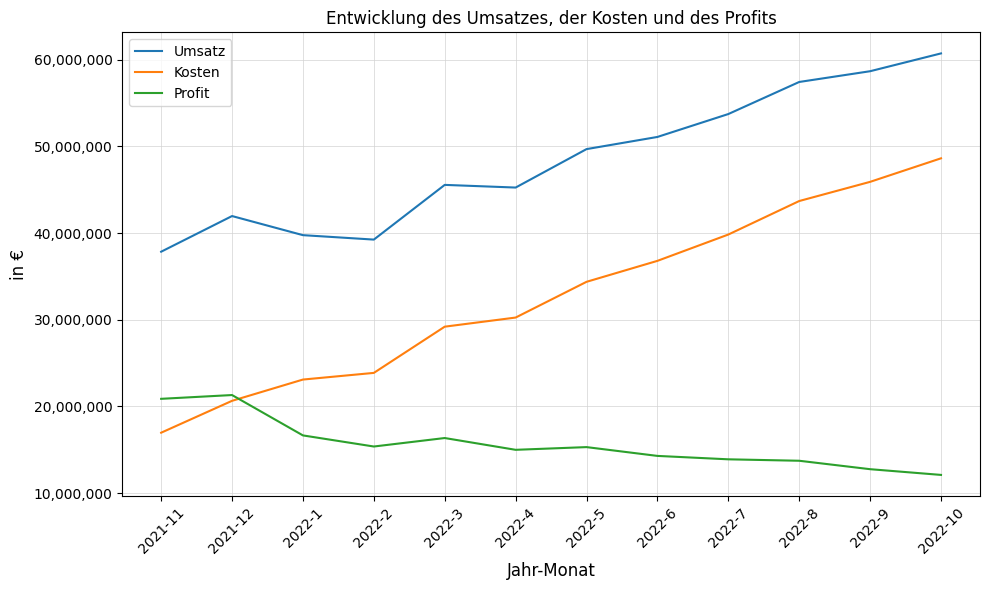

In [34]:
# Visualisierung der Entwicklung des Umsatzes, der Kosten und des Profits
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['revenue'])
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['cost_total'])
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['profit_total'])

# Grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in €', fontsize=12)
ax.set_title('Entwicklung des Umsatzes, der Kosten und des Profits')

# Tausendertrennzeichen hinzufuegen
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Legende hinzufuegen
ax.legend(['Umsatz', 'Kosten', 'Profit'])

# Diagramm anzeigen
plt.tight_layout()
plt.show()

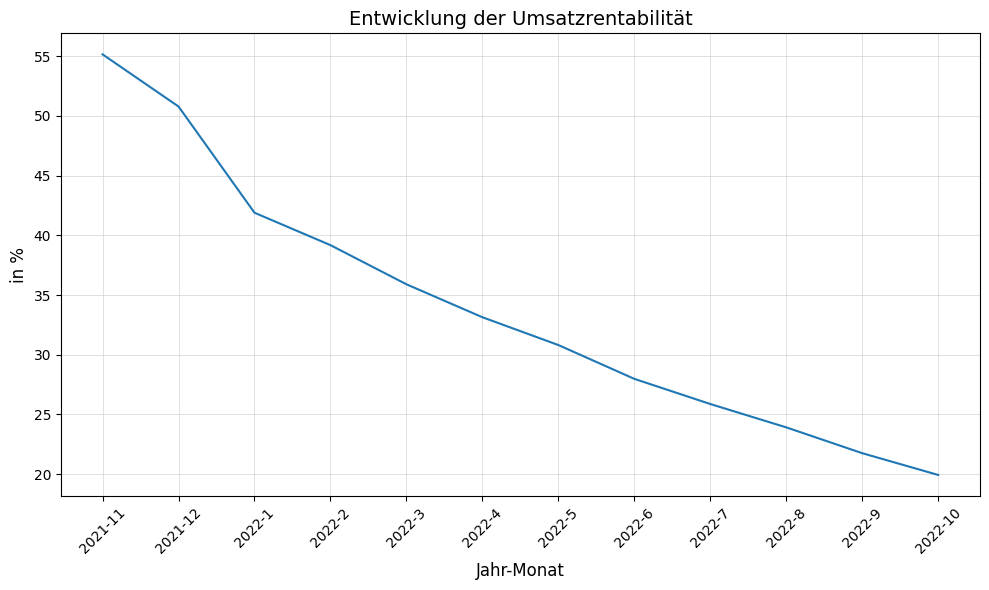

In [35]:
# Visualisierung der Entwicklung der Umsatzrentabilitaet
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['profit_margin'])

# Grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in %', fontsize=12)
ax.set_title('Entwicklung der Umsatzrentabilität', fontsize=14)

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

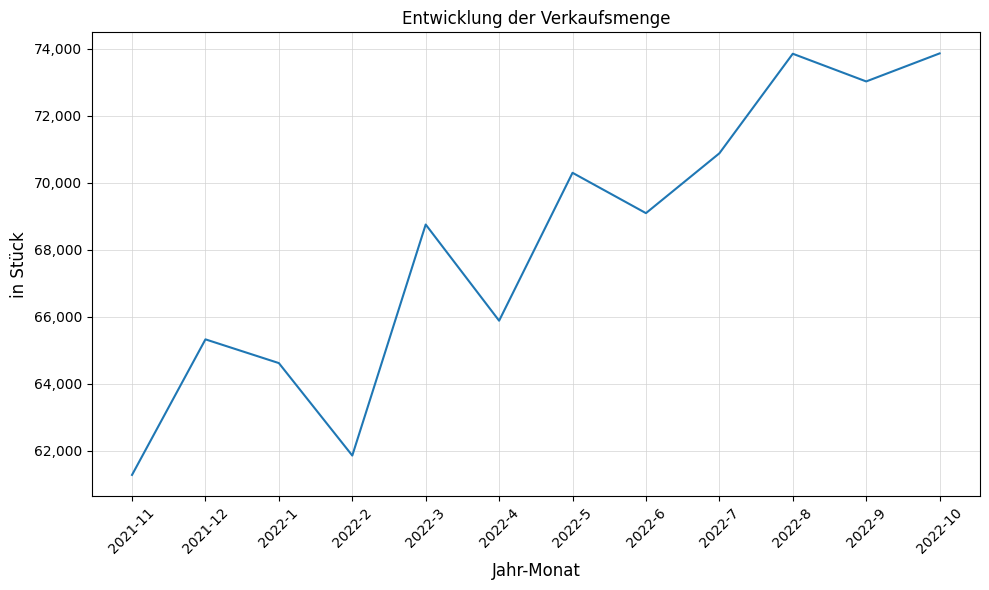

In [36]:
# Visualisierung der Entwicklung der Verkaufsmenge
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
ax.plot(df_development['year'].astype(str) + '-' + df_development['month'].astype(str), df_development['amount'])

# Grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in Stück', fontsize=12)
ax.set_title('Entwicklung der Verkaufsmenge')

# Tausendertrennzeichen hinzufuegen
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

### Entwicklung der durchschnittlichen Verkaufsmenge je Transaktion

In [37]:
# Durchschnittliche Anzahl der verkauften Produkte pro Transaktion
avg_menge_pro_monat = df_sales.groupby(['year', 'month']).agg({"amount" : "mean"})
avg_menge_pro_monat.reset_index(inplace=True)
avg_menge_pro_monat

,year,month,amount
0,2021,11,2.61
1,2021,12,2.59
2,2022,1,2.47
3,2022,2,2.51
4,2022,3,2.50
5,2022,4,2.40
6,2022,5,2.40
7,2022,6,2.37
8,2022,7,2.30
9,2022,8,2.34


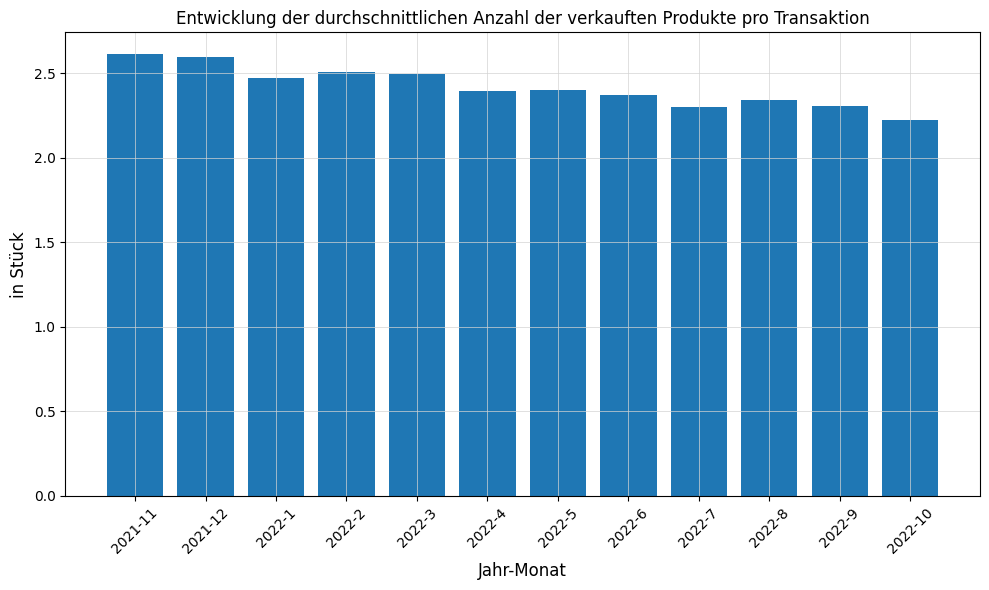

In [38]:
# Visualisierung der Entwicklung der durchschnittlichen Anzahl der verkauften Produkte pro Transaktion
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
ax.bar(avg_menge_pro_monat['year'].astype(str) + '-' + avg_menge_pro_monat['month'].astype(str), avg_menge_pro_monat['amount'])

# Grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in Stück', fontsize=12)
ax.set_title('Entwicklung der durchschnittlichen Anzahl der verkauften Produkte pro Transaktion')

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

### Prozentuelle Veränderung vom Anfang bis zum Ende des Beobachtungszeitraums (Anfang November 2021 - Ende Oktober 2022)

Bei der Berechnung der prozentuellen Veränderung wurden zwei Zeitpunkte miteinander verglichen: der erste Zeitpunkt (01.11.2021) und der letzte Zeitpunkt im Beobachtungszeitraum (31.10.2022).

In [39]:
# Neues Dataframe mit KPIs erstellen
df_kpi = pd.DataFrame(columns=['kpi', 'change_in_percent'])

# Liste mit den KPIs erstellen
kpi = ['amount', 'revenue', 'cost_total', 'profit_total', 'profit_margin']

# Berechnung der Veraenderung in Prozent
for i in kpi:
    change = (df_development[i].iloc[-1] / df_development[i].iloc[0] - 1) * 100
    df_kpi.loc[len(df_kpi)] = [i, change]

df_kpi

,kpi,change_in_percent
0,amount,20.55
1,revenue,60.44
2,cost_total,186.52
3,profit_total,-42.04
4,profit_margin,-63.87


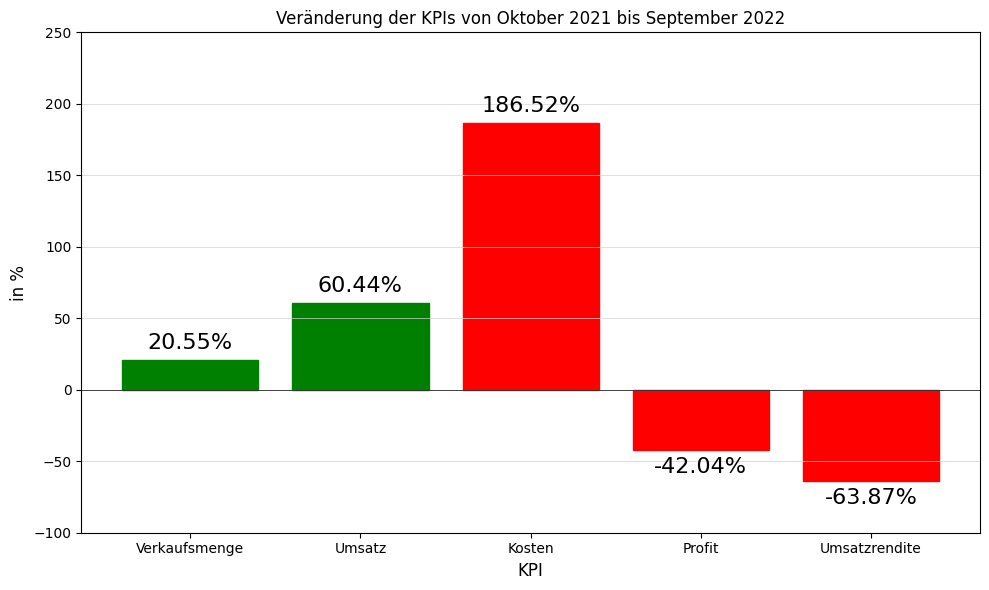

In [40]:
# Visualisierung der Veraenderung der KPIs als Saeulendiagramm
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
bars = ax.bar(df_kpi['kpi'], df_kpi['change_in_percent'])

# Achsenbeschriftung und Titel hinzufuegen
ax.set_title('Veränderung der KPIs von Oktober 2021 bis September 2022')
ax.set_xlabel('KPI', fontsize=12)
ax.set_ylabel('in %', fontsize=12)

# Horizontales Grid hinzufuegen
ax.yaxis.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Linie bei 0 hinzufuegen
ax.axhline(0, color='black', linewidth=0.5)

# Farbe der Saeulen anpassen
ax.patches[0].set_color('green')
ax.patches[1].set_color('green')
ax.patches[2].set_color('red')
ax.patches[3].set_color('red')
ax.patches[4].set_color('red')

# Beschriftung der Saeulen hinzufuegen
ax.bar_label(bars, fmt='%.2f%%', padding=5, fontsize=16)

# y-Achsenskala anpassen
ax.set_ylim(ymax=250)
ax.set_ylim(ymin=-100)

# X-Achsenbeschriftung
ax.xaxis.set_ticks(np.arange(5))
ax.set_xticklabels(['Verkaufsmenge', 'Umsatz', 'Kosten', 'Profit', 'Umsatzrendite'])

# Diagramm anzeigen
plt.tight_layout()
plt.show()

**Erkenntnisse der Analyse:**

Die Betrachtung der allgemeinen wirtschaftlichen Entwicklung der Tablet GmbH in den letzten 12 Monaten zeigt sowohl positive als auch negative Trends auf.

Auf der einen Seite wurde die monatliche Verkaufsmenge von rund 61.000 Stück im Oktober 2021 um 20 % auf fast 74.000 Stück im November 2022 gesteigert. Einen ähnlichen positiven Trend kann man in der Umsatzentwicklung erkennen. Hier ist der Umsatz im Beobachtungszeitraum um rund 60 % gestiegen. Im Hinblick auf die durchschnittliche Verkaufsmenge je Transaktion ist jedoch ein leichter Abwärtstrend zu beobachten.

Auf der anderen Seite ist ein drastischer Negativtrend in der Kosten-, Profit- und Umsatzrenditenentwicklung erkennbar. Die Kosten sind im Verlauf der letzten 12 Monate mit einem Zuwachs von 186 % geradezu explodiert, wodurch der Gewinn um rund 42 % gesunken ist. Dementsprechend ist auch die Umsatzrendite von ca. 55 % im Oktober 2021 auf ca. 19 % im November 2022 abgestürzt, was einer Senkung von ca. 64 % entspricht.

Zusammmengefasst lässt sich also sagen, dass die wirtschaftliche Entwicklung der Tablet GmbH definitiv negativ war und dass trotz Wachstum ein Gewinnrückgang zu verzeichnen ist. Die folgenden Analysen untersuchen nun die Gründe für diese Entwicklung, um daraufhin geeignete Handlungsempfehlungen zu formulieren.


## 9. Analyse der Produkte

### Umsatzanteile nach Produkten

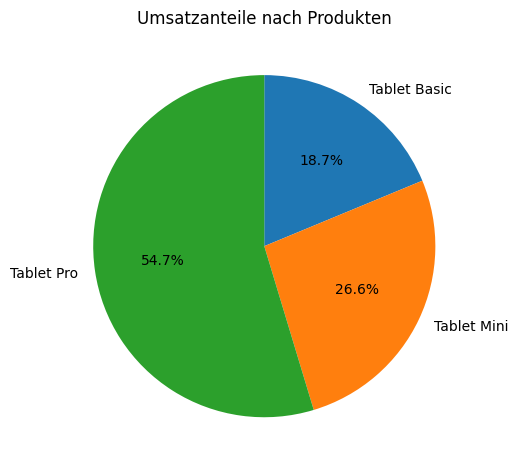

In [41]:
# Umsatzanteile nach Produkt berechnen
df_sales_per_product = df_sales.groupby(['product'])['revenue'].sum()

# Kreisdiagramm
plt.pie(df_sales_per_product, labels=df_sales_per_product.index, autopct='%1.1f%%', counterclock=False, startangle=90)
plt.title('Umsatzanteile nach Produkten')

plt.tight_layout()
plt.show()

### Entwicklung der wirtschaftlichen Kennzahlen

In [42]:
# Anzahl verkaufter Produkte, Umsatz, Kosten und Gewinn pro Monat für Produkt "Tablet Basic"
df_sales_basic = df_sales[df_sales['product'] == 'Tablet Basic'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Anzahl verkaufter Produkte, Umsatz, Kosten und Gewinn pro Monat für Produkt "Tablet Mini"
df_sales_mini = df_sales[df_sales['product'] == 'Tablet Mini'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Anzahl verkaufter Produkte, Umsatz, Kosten und Gewinn pro Monat für Produkt "Tablet Pro"
df_sales_pro = df_sales[df_sales['product'] == 'Tablet Pro'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

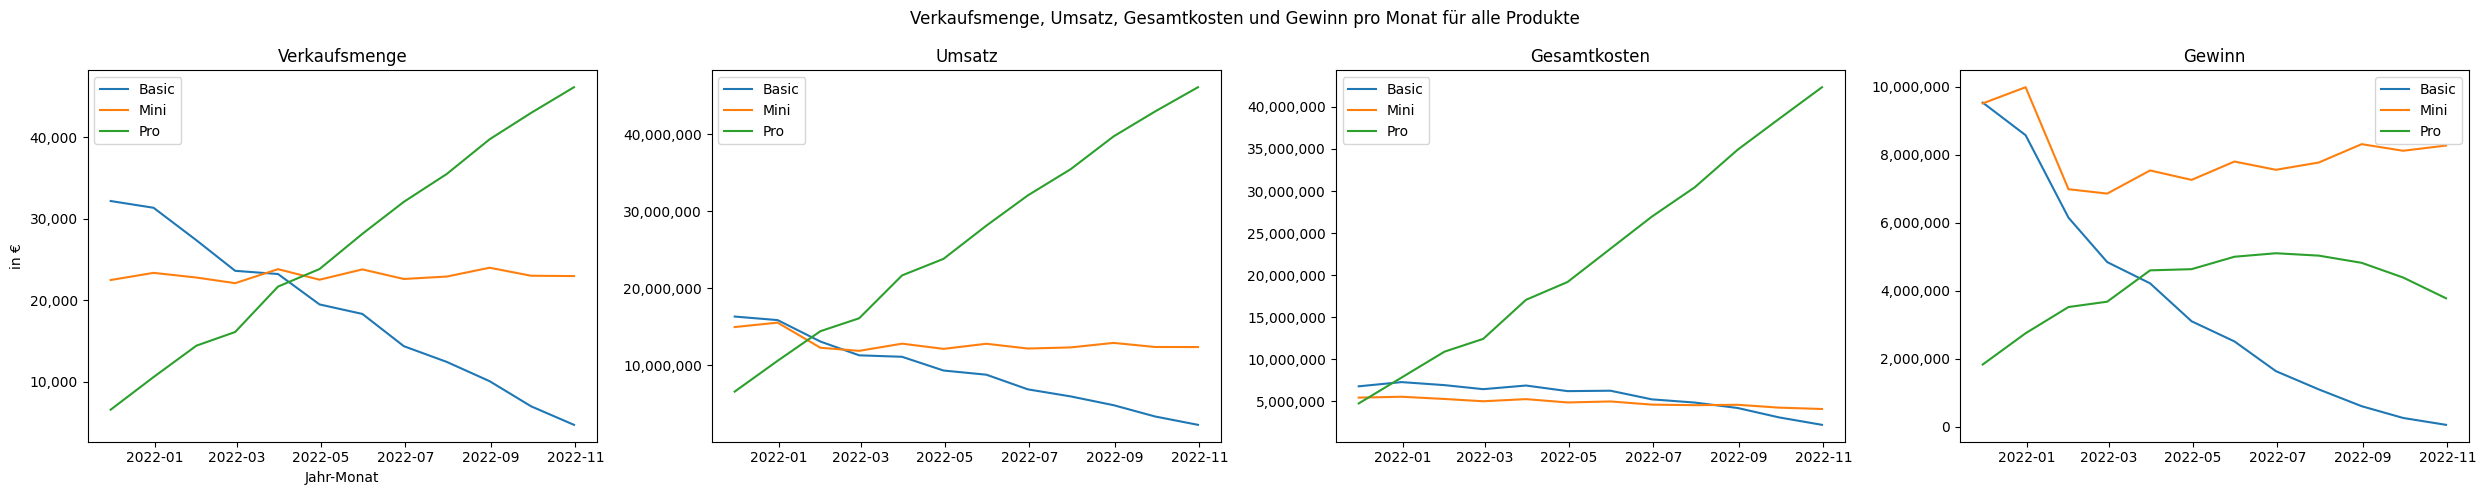

In [43]:
# Umsatz, Kosten und Gewinn pro Monat für alle Produkte jeweils als Subplot visualisieren und alle Subplots zusammenfassen
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle('Verkaufsmenge, Umsatz, Gesamtkosten und Gewinn pro Monat für alle Produkte')

axes[0].plot(df_sales_basic['amount'], label='Basic')
axes[0].plot(df_sales_mini['amount'], label='Mini')
axes[0].plot(df_sales_pro['amount'], label='Pro')
axes[0].set_title('Verkaufsmenge')
axes[0].set_xlabel('Jahr-Monat')
axes[0].set_ylabel('in Stück')
axes[0].legend()

axes[1].plot(df_sales_basic['revenue'], label='Basic')
axes[1].plot(df_sales_mini['revenue'], label='Mini')
axes[1].plot(df_sales_pro['revenue'], label='Pro')
axes[1].set_title('Umsatz')
axes[0].set_xlabel('Jahr-Monat')
axes[0].set_ylabel('in €')
axes[1].legend()

axes[2].plot(df_sales_basic['cost_total'], label='Basic')
axes[2].plot(df_sales_mini['cost_total'], label='Mini')
axes[2].plot(df_sales_pro['cost_total'], label='Pro')
axes[2].set_title('Gesamtkosten')
axes[0].set_xlabel('Jahr-Monat')
axes[0].set_ylabel('in €')
axes[2].legend()

axes[3].plot(df_sales_basic['profit_total'], label='Basic')
axes[3].plot(df_sales_mini['profit_total'], label='Mini')
axes[3].plot(df_sales_pro['profit_total'], label='Pro')
axes[3].set_title('Gewinn')
axes[0].set_xlabel('Jahr-Monat')
axes[0].set_ylabel('in €')
axes[3].legend()

# y-Achse in Millionen formatieren
for ax in axes:
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()

### Analyse der Gesamt- und Stückkosten

In [44]:
# Aufsummierte Kosten und Stueckkosten der Produkte
df_unit_cost = df_sales.groupby('product').agg({'amount': "sum", 'cost_total' : "sum"})
df_unit_cost['cost_per_unit'] = df_unit_cost['cost_total'] / df_unit_cost['amount']
df_unit_cost.reset_index()

,product,amount,cost_total,cost_per_unit
0,Tablet Basic,224240,"66,372,966.49",295.99
1,Tablet Mini,276515,"58,453,967.68",211.40
2,Tablet Pro,317993,"268,538,743.05",844.48


**Erkenntnisse:**

Das Tablet Pro ist das Produkt, welches die meisten Kosten verursacht. Dementsprechend hoch sind auch die Stückkosten.
Das Tablet Basic ist, verglichen zum Tablet Pro, ein Produkt das wenig Kosten verursacht.
Das Tablet Mini positioniert sich kostentechnisch als bestes Produkt.

### Analyse der Stückkosten und -profitentwicklung

In [45]:
# Profit pro Stück
df_profit_per_piece = df_sales.groupby(['year', 'month', "product",]).agg({"profit_total" : "sum", "amount" : "sum"})
df_profit_per_piece.reset_index(inplace=True)

df_profit_per_piece['profit_per_piece'] = df_profit_per_piece['profit_total'] / df_profit_per_piece['amount']
df_profit_per_piece

,year,month,product,profit_total,amount,profit_per_piece
0,2021,11,Tablet Basic,"9,539,310.83",32195,296.30
1,2021,11,Tablet Mini,"9,516,536.79",22499,422.98
2,2021,11,Tablet Pro,"1,828,091.02",6583,277.70
3,2021,12,Tablet Basic,"8,579,203.58",31366,273.52
4,2021,12,Tablet Mini,"9,992,417.97",23376,427.46
5,2021,12,Tablet Pro,"2,748,087.50",10584,259.65
6,2022,1,Tablet Basic,"6,151,714.70",27377,224.70
7,2022,1,Tablet Mini,"6,989,684.71",22802,306.54
8,2022,1,Tablet Pro,"3,520,276.59",14438,243.82
9,2022,2,Tablet Basic,"4,843,143.12",23627,204.98


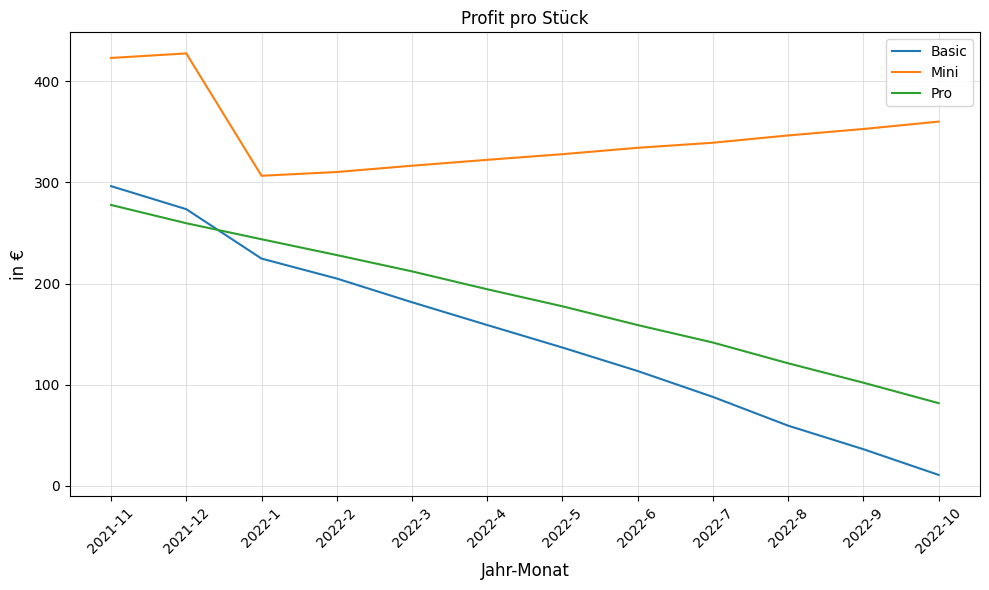

In [46]:
# Profit pro Stück plotten
fig, ax = plt.subplots(figsize=(10, 6))

# Daten plotten
ax.plot(df_profit_per_piece[df_profit_per_piece['product'] == 'Tablet Basic']['year'].astype(str) + '-' + df_profit_per_piece[df_profit_per_piece['product'] == 'Tablet Basic']['month'].astype(str), df_profit_per_piece[df_profit_per_piece['product'] == 'Tablet Basic']['profit_per_piece'])
ax.plot(df_profit_per_piece[df_profit_per_piece['product'] == 'Tablet Mini']['year'].astype(str) + '-' + df_profit_per_piece[df_profit_per_piece['product'] == 'Tablet Mini']['month'].astype(str), df_profit_per_piece[df_profit_per_piece['product'] == 'Tablet Mini']['profit_per_piece'])
ax.plot(df_profit_per_piece[df_profit_per_piece['product'] == 'Tablet Pro']['year'].astype(str) + '-' + df_profit_per_piece[df_profit_per_piece['product'] == 'Tablet Pro']['month'].astype(str), df_profit_per_piece[df_profit_per_piece['product'] == 'Tablet Pro']['profit_per_piece'])

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in €', fontsize=12)
ax.set_title('Profit pro Stück')

# Legende hinzufuegen
ax.legend(['Basic', 'Mini', 'Pro'])

# grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

In [47]:
# Kosten pro Stück
df_cost_per_piece = df_sales.groupby(['year', 'month', "product",]).agg({"cost_total" : "sum", "amount" : "sum"})
df_cost_per_piece.reset_index(inplace=True)

df_cost_per_piece['cost_per_piece'] = df_cost_per_piece['cost_total'] / df_cost_per_piece['amount']
df_cost_per_piece

,year,month,product,cost_total,amount,cost_per_piece
0,2021,11,Tablet Basic,"6,784,359.57",32195,210.73
1,2021,11,Tablet Mini,"5,441,831.21",22499,241.87
2,2021,11,Tablet Pro,"4,748,325.98",6583,721.30
3,2021,12,Tablet Basic,"7,285,136.12",31366,232.26
4,2021,12,Tablet Mini,"5,542,590.03",23376,237.11
5,2021,12,Tablet Pro,"7,825,328.50",10584,739.35
6,2022,1,Tablet Basic,"6,924,131.20",27377,252.92
7,2022,1,Tablet Mini,"5,279,440.29",22802,231.53
8,2022,1,Tablet Pro,"10,903,285.41",14438,755.18
9,2022,2,Tablet Basic,"6,445,184.98",23627,272.79


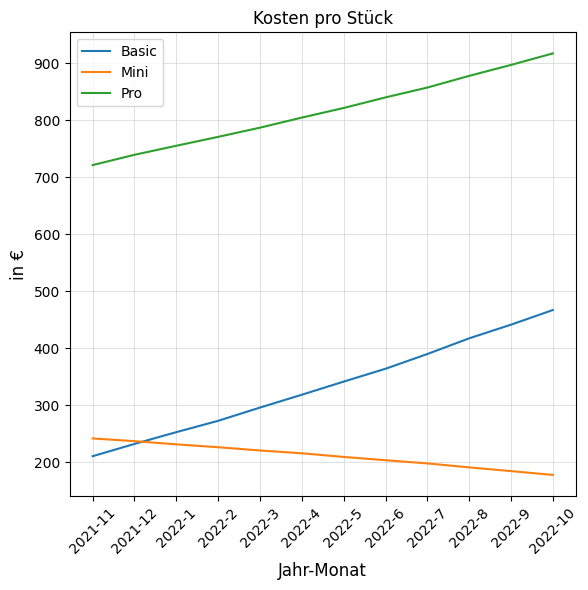

In [48]:
# Kosten pro Stück plotten
fig, ax = plt.subplots(figsize=(6, 6))

# Daten plotten
ax.plot(df_cost_per_piece[df_cost_per_piece['product'] == 'Tablet Basic']['year'].astype(str) + '-' + df_cost_per_piece[df_cost_per_piece['product'] == 'Tablet Basic']['month'].astype(str), df_cost_per_piece[df_cost_per_piece['product'] == 'Tablet Basic']['cost_per_piece'])
ax.plot(df_cost_per_piece[df_cost_per_piece['product'] == 'Tablet Mini']['year'].astype(str) + '-' + df_cost_per_piece[df_cost_per_piece['product'] == 'Tablet Mini']['month'].astype(str), df_cost_per_piece[df_cost_per_piece['product'] == 'Tablet Mini']['cost_per_piece'])
ax.plot(df_cost_per_piece[df_cost_per_piece['product'] == 'Tablet Pro']['year'].astype(str) + '-' + df_cost_per_piece[df_cost_per_piece['product'] == 'Tablet Pro']['month'].astype(str), df_cost_per_piece[df_cost_per_piece['product'] == 'Tablet Pro']['cost_per_piece'])

# Achsenbeschriftung und Titel hinzufuegen
ax.set_xlabel('Jahr-Monat', fontsize=12)
ax.set_ylabel('in €', fontsize=12)
ax.set_title('Kosten pro Stück')

# Legende hinzufuegen
ax.legend(['Basic', 'Mini', 'Pro'])

# grid hinzufuegen
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# X-Achsenbeschriftung drehen
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

### Aggregierung der wirtschaftlichen Kennzahlen nach Produkten, Kanälen und Regionen

In [49]:
#Anzahl verkaufter Produkte, Umsatz, totale Kosten und totale Gewinn pro Produkt, pro Kanal oder pro Region
df_sales_basic_channel = df_sales[df_sales['product'] == 'Tablet Basic'].groupby('channel').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})
df_sales_basic_region = df_sales[df_sales['product'] == 'Tablet Basic'].groupby('region').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_basic_channel.reset_index(inplace=True)
df_sales_basic_region.reset_index(inplace=True)

df_sales_mini_channel = df_sales[df_sales['product'] == 'Tablet Mini'].groupby('channel').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})
df_sales_mini_region = df_sales[df_sales['product'] == 'Tablet Mini'].groupby('region').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_mini_channel.reset_index(inplace=True)
df_sales_mini_region.reset_index(inplace=True)

df_sales_pro_channel = df_sales[df_sales['product'] == 'Tablet Pro'].groupby('channel').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})
df_sales_pro_region = df_sales[df_sales['product'] == 'Tablet Pro'].groupby('region').agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_pro_channel.reset_index(inplace=True)
df_sales_pro_region.reset_index(inplace=True)

### Analyse der Produktkosten pro Kanal

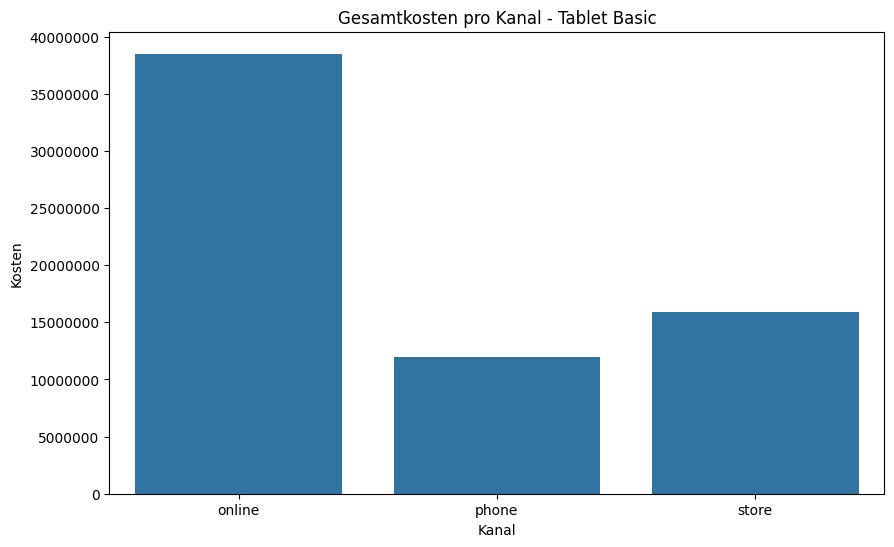

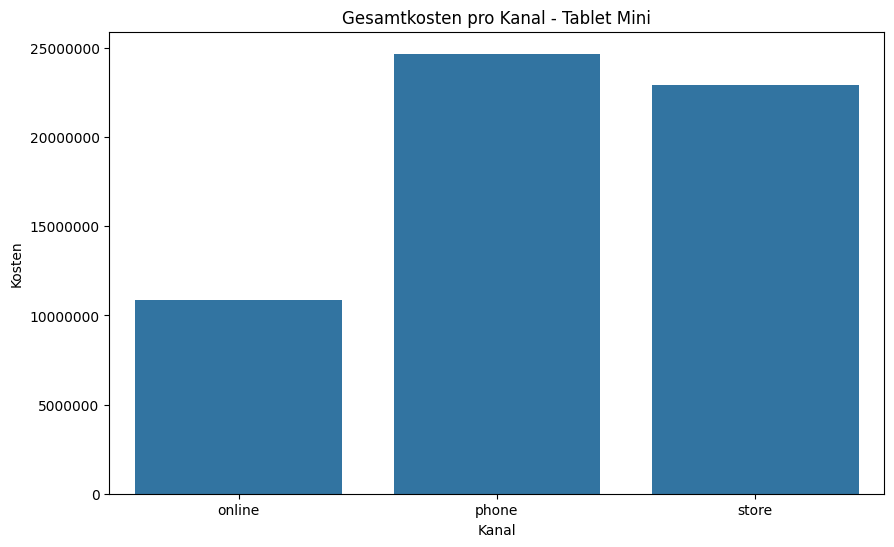

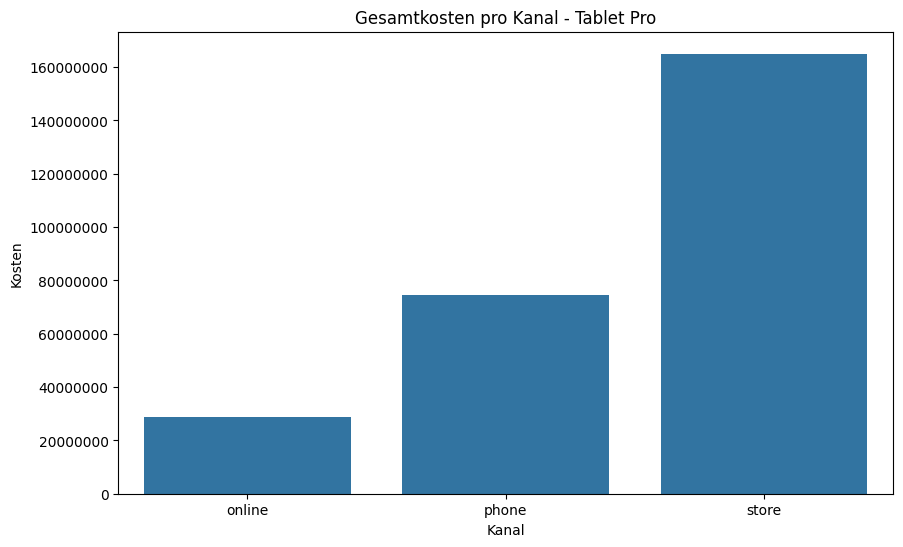

In [50]:
# Graphen plotten
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_basic_channel, x='channel', y='cost_total')
plt.title('Gesamtkosten pro Kanal - Tablet Basic')
plt.xlabel('Kanal')
plt.ylabel('Kosten')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_mini_channel, x='channel', y='cost_total')
plt.title('Gesamtkosten pro Kanal - Tablet Mini')
plt.xlabel('Kanal')
plt.ylabel('Kosten')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_pro_channel, x='channel', y='cost_total')
plt.title('Gesamtkosten pro Kanal - Tablet Pro')
plt.xlabel('Kanal')
plt.ylabel('Kosten')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Analyse der Produktkosten pro Region

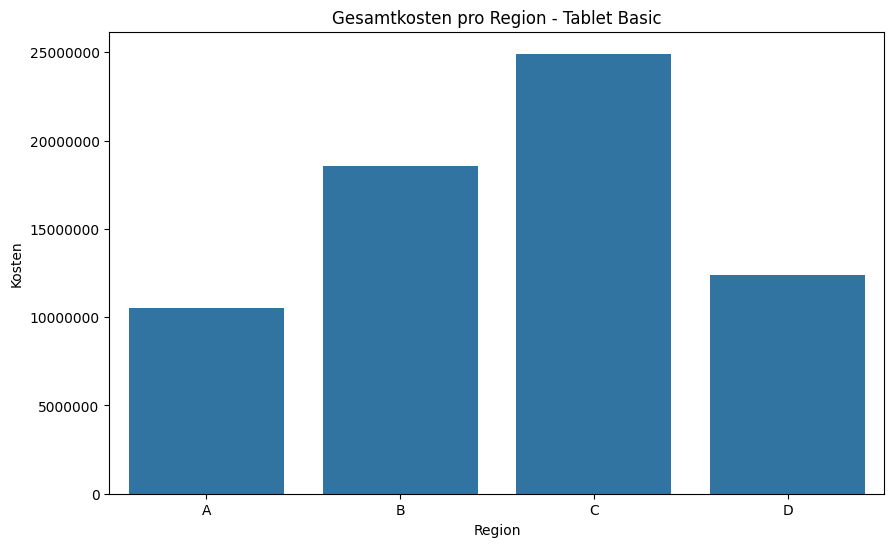

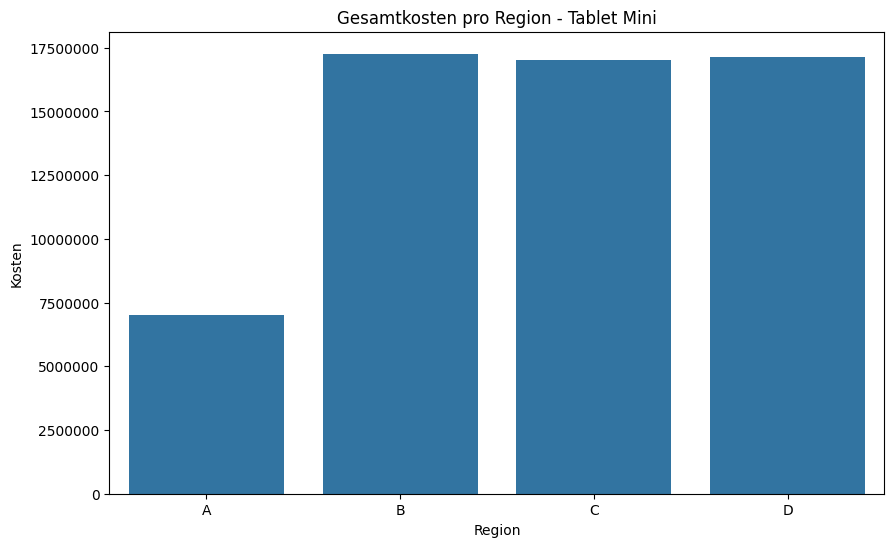

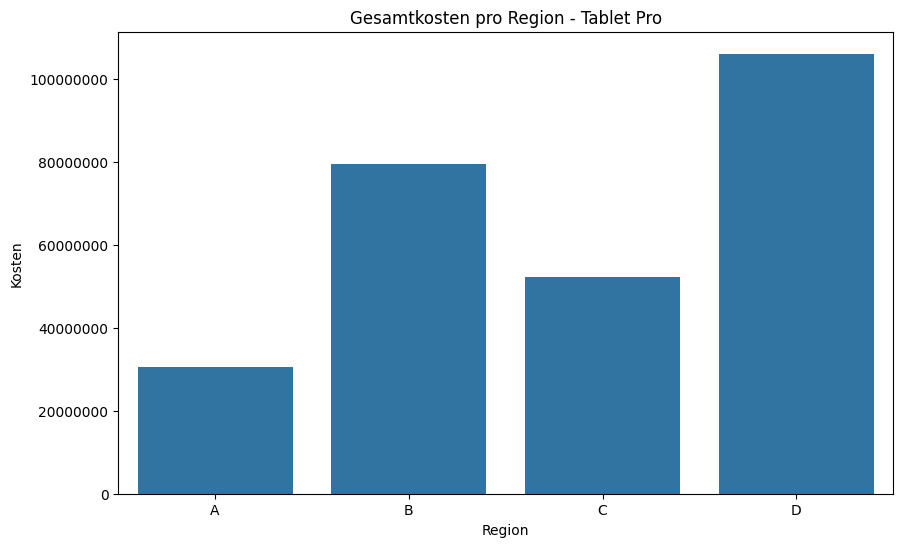

In [51]:
# Graphen plotten
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_basic_region, x='region', y='cost_total')
plt.title('Gesamtkosten pro Region - Tablet Basic')
plt.xlabel('Region')
plt.ylabel('Kosten')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_mini_region, x='region', y='cost_total')
plt.title('Gesamtkosten pro Region - Tablet Mini')
plt.xlabel('Region')
plt.ylabel('Kosten')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_pro_region, x='region', y='cost_total')
plt.title('Gesamtkosten pro Region - Tablet Pro')
plt.xlabel('Region')
plt.ylabel('Kosten')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Die Graphen bilden einen Gesamteindruck der Kosten für jedes Tablet in den Kanälen und Regionen. Über 6 Graphen hinweg Parallelen zu erkennen ist schwierig, deshalb muss versucht werden die Graphen zu konsolidieren:

In [52]:
# Kosten gruppiert nach Region, Produkt und Kanal
cost_per_region_product_channel = df_sales.groupby(['region', 'product', 'channel'])['cost_total'].sum()/1_000_000
cost_per_region_product_channel = cost_per_region_product_channel.reset_index()
cost_per_region_product_channel

,region,product,channel,cost_total
0,A,Tablet Basic,online,7.69
1,A,Tablet Basic,phone,1.18
2,A,Tablet Basic,store,1.63
3,A,Tablet Mini,online,2.29
4,A,Tablet Mini,phone,2.45
5,A,Tablet Mini,store,2.25
6,A,Tablet Pro,online,6.78
7,A,Tablet Pro,phone,7.33
8,A,Tablet Pro,store,16.48
9,B,Tablet Basic,online,10.17


In [53]:
# Gewinn gruppiert nach Region, Produkt und Kanal
profit_per_region_product_channel = df_sales.groupby(['region', 'product', 'channel'])['profit_total'].sum()/1_000_000
profit_per_region_product_channel = profit_per_region_product_channel.reset_index()
profit_per_region_product_channel = profit_per_region_product_channel.replace({'product': {'Tablet Basic': 'Basic', 'Tablet Mini': 'Mini', 'Tablet Pro': 'Pro'}})
profit_per_region_product_channel

,region,product,channel,profit_total
0,A,Basic,online,6.50
1,A,Basic,phone,0.84
2,A,Basic,store,0.43
3,A,Mini,online,5.11
4,A,Mini,phone,4.95
5,A,Mini,store,2.17
6,A,Pro,online,1.73
7,A,Pro,phone,1.83
8,A,Pro,store,2.25
9,B,Basic,online,7.80


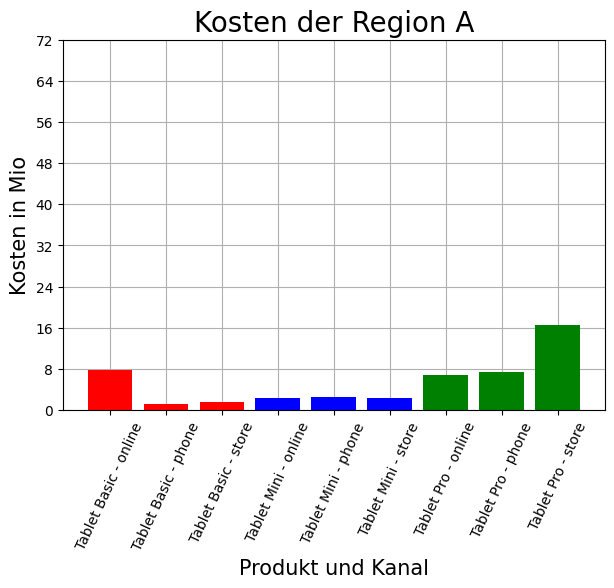

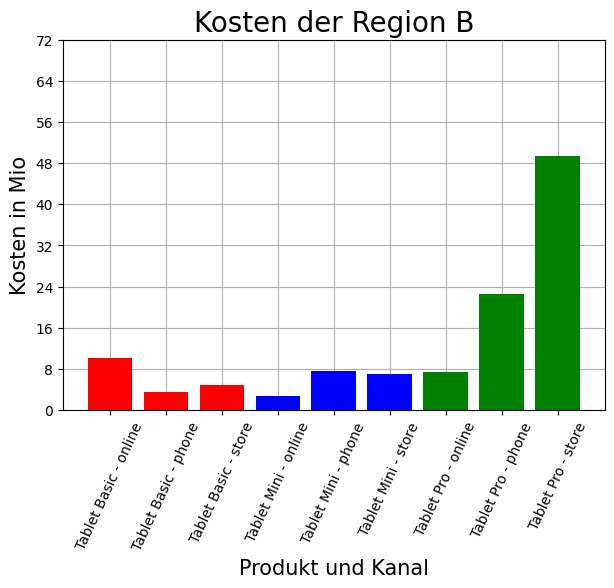

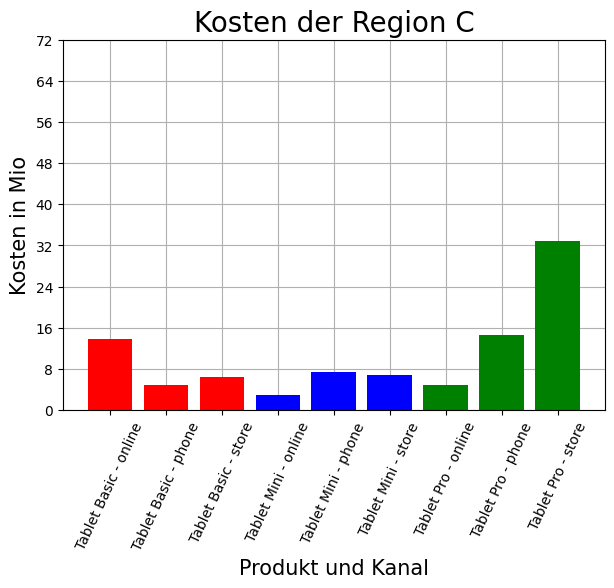

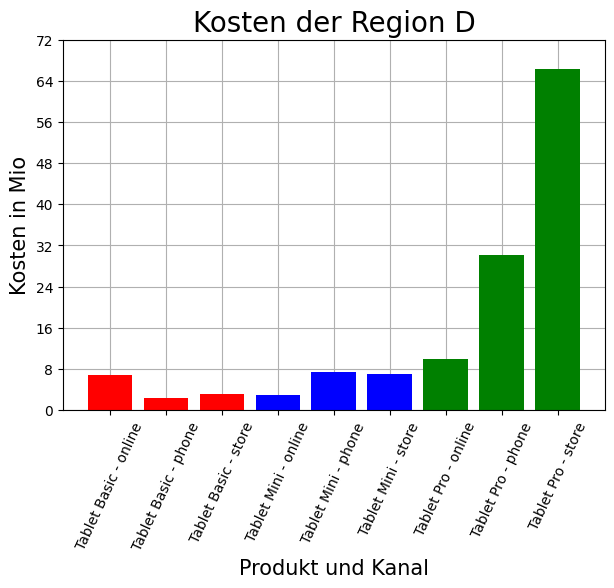

In [54]:
# Plotten der Kostengraphen für jede Region
region_cost = cost_per_region_product_channel['region'].unique()

for entry in region_cost:
    #Filtern der Daten für die aktuelle Region
    region_data = cost_per_region_product_channel[cost_per_region_product_channel['region'] == entry]

    fig, ax = plt.subplots()
    
    #x-Achsenbeschriftungen
    products = region_data['product']
    channels = region_data['channel']
    labels = [f'{product} - {channel}' for product, channel in zip(products, channels)]
    
    costs = region_data['cost_total']
    
    #Farben für Basic, Mini und Pro
    colors = ['r' if product == 'Tablet Basic' else 'b' if product == 'Tablet Mini' else 'g' for product in products]
    
    #Erstellen des Säulendiagramms
    plt.bar(labels, costs, color=colors)
    
    #Achsen- und Diagrammtitel
    plt.xlabel('Produkt und Kanal', size = 15)
    plt.ylabel('Kosten in Mio', size = 15)
    plt.title(f'Kosten der Region {entry}', size = 20)
    
    plt.tight_layout()
    
    #Gitterlinien aktivieren und in den Hintergrund
    plt.grid(True)
    ax.set_axisbelow(True)
     
    #Anpassung x-Achse Schrift und y-Achse Stufen
    import math
    max = 80
    ticks = max / 10
    plt.xticks(rotation = 65)
    plt.yticks(np.arange(0, max, ticks))
    plt.show()


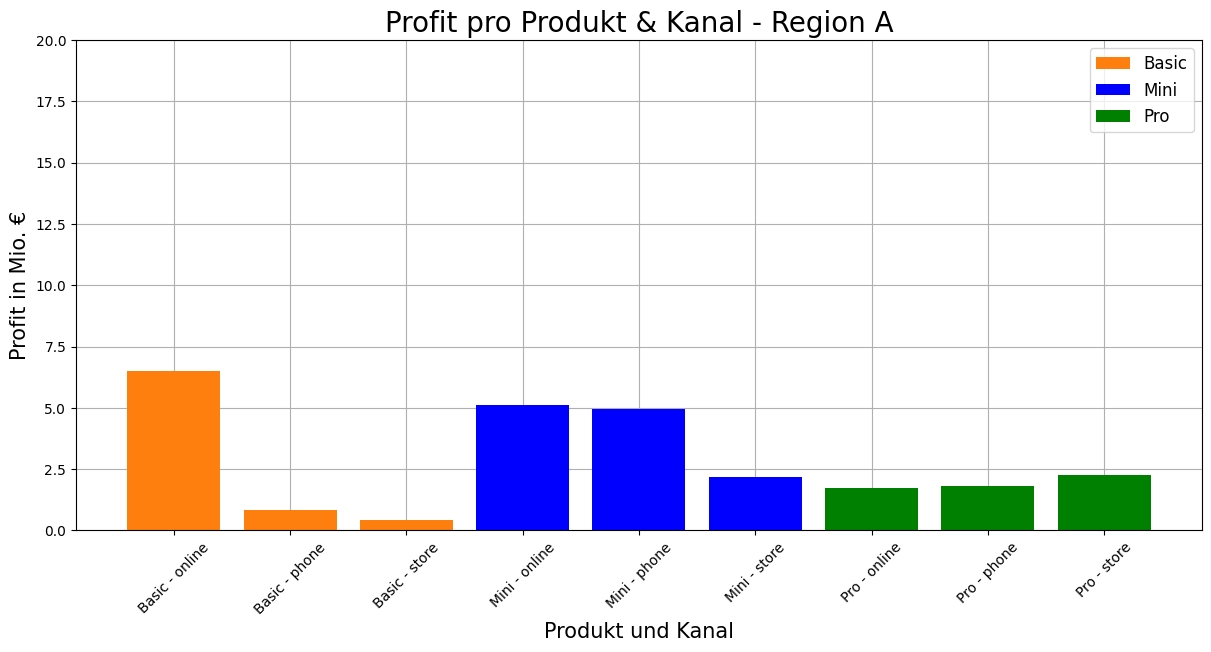

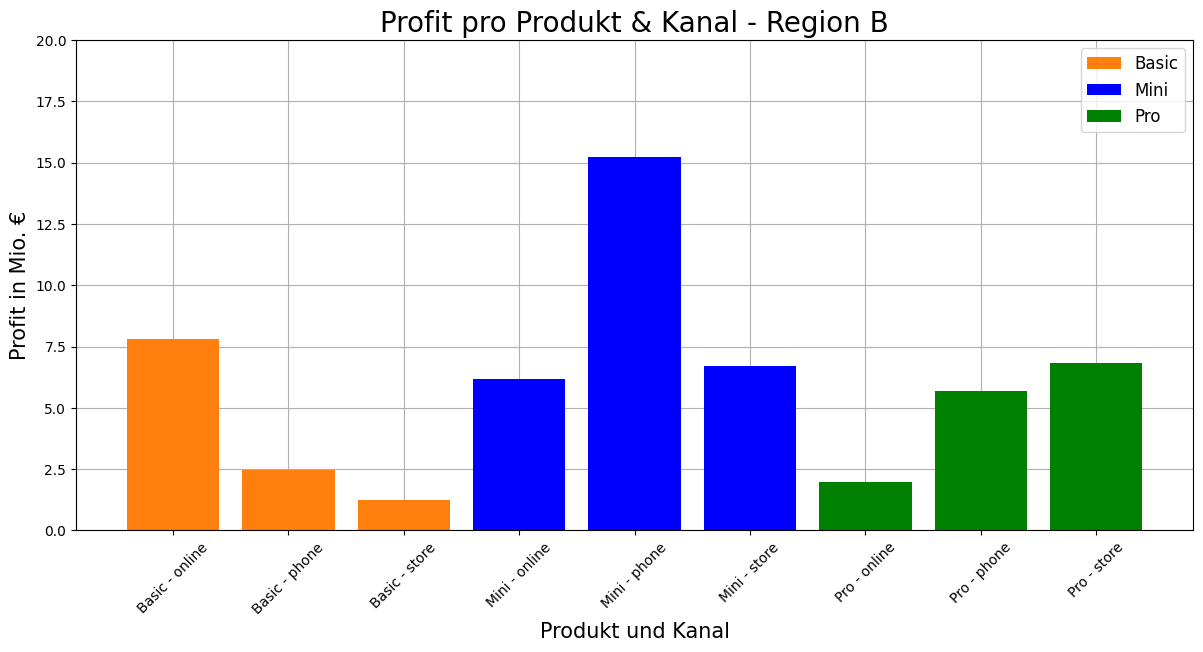

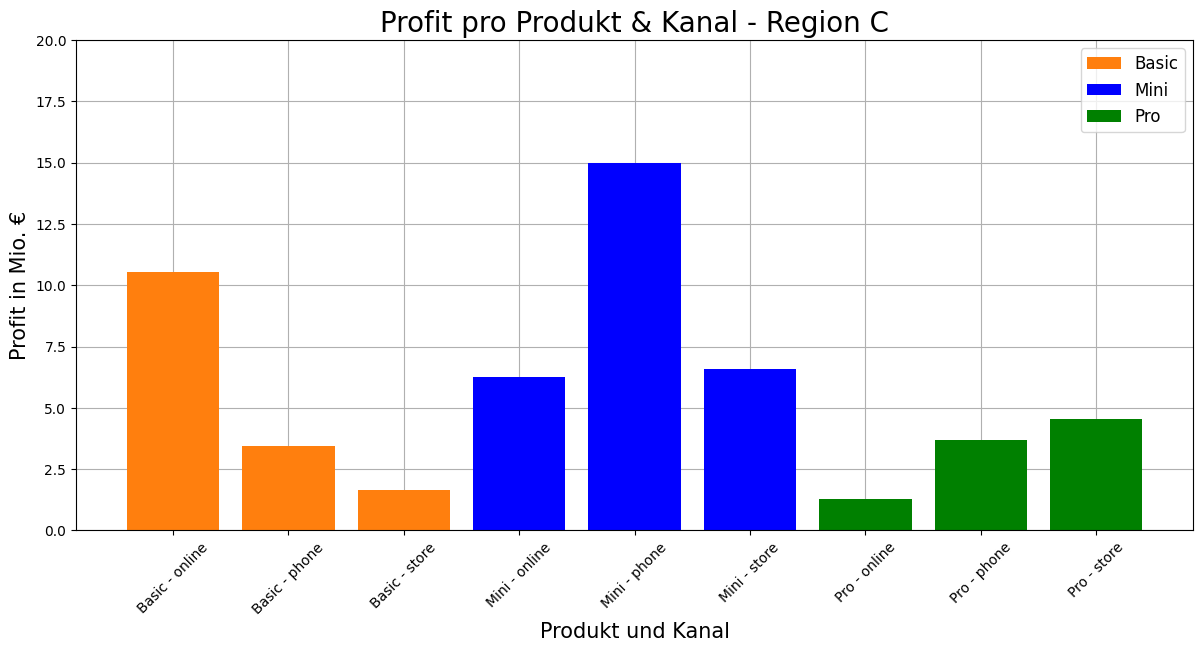

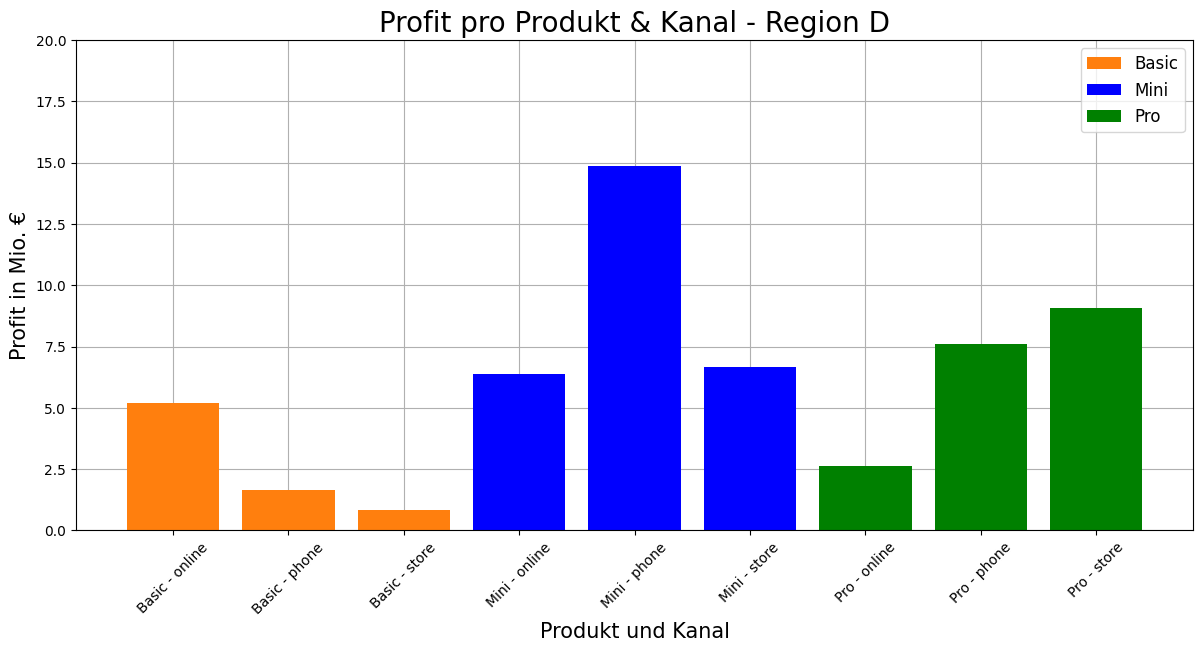

In [55]:
from matplotlib.patches import Patch

# Plotten der Profitgraphen für jede Region
region_profit = profit_per_region_product_channel['region'].unique()

for entry in region_profit:
    #Filtern der Daten für die aktuelle Region
    region_data = profit_per_region_product_channel[profit_per_region_product_channel['region'] == entry]
    
    #Diagramm erstellen
    fig, ax = plt.subplots(figsize=(12, 6))
    
    #x-Achsenbeschriftung
    products = region_data['product']
    channels = region_data['channel']
    labels = [f'{product} - {channel}' for product, channel in zip(products, channels)]

    profits = region_data['profit_total']
    
    #Farben für Basic, Mini und Pro
    colors = ['tab:orange' if product == 'Basic' else 'b' if product == 'Mini' else 'g' for product in products]

    plt.bar(labels, profits, color=colors)
    
    #Achsen- und Diagrammtitel
    plt.xlabel('Produkt und Kanal', size = 15)
    plt.ylabel('Profit in Mio. €', size = 15)
    plt.title(f'Profit pro Produkt & Kanal - Region {entry}', size = 20)
    
    plt.tight_layout()
    
    #Gitterlinien aktivieren und in Hintergrund setzen
    plt.grid(True)
    ax.set_axisbelow(True)

    #Legende
    legend_elements = [Patch(facecolor='tab:orange', label='Basic'),
                          Patch(facecolor='b', label='Mini'),
                          Patch(facecolor='g', label='Pro')]
    plt.legend(handles=legend_elements, loc='upper right', fontsize='large')

    #Anpassung x-Achsen Schrift und y-Achse Stufen
    import math
    #max = math.ceil(profits.max() / 10.0) * 10 + 5
    max = 22.5
    ticks = 2.5
    plt.xticks(rotation = 45)
    plt.yticks(np.arange(0, max, ticks))
    plt.show()


Vorallem an den Profitgraphen kann man erkennen, dass Region A underperformt. Da Region A grundsätzlich alle Tablets gleichermaßen verkauft, die Verkaufszahlen aber für Tablet Basic eher runter gehen werden, entwickelt sich Region A nach unten. 
Region A scheint Schwierigkeiten mit dem Verkauf über die Kanäle Phone und Store zu haben. Hier kann man über einen Wissenstransfer der Mitarbeiter nachdenken.

### Analyse der Verlustgeschäfte

In [56]:
# Transaktionen mit Verlust
df_sales_negative_profit = df_sales[df_sales['profit_total'] < 0]

In [57]:
# Welche Produkte wurden mit einem Verlust verkauft?
df_sales_negative_profit['product'].unique()

array(['Tablet Basic'], dtype=object)

In [58]:
# Anzahl Verlustgeschäfte pro Produkt
df_sales_negative_profit['product'].value_counts()

product
Tablet Basic    2314
Name: count, dtype: int64

In [59]:
# Summe des Verlusts
df_sales_negative_profit['profit_total'].sum()

-459619.7704372656

In [60]:
# In welchen Verkaufskanälen und Regionen wurden die Produkte mit negativem Gewinn verkauft und wie oft?
df_sales_negative_profit.groupby(['region', 'channel']).agg({'transaction_id': 'count', 'profit_total': 'sum'})

transaction_id  profit_total
region channel                              
A      online               42    -10,857.51
       phone                21     -3,889.07
       store               177    -32,965.08
B      online              130    -24,764.83
       phone                50     -8,280.72
       store               524   -107,624.33
C      online              162    -28,386.68
       phone                61     -9,026.07
       store               674   -143,836.81
D      online               93    -17,198.17
       phone                40     -9,229.26
       store               340    -63,561.26

### Analyse der Kundenbewertungen je Produkt

In [61]:
df_sales_customer_rating = df_sales.groupby(["product","year", "month"]).agg({'customer_rating': "mean", "amount" : "count"}).round(2)
df_sales_customer_rating = df_sales_customer_rating.reset_index()

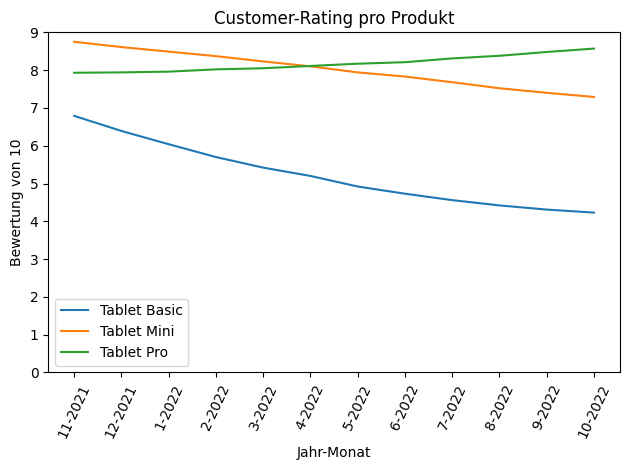

In [62]:
products = df_sales_customer_rating['product'].unique()

# For-Schleife über jeden Wert in "products"
for product in products:
    df_filtered_rating = df_sales_customer_rating[df_sales_customer_rating['product'] == product]
    plt.plot(df_filtered_rating['month'].astype(str) + "-" + df_filtered_rating['year'].astype(str), df_filtered_rating['customer_rating'], label=product)

# Verbessern Sie die Darstellung mit Titeln und Beschriftungen
plt.title('Customer-Rating pro Produkt')
plt.xlabel('Jahr-Monat')
plt.ylabel('Bewertung von 10')

# Maximum der y-achse
max = 10
ticks = max / 10
plt.xticks(rotation = 65)
plt.yticks(np.arange(0, max, ticks))

# Legende hinzufügen
plt.legend(loc='lower left')

# Zeigen Sie den Plot
plt.tight_layout()
plt.show()

**Analyse der Kundenbewertungen:**

Das Diagramm offenbart eine differenzierte Entwicklung der Kundenbewertungen für die Produktlinien Tablet Basic, Tablet Mini und Tablet Pro. Dabei ist eine abnehmende Tendenz bei den Bewertungen für das Tablet Basic und eine stabil bis positive Entwicklung für das Tablet Pro erkennbar. Die Bewertungen für das Tablet Mini bleiben im betrachteten Zeitraum relativ konstant, zeigen jedoch eine leichte Neigung nach unten.

**Schlüsselbeobachtungen:**
* Tablet Basic: Die Kundenbewertungen für das Tablet Basic zeigen einen deutlichen Abwärtstrend, was auf eine sinkende Kundenzufriedenheit oder auf aufkommende Probleme mit dem Produkt hinweisen könnte.
* Tablet Mini: Die Bewertungen für das Tablet Mini weisen eine leichte Verschlechterung auf. Dies könnte auf Marktsättigung oder steigenden Wettbewerb hindeuten, der die Wahrnehmung der Kunden beeinflusst.
* Tablet Pro: Die Kundenbewertungen für das Tablet Pro verbessern sich über den Zeitraum. Dies könnte das Ergebnis von Produktverbesserungen oder erfolgreichen Marketingmaßnahmen sein.

## 10. Analyse der Vetriebskanäle

### Umsatzanteile nach Verkaufskanälen

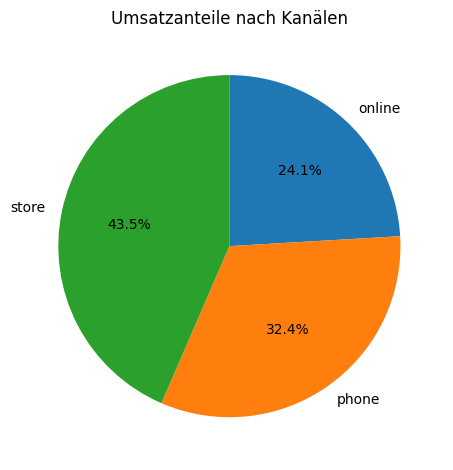

In [63]:
# Anteil am Umsatz nach Kanal als Kreisdiagramm
df_sales_per_channel = df_sales.groupby(['channel'])['revenue'].sum()

# Kreisdiagramm
plt.pie(df_sales_per_channel, labels=df_sales_per_channel.index, autopct='%1.1f%%', counterclock=False, startangle=90)
plt.title('Umsatzanteile nach Kanälen')

plt.tight_layout()
plt.show()

### Entwicklung der wirtschaftlichen Kennzahlen

In [64]:
# Umsatz, Kosten und Gewinn pro Woche für Verkaufskanal Online
df_sales_online = df_sales[df_sales['channel'] == 'online'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Woche für Verkaufskanal Phone
df_sales_phone = df_sales[df_sales['channel'] == 'phone'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Woche für Verkaufskanal Store
df_sales_store = df_sales[df_sales['channel'] == 'store'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

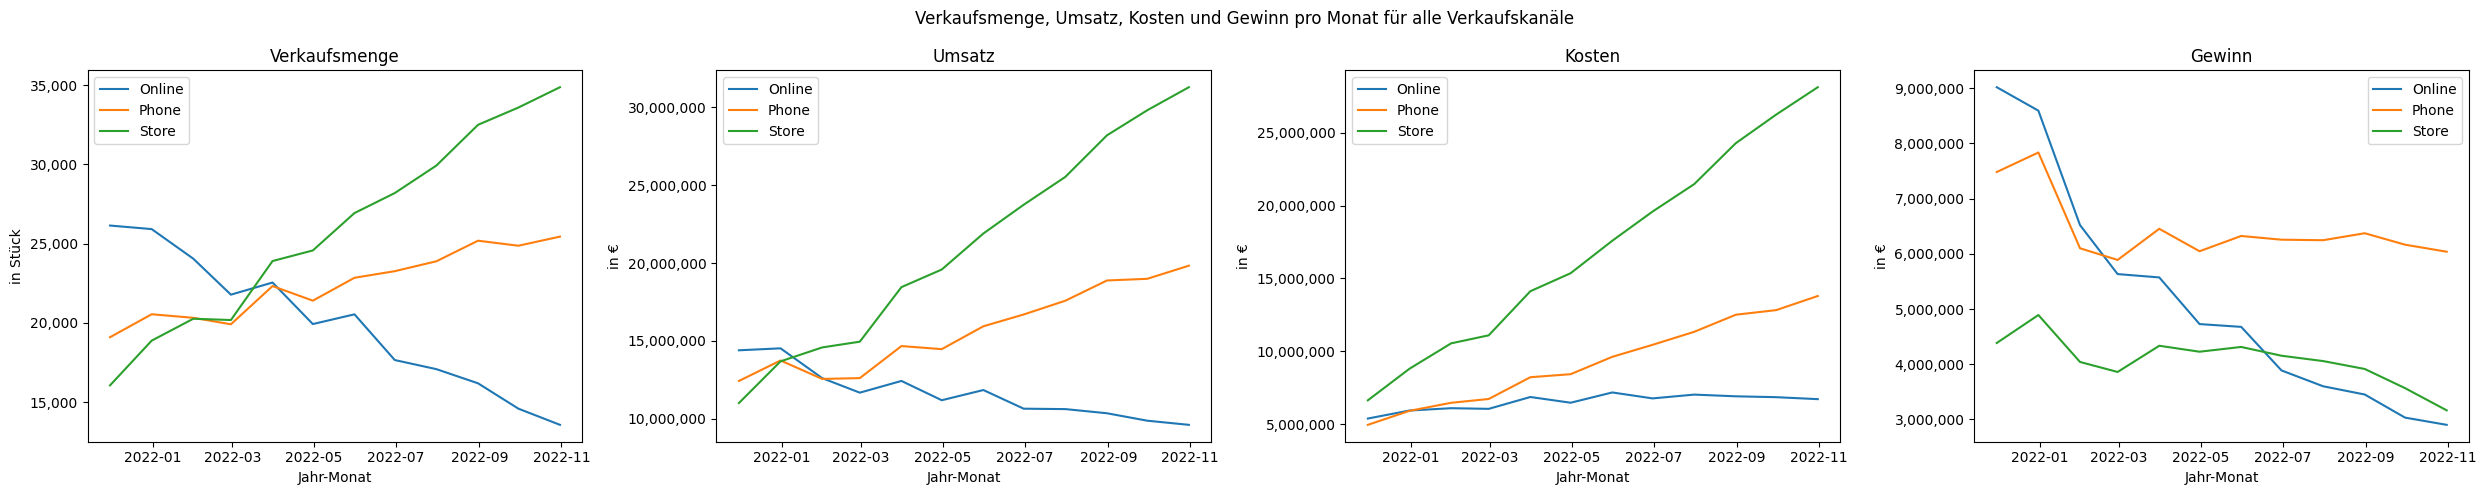

In [65]:
# Umsatz, Kosten und Gewinn pro Woche für alle Verkaufskanäle jeweils als Subplot visualisieren und alle Subplots zusammenfassen
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle('Verkaufsmenge, Umsatz, Kosten und Gewinn pro Monat für alle Verkaufskanäle')

axes[0].plot(df_sales_online['amount'], label='Online')
axes[0].plot(df_sales_phone['amount'], label='Phone')
axes[0].plot(df_sales_store['amount'], label='Store')
axes[0].set_title('Verkaufsmenge')
axes[0].set_xlabel('Jahr-Monat')
axes[0].set_ylabel('in Stück')
axes[0].legend()

axes[1].plot(df_sales_online['revenue'], label='Online')
axes[1].plot(df_sales_phone['revenue'], label='Phone')
axes[1].plot(df_sales_store['revenue'], label='Store')
axes[1].set_title('Umsatz')
axes[1].set_xlabel('Jahr-Monat')
axes[1].set_ylabel('in €')
axes[1].legend()

axes[2].plot(df_sales_online['cost_total'], label='Online')
axes[2].plot(df_sales_phone['cost_total'], label='Phone')
axes[2].plot(df_sales_store['cost_total'], label='Store')
axes[2].set_title('Kosten')
axes[2].set_xlabel('Jahr-Monat')
axes[2].set_ylabel('in €')
axes[2].legend()

axes[3].plot(df_sales_online['profit_total'], label='Online')
axes[3].plot(df_sales_phone['profit_total'], label='Phone')
axes[3].plot(df_sales_store['profit_total'], label='Store')
axes[3].set_title('Gewinn')
axes[3].set_xlabel('Jahr-Monat')
axes[3].set_ylabel('in €')
axes[3].legend()

# y-Achse in Millionen formatieren
for ax in axes:
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
plt.tight_layout()

### Entwicklung der Verkaufsmenge pro Kanal

In [66]:
df_sales_online = df_sales[df_sales['channel'] == 'online']
df_sales_phone = df_sales[df_sales['channel'] == 'phone']
df_sales_store = df_sales[df_sales['channel'] == 'store']

In [67]:
# Verkaufsmenge nach Monaten
df_sales_online_monthly = df_sales_online.groupby(df_sales_online['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_phone_monthly = df_sales_phone.groupby(df_sales_phone['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_store_monthly = df_sales_store.groupby(df_sales_store['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_online_monthly['date'] = df_sales_online_monthly['date'].dt.to_timestamp()
df_sales_phone_monthly['date'] = df_sales_phone_monthly['date'].dt.to_timestamp()
df_sales_store_monthly['date'] = df_sales_store_monthly['date'].dt.to_timestamp()

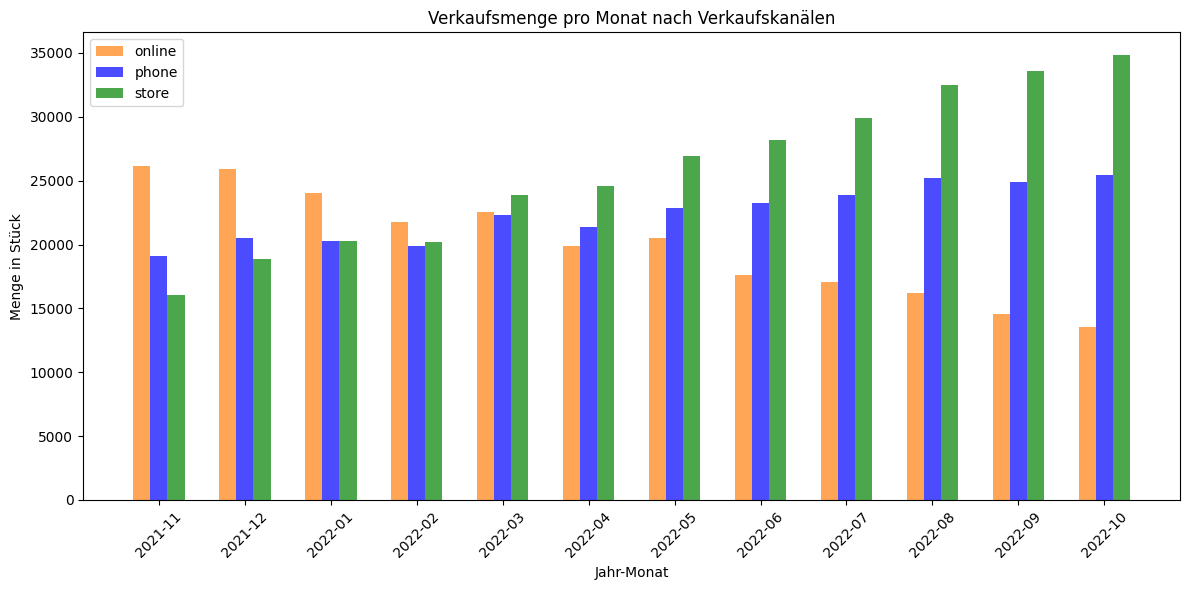

In [68]:
# Größe des Plots
plt.figure(figsize=(12, 6))

# Jahr und Monat aus der Spalte "Datum" extrahieren
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Erstellen einer Liste eindeutiger Jahr/Monat-Werte für die x-Achse
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Breite für jeden Balken definieren
bar_width = 0.2

# alkendiagramme für jeden Vertriebskanal
plt.bar(x - bar_width, df_sales_online_monthly['amount'], width=bar_width, label='online', color='tab:orange', alpha=0.7)
plt.bar(x, df_sales_phone_monthly['amount'], width=bar_width, label='phone', color='b', alpha=0.7)
plt.bar(x + bar_width, df_sales_store_monthly['amount'], width=bar_width, label='store', color='g', alpha=0.7)

# Titel und Beschriftungen
plt.title('Verkaufsmenge pro Monat nach Verkaufskanälen')
plt.xlabel('Jahr-Monat')
plt.ylabel('Menge in Stück')

# Beschriftungen der x-Achse als Datum festlegen
plt.xticks(x, x_labels, rotation=45)

# Legende hinzufügen
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**Analyse der Absatzmengen pro Vertriebskanäle:**

Die vorliegende Grafik zeigt die Entwicklung der Verkaufszahlen der Tablet GmbH, differenziert nach den Vertriebskanälen Online, Store und Phone, im Zeitraum von November 2021 bis Oktober 2022. Die Verkaufsmengen sind in Stück angegeben und ermöglichen eine Einsicht in die saisonalen Schwankungen und die Performance der einzelnen Kanäle.

Im Überblick zeigt sich, dass der Store-Vertriebskanal einen konsequenten Wachstum der Verkaufszahlen aufweist, was auf eine starke Präsenz und möglicherweise auf eine bevorzugte Wahl der Kundschaft für physisches Shopping hinweist. Der Online-Vertriebskanal zeigt eine sehr schwache Performance, welche entgegengesetzt zu den Absatzzahlen im Store verläuft. Interessanterweise zeigt der Phone-Vertriebskanal eine unterschiedliche Dynamik mit einem stagnierenden Absatz. Es lassen sich in keinem der Vertriebskanäle saisonalen Trends erkennen, was auf einen Mangel der Marketing Aktionen hinweisen könnte.

Die Analyse der Verkaufszahlen pro Monat nach Vertriebskanälen ist entscheidend für die strategische Planung der Tablet GmbH. Es empfiehlt sich, Marketingkampagnen und Angebote zeitlich an die festgestellten Trends anzupassen, um die Verkaufszahlen weiter zu steigern. Ebenso könnte eine vertiefte Analyse des Phone-Kanals nützlich sein, um die dortige Stagnation besser zu verstehen und Gegenmaßnahmen einzuleiten.

Zusammenfassend lässt sich feststellen, dass die Tablet GmbH von einer starken In-Store-Präsenz profitiert, während die Online- und Phone-Vertriebskanäle unterschiedliche Muster aufweisen, die spezifische Anpassungen in der Verkaufsstrategie erfordern könnten.

### Verkaufte Produkte pro Verkaufskanal

Ein möglicher Erklärungsansatz für die differenzierten Trends in den einzelnen Vertriebskanälen könnte in der unterschiedlichen Beeinflussung durch Produkttrends liegen. Es ist durchaus denkbar, dass bestimmte Produkte in gewissen Kanälen besser abschneiden, was wiederum die Verkaufszahlen beeinflusst. Um ein umfassendes Verständnis für diese Dynamiken zu entwickeln, ist es daher erforderlich, eine detaillierte Analyse der verkauften Produkte je Vertriebskanal durchzuführen. Hierbei sollte insbesondere untersucht werden, ob die Absatzmengen der einzelnen Produkte über alle Vertriebskanäle hinweg konstant bleiben oder ob es signifikante Unterschiede gibt. Diese Erkenntnisse könnten dann gezielt genutzt werden, um Vertriebsstrategien zu optimieren und die Produktpräsenz in den jeweiligen Kanälen zu stärken.

In [69]:
# Verkaufsmenge nach Produkt und Kanal
sales_per_product_by_channel = df_sales.groupby(['channel', 'product']).agg({'amount': 'sum'})
sales_per_product_by_channel = sales_per_product_by_channel.reset_index()
sales_per_product_by_channel

,channel,product,amount
0,online,Tablet Basic,141081
1,online,Tablet Mini,62273
2,online,Tablet Pro,36558
3,phone,Tablet Basic,41819
4,phone,Tablet Mini,133669
5,phone,Tablet Pro,93539
6,store,Tablet Basic,41340
7,store,Tablet Mini,80573
8,store,Tablet Pro,187896


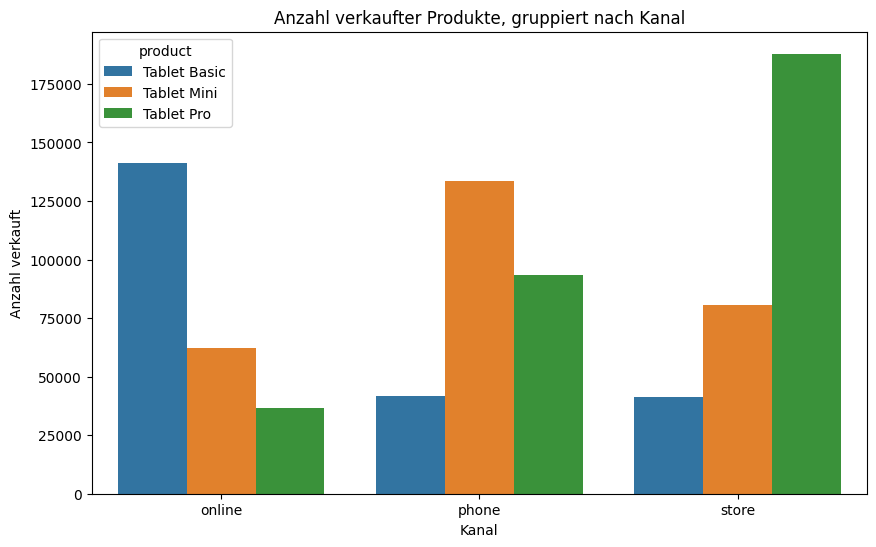

In [70]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sales_per_product_by_channel, x='channel', y='amount', hue='product')

plt.title('Anzahl verkaufter Produkte, gruppiert nach Kanal')
plt.xlabel('Kanal')
plt.ylabel('Anzahl verkauft')
plt.show()

#### Online

In [71]:
df_sales_online_basic = df_sales_online[df_sales_online['product'] == 'Tablet Basic']
df_sales_online_mini = df_sales_online[df_sales_online['product'] == 'Tablet Mini']
df_sales_online_pro = df_sales_online[df_sales_online['product'] == 'Tablet Pro']

# Aggregierung der Verkaufsmenge nach Monat
df_sales_online_basic_monthly = df_sales_online_basic.groupby(df_sales_online_basic['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_online_mini_monthly = df_sales_online_mini.groupby(df_sales_online_mini['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_online_pro_monthly = df_sales_online_pro.groupby(df_sales_online_pro['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_online_basic_monthly['date'] = df_sales_online_basic_monthly['date'].dt.to_timestamp()
df_sales_online_mini_monthly['date'] = df_sales_online_mini_monthly['date'].dt.to_timestamp()
df_sales_online_pro_monthly['date'] = df_sales_online_pro_monthly['date'].dt.to_timestamp()

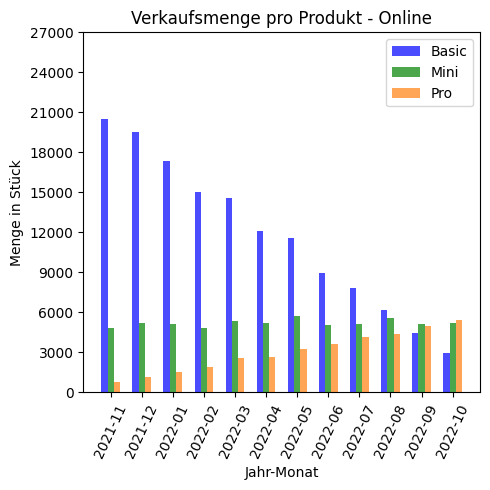

In [72]:
# Größe des Plots
plt.figure(figsize=(5, 5))

# Jahr und Monat aus der Spalte "Datum" extrahieren
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Erstellen einer Liste eindeutiger Jahr/Monat-Werte für die x-Achse
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Breite für jeden Balken
bar_width = 0.2

# Balkendiagramme für jeden Vertriebskanal
plt.bar(x - bar_width, df_sales_online_basic_monthly['amount'], width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, df_sales_online_mini_monthly['amount'], width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, df_sales_online_pro_monthly['amount'], width=bar_width, label='Pro', color='tab:orange', alpha=0.7)

# Titel und Beschriftungen festlegen
plt.title('Verkaufsmenge pro Produkt - Online')
plt.xlabel('Jahr-Monat')
plt.ylabel('Menge in Stück')

plt.xticks(x, x_labels, rotation=45)

# Legende hinzufügen
plt.legend(loc='upper right')

# Maximum der y-achse
max = 30000
ticks = max / 10
plt.xticks(rotation = 65)
plt.yticks(np.arange(0, max, ticks))

plt.tight_layout()
plt.show()

#### Phone

In [73]:
df_sales_phone_basic = df_sales_phone[df_sales_phone['product'] == 'Tablet Basic']
df_sales_phone_mini = df_sales_phone[df_sales_phone['product'] == 'Tablet Mini']
df_sales_phone_pro = df_sales_phone[df_sales_phone['product'] == 'Tablet Pro']

# Groupiere nach Monat und zähle Verkäufe
df_sales_phone_basic_monthly = df_sales_phone_basic.groupby(df_sales_phone_basic['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_phone_mini_monthly = df_sales_phone_mini.groupby(df_sales_phone_mini['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_phone_pro_monthly = df_sales_phone_pro.groupby(df_sales_phone_pro['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_phone_basic_monthly['date'] = df_sales_phone_basic_monthly['date'].dt.to_timestamp()
df_sales_phone_mini_monthly['date'] = df_sales_phone_mini_monthly['date'].dt.to_timestamp()
df_sales_phone_pro_monthly['date'] = df_sales_phone_pro_monthly['date'].dt.to_timestamp()

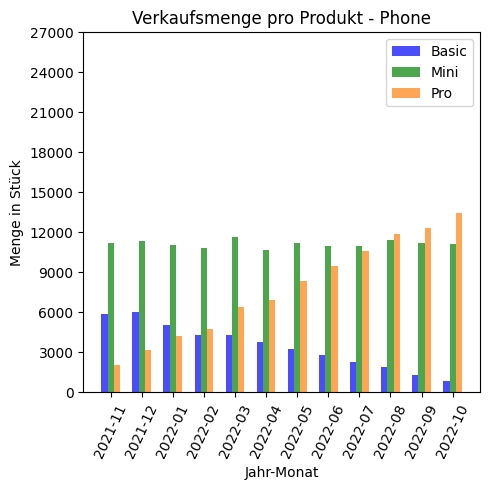

In [74]:
# Größe des Plots
plt.figure(figsize=(5, 5))

# Jahr und Monat aus der Spalte "Datum" extrahieren
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Erstellen einer Liste eindeutiger Jahr/Monat-Werte für die x-Achse
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Breite für jeden Balken
bar_width = 0.2

# Balkendiagramme für jeden Vertriebskanal
plt.bar(x - bar_width, df_sales_phone_basic_monthly['amount'], width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, df_sales_phone_mini_monthly['amount'], width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, df_sales_phone_pro_monthly['amount'], width=bar_width, label='Pro', color='tab:orange', alpha=0.7)

# Titel und Beschriftungen
plt.title('Verkaufsmenge pro Produkt - Phone')
plt.xlabel('Jahr-Monat')
plt.ylabel('Menge in Stück')

# Beschriftungen der x-Achse als Datum festlegen
plt.xticks(x, x_labels, rotation=45)

# maximum der y-achse
max = 30000
ticks = max / 10
plt.xticks(rotation = 65)
plt.yticks(np.arange(0, max, ticks))

# Legende hinzufügen
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### Store

In [75]:
df_sales_store_basic = df_sales_store[df_sales_store['product'] == 'Tablet Basic']
df_sales_store_mini = df_sales_store[df_sales_store['product'] == 'Tablet Mini']
df_sales_store_pro = df_sales_store[df_sales_store['product'] == 'Tablet Pro']

# Nach Monat gruppieren und Verkäufe zählen
df_sales_store_basic_monthly = df_sales_store_basic.groupby(df_sales_store_basic['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_store_mini_monthly = df_sales_store_mini.groupby(df_sales_store_mini['date'].dt.to_period('M'))['amount'].sum().reset_index()
df_sales_store_pro_monthly = df_sales_store_pro.groupby(df_sales_store_pro['date'].dt.to_period('M'))['amount'].sum().reset_index()

df_sales_store_basic_monthly['date'] = df_sales_store_basic_monthly['date'].dt.to_timestamp()
df_sales_store_mini_monthly['date'] = df_sales_store_mini_monthly['date'].dt.to_timestamp()
df_sales_store_pro_monthly['date'] = df_sales_store_pro_monthly['date'].dt.to_timestamp()

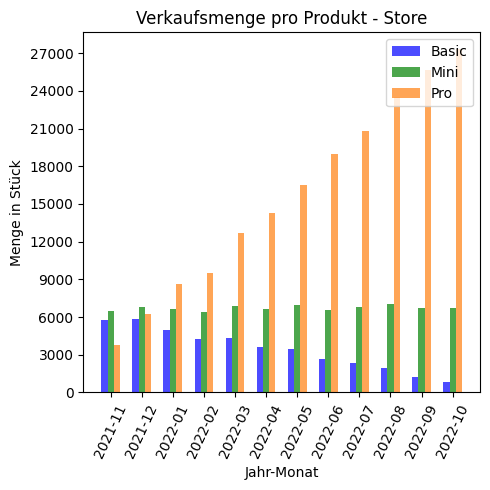

In [76]:
# Größe des Plots
plt.figure(figsize=(5, 5))

# Jahr und Monat aus der Spalte "Datum" extrahieren
df_sales_online_monthly['year_month'] = df_sales_online_monthly['date'].dt.strftime('%Y-%m')

# Erstellen einer Liste eindeutiger Jahr/Monat-Werte für die x-Achse
x_labels = df_sales_online_monthly['year_month'].unique()
x = np.arange(len(df_sales_online_monthly['date']))

# Breite für jeden Balken
bar_width = 0.2

# Balkendiagramme für jeden Vertriebskanal
plt.bar(x - bar_width, df_sales_store_basic_monthly['amount'], width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, df_sales_store_mini_monthly['amount'], width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, df_sales_store_pro_monthly['amount'], width=bar_width, label='Pro', color='tab:orange', alpha=0.7)

# Titel und Beschriftungen
plt.title('Verkaufsmenge pro Produkt - Store')
plt.xlabel('Jahr-Monat')
plt.ylabel('Menge in Stück')

# Beschriftungen der x-Achse als Datum festlegen
plt.xticks(x, x_labels, rotation=45)

# maximum der y-achse
max = 30000
ticks = max / 10
plt.xticks(rotation = 65)
plt.yticks(np.arange(0, max, ticks))

# Legende hinzufügen
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Die drei Diagramme zeigen die Verkaufsmengen pro Produkt – unterteilt in die Kategorien Basic, Mini und Pro – für die Vertriebskanäle Online, Phone und Store über einen Zeitraum von November 2021 bis Oktober 2022. Analysiert man die Diagramme kann man folgende Punkte feststellen und daraus die folgenden Handlungsempfehlungen entwickeln.

**Online-Vertriebskanal:**
* Die Basic-Variante zeigt starke Verkaufszahlen zu Beginn des betrachteten Zeitraums, die dann stark abnehmen.
* Die Mini-Variante bleibt relativ konstant auf niedrigerem Niveau.
* Die Pro-Variante zeigt eine geringe Menge an verkauften Einheiten mit einer steigenden Tendenz.

**Handlungsempfehlungen für Online:**
* Überprüfen Sie Marketing und Positionierung der Basic-Variante, um die anfängliche Popularität zurückzugewinnen.
* Analysieren Sie die Zielgruppe für die Mini-Variante, um potenzielle Marketingstrategien zur Steigerung der Verkäufe zu identifizieren.
* Untersuchen Sie mögliche Gründe für die geringen Verkaufszahlen der Pro-Variante, wie z.B. Preisgestaltung oder Wettbewerb

**Phone-Vertriebskanal:**
* Die Mini-Variante ist stark und bleibt relativ konstant.
* Pro verkaufen sich anfangs schlecht aber hat einen starken Wachstumstrend und überholt am Ende das Mini.
* Das Basic und liegt am Anfang im Mittelfeld und hat zum Schluss keine Relevanz mehr in diesem Vertriebskanal.

**Handlungsempfehlungen für Phone:**
* Nutzen Sie die steigende Popularität der Mini-Variante, um gezielte Verkaufsförderungen und Kundensupport anzubieten.

**Store-Vertriebskanal:**
* Die Pro-Variante zeigt eine beeindruckende Zunahme der Verkaufszahlen, insbesondere ab Mitte des Jahres.
* Das Mini zeigt eine moderate Performance ohne deutliche Trends.
* Das Basic ähnlich an wie das Mini aber verliert auch in diesem Vertriebskanal jegliche Relevanz zum Ende der Periode

**Handlungsempfehlungen für Store:**
* Fokussieren Sie sich auf die Förderung der Pro-Variante, um den steigenden Trend zu nutzen, vielleicht durch In-Store-Aktionen oder zusätzliche Anreize für Kunden.
* Erwägen Sie, die Präsentation und Verfügbarkeit der Mini-Varianten im Store zu verbessern, um deren Absatz zu erhöhen.

**Allgemeine Beobachtungen und Handlungsempfehlungen:**
* Es ist offensichtlich, dass unterschiedliche Produkte in verschiedenen Vertriebskanälen erfolgreich sind. Dies könnte auf unterschiedliche Kundenpräferenzen hinweisen, die sich aus den verschiedenen Einkaufserfahrungen ergeben.
* Eine kundenspezifische Analyse könnte Aufschluss darüber geben, warum bestimmte Produkte in bestimmten Kanälen besser abschneiden. Darauf aufbauend könnten gezielte Marketingkampagnen entwickelt werden.
* Cross-Channel-Strategien sollten in Betracht gezogen werden, um die Stärken jedes Kanals zu nutzen und die Schwächen auszugleichen. Beispielsweise könnte die Popularität der Pro-Variante im Store dazu genutzt werden, Online- und Phone-Verkäufe durch Bundle-Angebote oder exklusive Online-Deals zu steigern.

Die Daten legen nahe, dass eine gezielte Strategie, die die Stärken jedes Produkts und jedes Vertriebskanals berücksichtigt, die Gesamtverkaufszahlen steigern könnte.

### Aufteilung der Verkaufskänäle in Regionen

Um ein ganzheitliches Bild der Vertriebsleistung zu gewährleisten, ist es wichtig, regionale Faktoren in die Analyse zu integrieren. Es besteht die Möglichkeit, dass die bisher beobachteten Verkaufstrends in den verschiedenen Vertriebskanälen durch regionale Vorlieben oder Marktbedingungen beeinflusst werden. Regionale Unterschiede könnten sich etwa in unterschiedlichen Marketingeffizienzen oder in der variierenden Marktpräsenz der Tablet GmbH niederschlagen. Daher werden im Folgenden die regionalen Verkaufszahlen genau untersucht, um festzustellen, ob und inwieweit regionale Disparitäten zu den Verkaufstrends der einzelnen Vertriebskanäle beitragen.

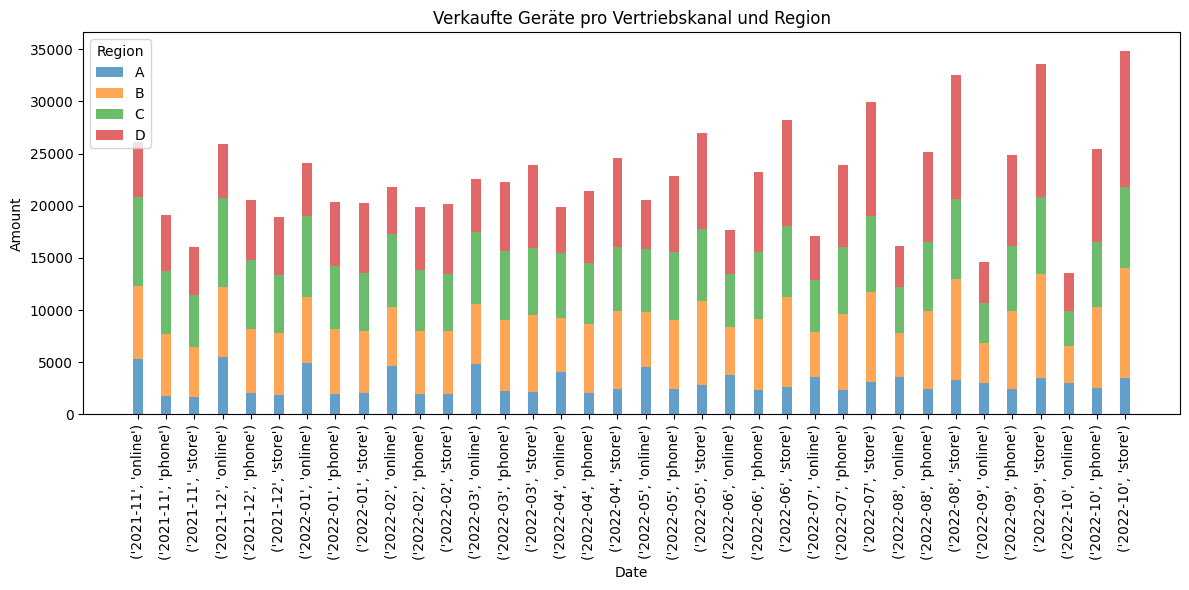

In [77]:
# Monat und das Jahr aus der 'date'-Spalte
df_sales['month_year'] = df_sales['date'].dt.strftime('%Y-%m')

# Gruppieren der Daten nach 'month_year' und 'region' und summieren die Werte
grouped_data = df_sales.groupby(['month_year', 'channel', 'region'])['amount'].sum().unstack(fill_value=0)

# Größe des Plots
plt.figure(figsize=(12, 6))

# Erstellen der Werte der x-Achse für jedes Datum
x_labels = grouped_data.index
x = np.arange(len(x_labels))

# Breite für jeden Balken
bar_width = 0.35

# Balkendiagramme für jede Region
bottom = np.zeros(len(x_labels))
regions = grouped_data.columns

for region in regions:
    plt.bar(x, grouped_data[region], width=bar_width, label=region, alpha=0.7, bottom=bottom)
    bottom += grouped_data[region]

# Titel und Beschriftungen
plt.title('Verkaufte Geräte pro Vertriebskanal und Region')
plt.xlabel('Date')
plt.ylabel('Amount')

# x-Achsen-Ticks und Beschriftungen festlegen
plt.xticks(x, x_labels, rotation=90)

# Legende hinzufügen
plt.legend(loc='upper left', title='Region')

plt.tight_layout()
plt.show()

**Analyse der Verkaufte Geräte pro Vertriebskanal und Region**

Die Untersuchung der Verkaufszahlen der Tablet GmbH über vier Regionen hinweg bietet interessante Einblicke in das regionale Kaufverhalten. Es zeigt sich, dass die Absatzzahlen der Geräte zwischen den Regionen über die verschiedenen Vertriebskanäle hinweg (Online, Store, Phone) bemerkenswert konsistent sind. Diese Beobachtung legt nahe, dass regionale Präferenzen oder Marktunterschiede keine signifikante Rolle in der Vertriebsstrategie der Tablet GmbH spielen, zumindest nicht in dem betrachteten Zeitraum von November 2021 bis Oktober 2022.

**Schlüsselergebnisse:**
* Gleichmäßige Verteilung: Die Verkaufszahlen sind über alle Regionen gleichmäßig verteilt, was auf eine starke, gleichbleibende Nachfrage in den verschiedenen Märkten hindeutet.
* Unabhängigkeit von Regionen: Die Verkaufsmuster scheinen nicht stark von regionalen Besonderheiten beeinflusst zu sein, was darauf schließen lässt, dass das Unternehmen eine universell ansprechende Produktstrategie verfolgt.

**Handlungsempfehlungen:**
* Regionenübergreifende Strategien: Da keine signifikanten regionalen Unterschiede festzustellen sind, sollte die Tablet GmbH ihre regionenübergreifenden Vertriebs- und Marketingstrategien weiterhin stärken und Synergien nutzen.
* Marktforschung vertiefen: Es könnte von Vorteil sein, tiefergehende Marktforschung zu betreiben, um subtilere regionale Unterschiede zu identifizieren, die möglicherweise außerhalb der Verkaufszahlen liegen, wie z.B. Kundenpräferenzen oder Wettbewerbsintensität.

Zusammenfassung:
Die Analyse zeigt, dass die Verkaufsstrategie der Tablet GmbH in Bezug auf die regionale Verteilung der Verkaufszahlen durch ein hohes Maß an Gleichmäßigkeit und Balance gekennzeichnet ist. Dies deutet auf eine erfolgreiche Umsetzung der Vertriebskanalstrategie hin, die unabhängig von regionalen Unterschieden wirksam ist. Die Tablet GmbH könnte diesen Vorteil nutzen, um ihre Marktpräsenz weiter auszubauen und dabei regionale Nuancen zu berücksichtigen, die durch detailliertere Marktforschung identifiziert werden könnten.

In [78]:
# Durchschnittliche Kosten im Store pro Produkt
df_cost_store_basic = df_sales_store_basic['cost'].mean()
df_cost_store_mini = df_sales_store_mini['cost'].mean()
df_cost_store_pro = df_sales_store_pro['cost'].mean()

# Durchschnittliche Kosten im Phone pro Produkt
df_cost_phone_basic = df_sales_phone_basic['cost'].mean()
df_cost_phone_mini = df_sales_phone_mini['cost'].mean()
df_cost_phone_pro = df_sales_phone_pro['cost'].mean()

# Durchschnittliche Kosten im Online pro Produkt
df_cost_online_basic = df_sales_online_basic['cost'].mean()
df_cost_online_mini = df_sales_online_mini['cost'].mean()
df_cost_online_pro = df_sales_online_pro['cost'].mean()

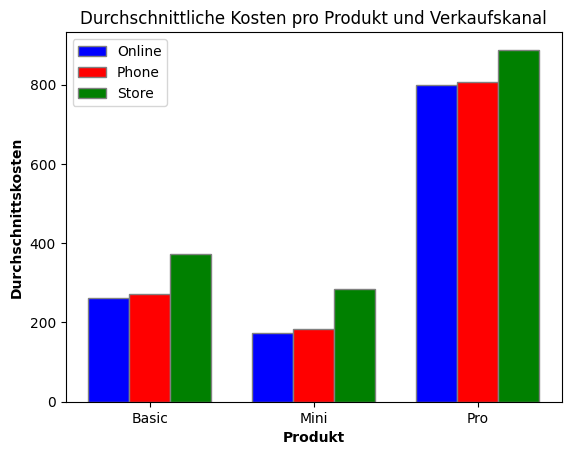

In [79]:
# Neue Organisation der Daten für das Balkendiagramm
categories = ['Basic', 'Mini', 'Pro']
sales_channels = ['Online', 'Phone', 'Store']

costs = {
    'Online': [df_cost_online_basic, df_cost_online_mini, df_cost_online_pro],
    'Phone': [df_cost_phone_basic, df_cost_phone_mini, df_cost_phone_pro],
    'Store': [df_cost_store_basic, df_cost_store_mini, df_cost_store_pro]
}

# Erstellen des Balkendiagramms
fig, ax = plt.subplots()

# Position der Balken auf der x-Achse
barWidth = 0.25
r1 = np.arange(len(categories))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Erstellen der Balken
ax.bar(r1, costs['Online'], color='blue', width=barWidth, edgecolor='grey', label='Online')
ax.bar(r2, costs['Phone'], color='red', width=barWidth, edgecolor='grey', label='Phone')
ax.bar(r3, costs['Store'], color='green', width=barWidth, edgecolor='grey', label='Store')

# Hinzufügen von Bezeichnungen
ax.set_xlabel('Produkt', fontweight='bold')
ax.set_ylabel('Durchschnittskosten', fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(categories))])
ax.set_xticklabels(categories)
ax.set_title('Durchschnittliche Kosten pro Produkt und Verkaufskanal')
ax.legend()

plt.show()


**Analyse der Kostenstruktur nach Vertriebskanal:**

Die bereitgestellte Grafik zeigt die durchschnittlichen Kosten pro verkauftem Produkt über die Vertriebskanäle Online, Phone und Store. Es ist klar ersichtlich, dass der Store-Vertriebskanal für alle Produktkategorien (Basic, Mini und Pro) die höchsten Kosten aufweist.

* Höhere Kosten im Store: Die Verkaufskosten im Store sind bei allen drei Produkten am höchsten. Dies könnte auf verschiedene Faktoren zurückzuführen sein, wie höhere Betriebskosten, Personal, Miete und andere overhead-bezogene Ausgaben, die mit dem Betrieb physischer Geschäfte verbunden sind.
* Kosten im Online und Phone Vertrieb: Die Kosten im Online- und Phone-Vertriebskanal sind niedriger und relativ ähnlich über die Produktkategorien hinweg. Dies deutet darauf hin, dass die digitalen Vertriebskanäle effizienter sind, möglicherweise aufgrund niedrigerer Personal- und Raumkosten und der Skalierbarkeit der Vertriebsprozesse.

**Handlungsempfehlungen:**

* Effizienzsteigerung im Store: Es sollte überprüft werden, ob und wie die Effizienz in den Stores verbessert werden kann, beispielsweise durch Optimierung des Lagermanagements, der Personalplanung oder durch den Einsatz von Technologien zur Kostenreduktion.
* Kosten-Nutzen-Analyse: Eine detaillierte Kosten-Nutzen-Analyse könnte hilfreich sein, um zu bewerten, ob die höheren Kosten im Store durch entsprechende Umsätze und Kundenerfahrungen gerechtfertigt sind.
* Cross-Channel-Strategien: Die Tablet GmbH könnte Cross-Channel-Strategien entwickeln, um die Stärken jedes Kanals zu nutzen und Kosten zu sparen, etwa durch Online-Reservierung mit Abholung im Store.

Die Analyse der durchschnittlichen Kosten pro Produkt und Vertriebskanal zeigt, dass die Verkaufskosten im Store-Vertriebskanal durchweg höher sind als bei den anderen Kanälen. Dieser Befund sollte von der Tablet GmbH genutzt werden, um die Kostenstrukturen weiter zu analysieren und gegebenenfalls anzupassen. Eine strategische Überprüfung der Vertriebskanäle könnte zu einer optimierten Kostenstruktur und einer verbesserten Gesamteffizienz führen.

### Analyse der Rabatte

Im Folgenden soll die Rabattpolitik des Unternehmens analysiert werden. Ziel ist es zu verstehen, inwieweit die gewährten Rabatte den Umsatz beeinflussen und welche Faktoren die Vergabe von Rabatten an Kunden bestimmen. Es soll analysiert werden, ob und wie Rabatte strategisch eingesetzt wurden, um den Verkauf zu fördern, und ob diese Praxis zu einer ungewollten Reduzierung des Gesamtumsatzes geführt hat. Es wird untersucht, wie sich die Rabattvergabe im Laufe des Beobachtungszeitraums entwickelt hat, um etwaige Muster zu erkennen und zu beurteilen, ob die Rabattstrategie im Einklang mit den Unternehmenszielen steht.

#### Durchschnittliche Rabatte pro Vertriebskanal

In [80]:
# Groupiere nach Monat und zähle Verkäufe
df_discounts_monthly = df_sales.groupby(df_sales['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_online_monthly = df_sales_online.groupby(df_sales_online['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_phone_monthly = df_sales_phone.groupby(df_sales_phone['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_store_monthly = df_sales_store.groupby(df_sales_store['date'].dt.to_period('M'))['discount'].mean().reset_index()

df_discounts_monthly['date'] = df_discounts_monthly['date'].dt.to_timestamp()
df_discounts_online_monthly['date'] = df_discounts_online_monthly['date'].dt.to_timestamp()
df_discounts_phone_monthly['date'] = df_discounts_phone_monthly['date'].dt.to_timestamp()
df_discounts_store_monthly['date'] = df_discounts_store_monthly['date'].dt.to_timestamp()

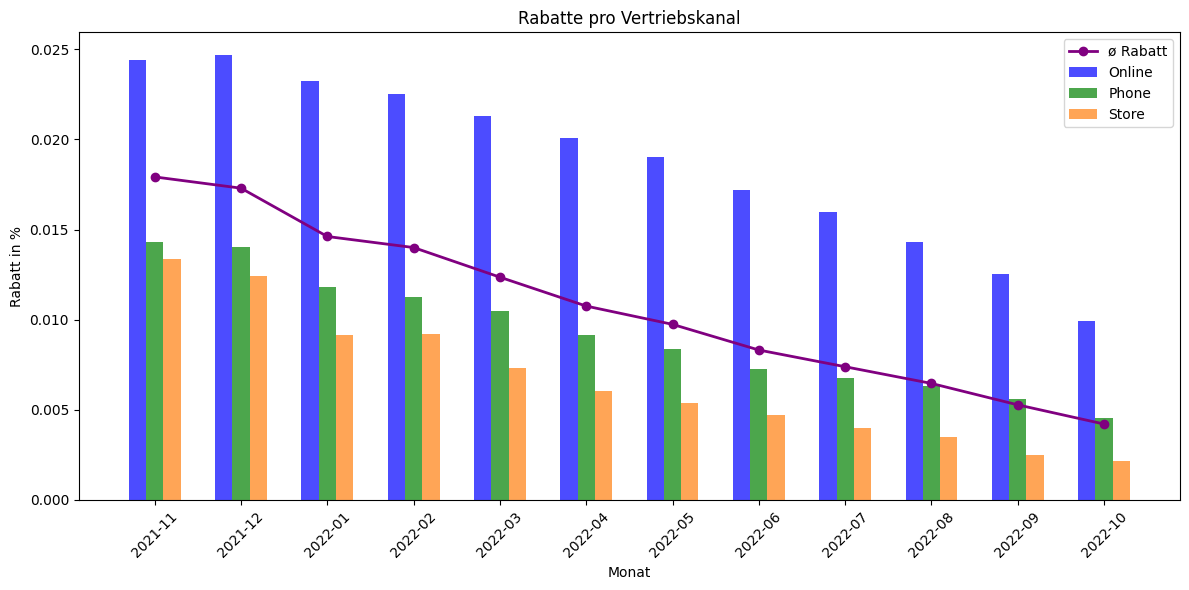

In [81]:
# Größe des Plots
plt.figure(figsize=(12, 6))

# Jahr und Monat aus der Spalte "Datum" extrahieren
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Erstellen einer Liste eindeutiger Jahr/Monat-Werte für die x-Achse
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Breite für jeden Balken
bar_width = 0.2

# Balkendiagramme für jeden Vertriebskanal
plt.bar(x - bar_width, (df_discounts_online_monthly['discount']), width=bar_width, label='Online', color='b', alpha=0.7)
plt.bar(x, (df_discounts_phone_monthly['discount']), width=bar_width, label='Phone', color='g', alpha=0.7)
plt.bar(x + bar_width, (df_discounts_store_monthly['discount']), width=bar_width, label='Store', color='tab:orange', alpha=0.7)

# Durchschnittlichen Rabatt pro Monat plotten
plt.plot(x, (df_discounts_monthly['discount']), label='ø Rabatt', color='purple', linewidth=2, marker='o')

# Titel und Beschriftungen
plt.title('Rabatte pro Vertriebskanal')
plt.xlabel('Monat')
plt.ylabel('Rabatt in %')

# Beschriftungen der x-Achse als Datum festlegen
plt.xticks(x, x_labels, rotation=45)

# Legende hinzufügen
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Analyseergebnis der Rabatte pro Vertriebskanal**

Das Diagramm illustriert die Verteilung der gewährten Rabatte im Zeitraum von November 2021 bis Oktober 2022, aufgeschlüsselt nach den Vertriebskanälen Online, Phone und Store. Ein kritischer Blick auf die Rabattentwicklung liefert aufschlussreiche Erkenntnisse über die Verteilung der Preisnachlässe.

**Schlüsselbeobachtungen:**
* Online-Rabatte: Der Online-Vertriebskanal zeichnet sich durch die höchsten Rabatte aus, die im Laufe der Zeit abnehmen. Dies könnte auf eine Anfangsstrategie hinweisen, die darauf abzielte, den Online-Marktanteil durch aggressive Rabattpolitik zu erhöhen.
* Annäherung der Rabattsätze: Während der Rabatt im Online-Segment abnimmt, zeigt der Trend eine Konvergenz der Rabattlevels über alle Kanäle hinweg. Diese Entwicklung könnte das Ergebnis einer strategischen Neuausrichtung sein, die auf eine harmonisierte Preispolitik über alle Vertriebskanäle hinweg abzielt.
* Reduzierung der Rabatte: Es ist eine allgemeine Tendenz zur Reduktion der Rabatte in allen Vertriebskanälen feststellbar. Dieser Trend könnte auf eine stärkere Fokussierung auf Produktwert und Markenstärke statt auf Preisnachlässe hindeuten.

#### Durchschnittliche Rabatte pro Region

In [82]:
df_sales_A = df_sales[df_sales['region'] == 'A']
df_sales_B = df_sales[df_sales['region'] == 'B']
df_sales_C = df_sales[df_sales['region'] == 'C']
df_sales_D = df_sales[df_sales['region'] == 'D']

In [83]:
# Groupiere nach Monat und zähle Verkäufe
df_discounts_A_monthly = df_sales_A.groupby(df_sales_A['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_B_monthly = df_sales_B.groupby(df_sales_B['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_C_monthly = df_sales_C.groupby(df_sales_C['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_D_monthly = df_sales_D.groupby(df_sales_D['date'].dt.to_period('M'))['discount'].mean().reset_index()

df_discounts_A_monthly['date'] = df_discounts_A_monthly['date'].dt.to_timestamp()
df_discounts_B_monthly['date'] = df_discounts_B_monthly['date'].dt.to_timestamp()
df_discounts_C_monthly['date'] = df_discounts_C_monthly['date'].dt.to_timestamp()
df_discounts_D_monthly['date'] = df_discounts_D_monthly['date'].dt.to_timestamp()

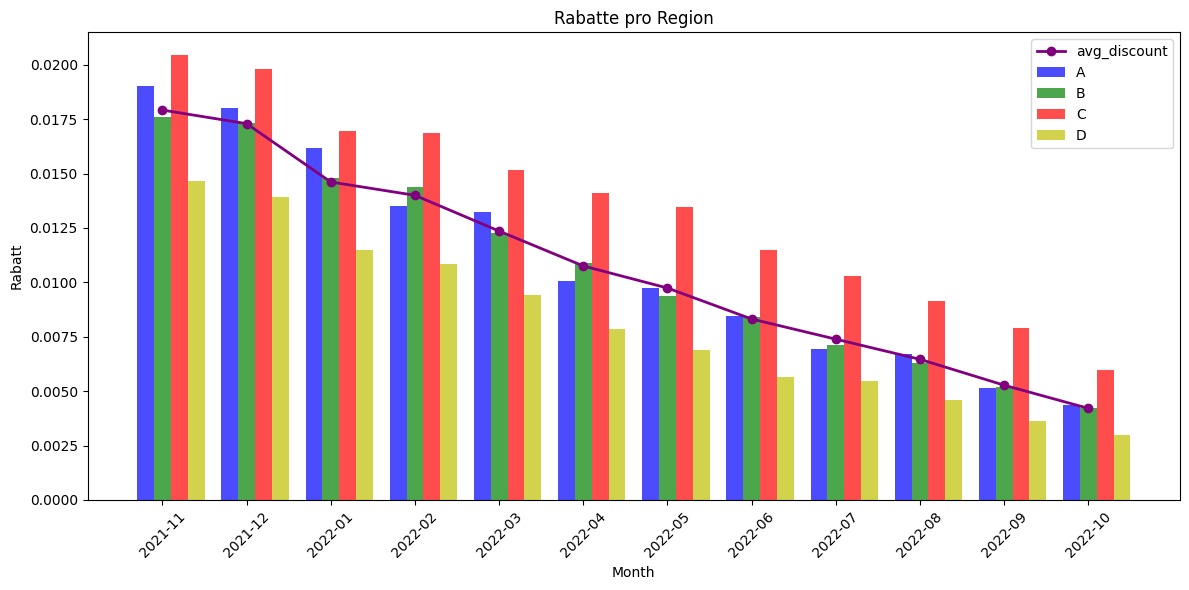

In [84]:
# Größe des Plots
plt.figure(figsize=(12, 6))

# Jahr und Monat aus der Spalte "Datum" extrahieren
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Liste eindeutiger Jahr/Monat-Werte für die x-Achse
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Breite für jeden Balken
bar_width = 0.2

# alkendiagramme für jeden Vertriebskanal
plt.bar(x - bar_width, (df_discounts_A_monthly['discount']), width=bar_width, label='A', color='b', alpha=0.7)
plt.bar(x, (df_discounts_B_monthly['discount']), width=bar_width, label='B', color='g', alpha=0.7)
plt.bar(x + bar_width, (df_discounts_C_monthly['discount']), width=bar_width, label='C', color='r', alpha=0.7)
plt.bar(x + (2 * bar_width), (df_discounts_D_monthly['discount']), width=bar_width, label='D', color='y', alpha=0.7)

# Liniendiagramm mit den Daten von df_discounts_monthly
plt.plot(x, (df_discounts_monthly['discount']), label='avg_discount', color='purple', linewidth=2, marker='o')

# Titel und Beschriftungen
plt.title('Rabatte pro Region')
plt.xlabel('Month')
plt.ylabel('Rabatt')

# Beschriftungen der x-Achse als Datum festlegen
plt.xticks(x, x_labels, rotation=45)

# Legende hinzufügen
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Analyseergebnisse der Rabatte pro Region**

Das aktuelle Diagramm stellt die Rabatte pro Region im Zeitraum von November 2021 bis Oktober 2022 dar. Die Untersuchung dieser Daten gibt Aufschluss darüber, ob es regional differenzierte Rabattstrategien gibt.

**Schlüsselbeobachtungen:**
* Regionale Rabattvergabe: Region C zeigt tendenziell die höchsten Rabatte im Vergleich zu den anderen Regionen, was auf spezifische Marktstrategien oder auf intensiveren Wettbewerb in dieser Region hindeuten könnte.
* Geringe Varianz zwischen den Regionen: Trotz der scheinbaren Unterschiede in der Rabattvergabe ist die Varianz zwischen den Regionen relativ gering, mit maximal einem halben Prozentpunkt Unterschied. Dies deutet darauf hin, dass die Rabattstrategien über die Regionen hinweg recht kohärent sind.
* Übergreifender Trend: Es ist ein übergreifender Trend zu geringeren Rabatten über alle Regionen hinweg erkennbar, was auf eine mögliche strategische Entscheidung hinweist, die Rabatte unternehmensweit zu reduzieren.

#### Durchschnittliche Rabatte pro Produkt

In [85]:
df_sales_basic = df_sales[df_sales['product'] == 'Tablet Basic']
df_sales_mini = df_sales[df_sales['product'] == 'Tablet Mini']
df_sales_pro = df_sales[df_sales['product'] == 'Tablet Pro']

In [86]:
# Groupiere nach Monat und zähle Verkäufe
df_discounts_basic_monthly = df_sales_basic.groupby(df_sales_basic['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_mini_monthly = df_sales_mini.groupby(df_sales_mini['date'].dt.to_period('M'))['discount'].mean().reset_index()
df_discounts_pro_monthly = df_sales_pro.groupby(df_sales_pro['date'].dt.to_period('M'))['discount'].mean().reset_index()

df_discounts_basic_monthly['date'] = df_discounts_basic_monthly['date'].dt.to_timestamp()
df_discounts_mini_monthly['date'] = df_discounts_mini_monthly['date'].dt.to_timestamp()
df_discounts_pro_monthly['date'] = df_discounts_pro_monthly['date'].dt.to_timestamp()

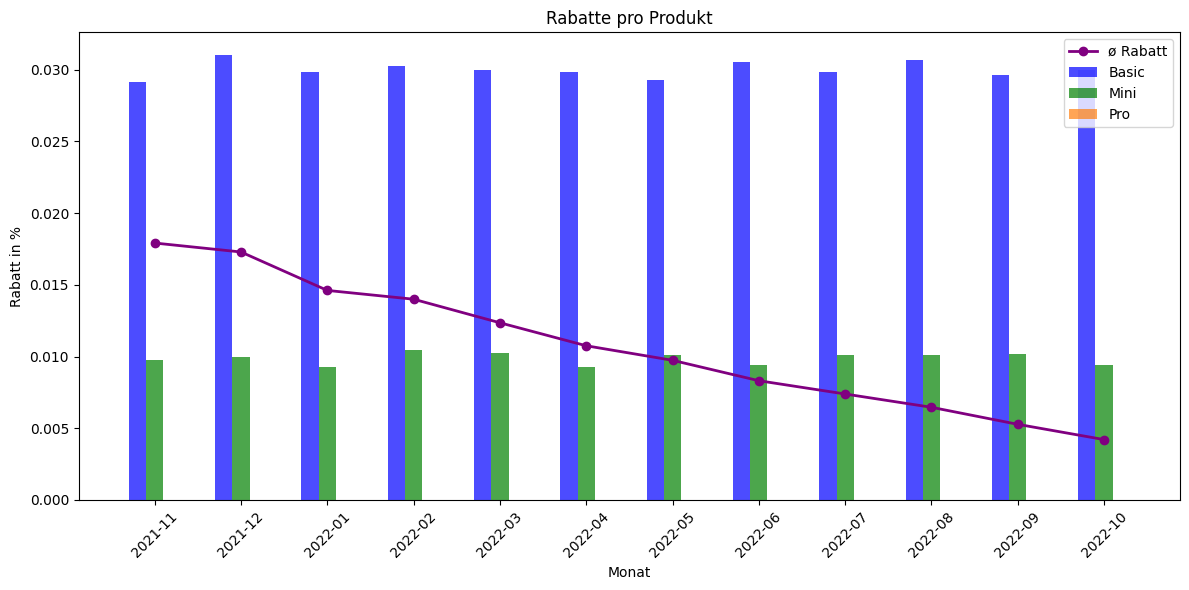

In [87]:
# Größe des Plots
plt.figure(figsize=(12, 6))

# Jahr und Monat aus der Spalte "Datum" extrahieren
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Erstellen einer Liste eindeutiger Jahr/Monat-Werte für die x-Achse
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Breite für jeden Balken
bar_width = 0.2

# Balkendiagramme für jeden Vertriebskanal
plt.bar(x - bar_width, (df_discounts_basic_monthly['discount']), width=bar_width, label='Basic', color='b', alpha=0.7)
plt.bar(x, (df_discounts_mini_monthly['discount']), width=bar_width, label='Mini', color='g', alpha=0.7)
plt.bar(x + bar_width, (df_discounts_pro_monthly['discount']), width=bar_width, label='Pro', color='tab:orange', alpha=0.7)

# Liniendiagramm mit den Daten von df_discounts_monthly
plt.plot(x, (df_discounts_monthly['discount']), label='ø Rabatt', color='purple', linewidth=2, marker='o')

# Titel und Beschriftungen
plt.title('Rabatte pro Produkt')
plt.xlabel('Monat')
plt.ylabel('Rabatt in %')

# Beschriftungen der x-Achse als Datum festlegen
plt.xticks(x, x_labels, rotation=45)

# Legende hinzufügen
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Analyseergebnisse der Rabatte pro Produkt**

Das Diagramm bietet eine detaillierte Sicht auf die Entwicklung der Rabatte, die für die drei Produktkategorien Basic, Mini und Pro gewährt wurden. Die visuelle Darstellung zeigt deutlich, dass die Rabatte für die Basic-Kategorie über den gesamten Zeitraum hinweg die höchsten sind, gefolgt von den Kategorien Mini und Pro, welche signifikant geringere Rabatte aufweisen.

**Schlüsselerkenntnisse:**
* Höhere Rabatte bei Basic-Produkten: Die Basic-Produkte erhalten durchgehend mehr Rabatt als Mini und Pro. Dies könnte auf eine strategische Positionierung dieser Produkte als Einstiegsmodelle oder Lockangebote hinweisen.
* Abnehmender Rabatttrend: Es gibt einen klaren abnehmenden Trend bei den durchschnittlichen Rabatten über alle Produktkategorien, was auf die allgemeine Verschiebung der Verkaufen-Geräte hinweist.

#### Integrierte Betrachtung der Rabattanalysen:
Unter Berücksichtigung der vorherigen Analysen zu Rabatten nach Vertriebskanal und Region, lässt sich feststellen, dass die Tablet GmbH eine konsistente Reduktion von Rabatten über alle Bereiche hinweg anstrebt. Dies liegt nicht an einer Veränderung der gegebenen Rabatte, sondern daran das sich die abgesetzten Produkte geändert haben hin zu Produkten auf denen keine Rabatte gegeben werden.
 
**Strategische Handlungsempfehlungen:**
* Rabattstrategie überdenken: Die Tablet GmbH sollte die Abhängigkeit von Rabatten bei den Basic-Produkten überprüfen, insbesondere wenn diese Rabatte nicht zu einer entsprechenden Umsatz- oder Marktanteilssteigerung führen.
* Produktwert stärken: Bei Mini und Basic könnte das Unternehmen erwägen, den Produktwert durch andere Maßnahmen als Rabatte zu erhöhen, beispielsweise durch Verbesserungen der Produktspezifikationen oder verstärkte Marketingaktivitäten.
* Kundenbindung erhöhen: Programme zur Kundenbindung und -loyalität, die über Preisnachlässe hinausgehen, sollten erforscht werden, um den Wert der Marke zu stärken und die Verbraucherbindung zu festigen.

**Zusammenfassung:**

Die Tablet GmbH hat einen klar erkennbaren Trend von sinkenden Rabatten, der sich konsistent über verschiedene Vertriebskanäle und Regionen erstreckt. Die bisherigen Analysen legen nahe, dass die Kunden möglicherweise weniger preissensitiv sind und dass eine wertorientierte Strategie, die den Produktwert in den Vordergrund stellt, langfristig erfolgversprechender sein könnte. Es ist wichtig, dass das Unternehmen weiterhin die Auswirkungen dieser Strategie auf den Umsatz genau beobachtet und bei Bedarf Anpassungen vornimmt.

### Analyse der Downtime

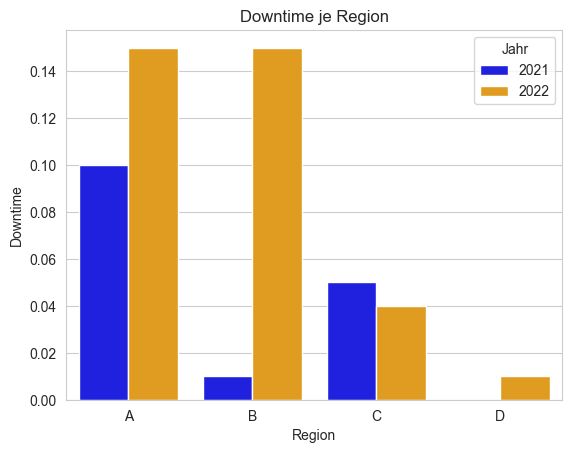

In [88]:
# df_downtime als Saeulendiagramm darstellen
sns.set_style("whitegrid")

# Farbpalette definieren (Blau für 2021, Orange für 2022)
colors = ["blue", "orange"]

# Saeulendiagramm erstellen
ax = sns.barplot(x="region", y="downtime", hue="year", data=df_downtime, palette=colors)

# Achsenbeschriftung
ax.set_xlabel("Region")
ax.set_ylabel("Downtime")

# Legende
ax.legend(title="Jahr", loc="upper right")

# Titel
ax.set_title("Downtime je Region")

plt.show()

In [89]:
df_sales_A = df_sales_online[df_sales_online['region'] == 'A']
df_sales_B = df_sales_online[df_sales_online['region'] == 'B']
df_sales_C = df_sales_online[df_sales_online['region'] == 'C']
df_sales_D = df_sales_online[df_sales_online['region'] == 'D']

# Groupiere nach Monat und zähle Verkäufe
df_discounts_A_monthly = df_sales_A.groupby(df_sales_A['date'].dt.to_period('M'))['amount'].count().reset_index()
df_discounts_B_monthly = df_sales_B.groupby(df_sales_B['date'].dt.to_period('M'))['amount'].count().reset_index()
df_discounts_C_monthly = df_sales_C.groupby(df_sales_C['date'].dt.to_period('M'))['amount'].count().reset_index()
df_discounts_D_monthly = df_sales_D.groupby(df_sales_D['date'].dt.to_period('M'))['amount'].count().reset_index()

df_discounts_A_monthly['date'] = df_discounts_A_monthly['date'].dt.to_timestamp()
df_discounts_B_monthly['date'] = df_discounts_B_monthly['date'].dt.to_timestamp()
df_discounts_C_monthly['date'] = df_discounts_C_monthly['date'].dt.to_timestamp()
df_discounts_D_monthly['date'] = df_discounts_D_monthly['date'].dt.to_timestamp()

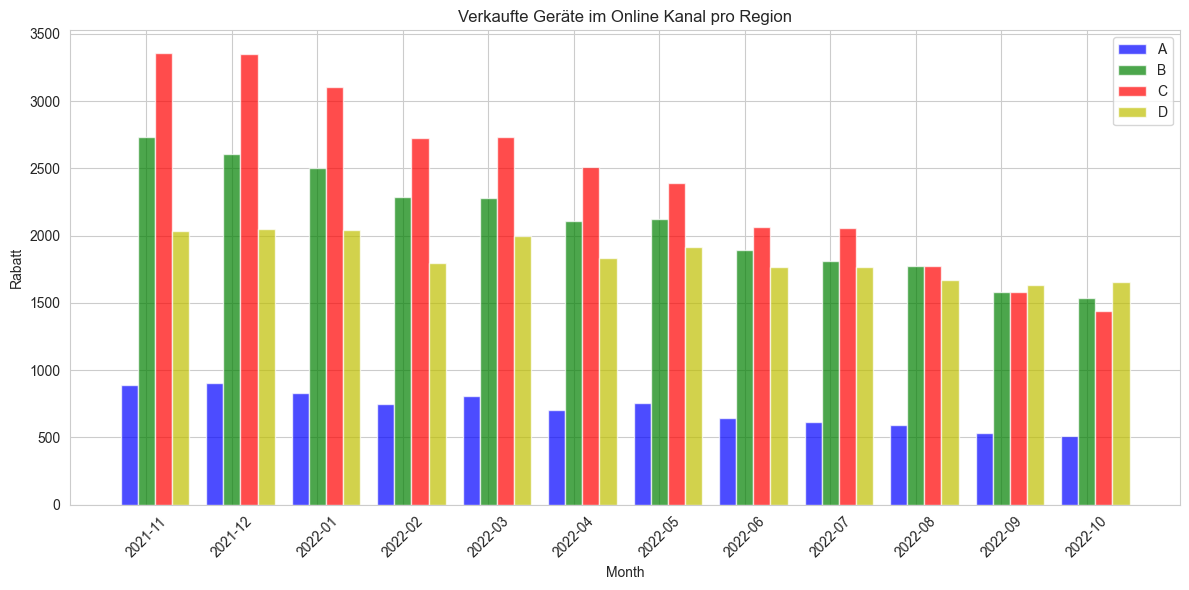

In [90]:
# Größe des Plots
plt.figure(figsize=(12, 6))

# Jahr und Monat aus der Spalte "Datum" extrahieren
df_discounts_online_monthly['year_month'] = df_discounts_online_monthly['date'].dt.strftime('%Y-%m')

# Erstellen einer Liste eindeutiger Jahr/Monat-Werte für die x-Achse
x_labels = df_discounts_online_monthly['year_month'].unique()
x = np.arange(len(df_discounts_online_monthly['date']))

# Breite für jeden Balken
bar_width = 0.2

# Balkendiagramme für jeden Vertriebskanal
plt.bar(x - bar_width, (df_discounts_A_monthly['amount']), width=bar_width, label='A', color='b', alpha=0.7)
plt.bar(x, (df_discounts_B_monthly['amount']), width=bar_width, label='B', color='g', alpha=0.7)
plt.bar(x + bar_width, (df_discounts_C_monthly['amount']), width=bar_width, label='C', color='r', alpha=0.7)
plt.bar(x + (2 * bar_width), (df_discounts_D_monthly['amount']), width=bar_width, label='D', color='y', alpha=0.7)

# Titel und Beschriftungen
plt.title('Verkaufte Geräte im Online Kanal pro Region')
plt.xlabel('Month')
plt.ylabel('Rabatt')

# Beschriftungen der x-Achse als Datum festlegen
plt.xticks(x, x_labels, rotation=45)

# Legende hinzufügen
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Analyse der Downtime**

Die Analyse der vorliegenden Daten zur Downtime in den verschiedenen Regionen und deren möglichen Einfluss auf den Online-Absatz bedarf einer vorsichtigen Interpretation. Mit nur zwei Datenpunkten für die Jahre 2021 und 2022 ist die Informationsgrundlage zu begrenzt, um fundierte Schlüsse über kausale Zusammenhänge zwischen Systemausfällen und Verkaufszahlen zu ziehen.

**Beobachtungen:**
* Datenpunkte zu Downtime: Die Diagramme zeigen für die Jahre 2021 und 2022 eine Downtime in den Regionen A, B, C und D. Es ist jedoch unklar, inwieweit diese Downtime direkte Auswirkungen auf den Absatz hatte.
* Absatzentwicklung im Online-Kanal: Die Betrachtung des Online-Absatzes über den Jahreswechsel hinweg offenbart keine signifikanten Veränderungen in den Verkaufszahlen, die eindeutig auf die Downtime zurückgeführt werden könnten.

Die bisherigen Analysen legen nahe, dass die Downtime in den betrachteten Regionen keinen offensichtlichen, unmittelbaren Einfluss auf den Online-Absatz hat. Dennoch ist es wichtig, die Systemstabilität als einen potenziellen Faktor für die Kundenzufriedenheit und das Verbrauchervertrauen nicht zu unterschätzen. Die Tablet GmbH sollte daher sicherstellen, dass die Infrastruktur robust genug ist, um die Zuverlässigkeit des Online-Vertriebs zu gewährleisten, was letztlich zur Umsatzstabilität beiträgt.

## 11. Analyse der Regionen

In diesem Abschnitt werden die Regionen auf ihre Performance untersucht. Hierfür werden die Umsätze, die Kosten und die Gewinne der Regionen analysiert. Außerdem wird analysiert, wie sich die Verkaufskanäle in den Regionen entwickeln und ob es einen Zusammenhang zwischen den Kanälen und der wirtschaftlichen Leistung der Regionen gibt.

### Entwicklung der wirtschaftlichen Kennzahlen

In [91]:
# Umsatz, Kosten und Gewinn pro Monat für Region A
df_sales_a = df_sales[df_sales['region'] == 'A'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Monat für Region B
df_sales_b = df_sales[df_sales['region'] == 'B'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Monat für Region C
df_sales_c = df_sales[df_sales['region'] == 'C'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Monat für Region D
df_sales_d = df_sales[df_sales['region'] == 'D'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

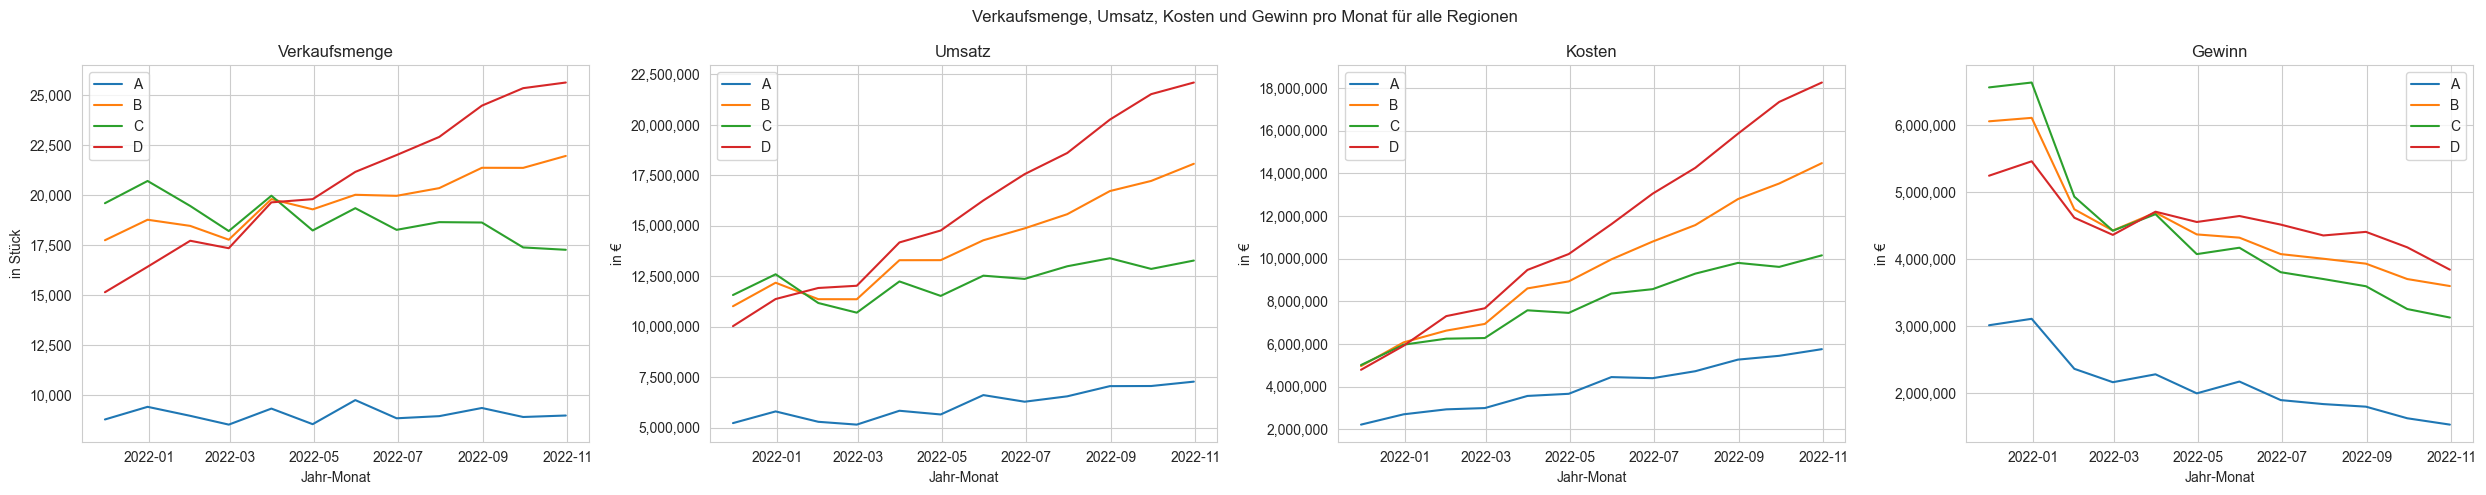

In [92]:
# Umsatz, Kosten und Gewinn pro Monat für alle Regionen jeweils als Subplot visualisieren und alle Subplots zusammenfassen
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle('Verkaufsmenge, Umsatz, Kosten und Gewinn pro Monat für alle Regionen')

axes[0].plot(df_sales_a['amount'], label='A')
axes[0].plot(df_sales_b['amount'], label='B')
axes[0].plot(df_sales_c['amount'], label='C')
axes[0].plot(df_sales_d['amount'], label='D')
axes[0].set_title('Verkaufsmenge')
axes[0].set_xlabel('Jahr-Monat')
axes[0].set_ylabel('in Stück')
axes[0].legend()

axes[1].plot(df_sales_a['revenue'], label='A')
axes[1].plot(df_sales_b['revenue'], label='B')
axes[1].plot(df_sales_c['revenue'], label='C')
axes[1].plot(df_sales_d['revenue'], label='D')
axes[1].set_title('Umsatz')
axes[1].set_xlabel('Jahr-Monat')
axes[1].set_ylabel('in €')
axes[1].legend()

axes[2].plot(df_sales_a['cost_total'], label='A')
axes[2].plot(df_sales_b['cost_total'], label='B')
axes[2].plot(df_sales_c['cost_total'], label='C')
axes[2].plot(df_sales_d['cost_total'], label='D')
axes[2].set_title('Kosten')
axes[2].set_xlabel('Jahr-Monat')
axes[2].set_ylabel('in €')
axes[2].legend()

axes[3].plot(df_sales_a['profit_total'], label='A')
axes[3].plot(df_sales_b['profit_total'], label='B')
axes[3].plot(df_sales_c['profit_total'], label='C')
axes[3].plot(df_sales_d['profit_total'], label='D')
axes[3].set_title('Gewinn')
axes[3].set_xlabel('Jahr-Monat')
axes[3].set_ylabel('in €')
axes[3].legend()

# y-Achse in Millionen formatieren
for ax in axes:
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()

### Datenaufbereitung: 

Für die Analyse waren viele verschiedene Datensätze notwendig. Diese wurden in diesem Abschnitt zusammengeführt und aufbereitet.

Das erste Dataframe (DF) gruppiert den totalen Gewinn nach Regionen, Produkten und Kanälen. Diese werden durch eine Million geteilt für eine angenehmere Darstellung in den späteren Diagrammen. Das zweite DF gruppiert die gesamte Verkaufsmenge nach den einzelnen Regionen und den einzelnen Produkten. Die restlichen DFs wurden für jede Region einzeln erstellt. Für jede Region wurden die Verkaufsmengen über den gesamten Zeitraum aggregiert und nach den unterschiedlichen Kanälen gruppiert.

In [93]:
# Gewinn pro Region, Produkt und Kanal
profit_per_region_product_channel = df_sales.groupby(['region', 'product', 'channel'])['profit_total'].sum()/1_000_000
profit_per_region_product_channel = profit_per_region_product_channel.reset_index()
profit_per_region_product_channel = profit_per_region_product_channel.replace({'product': {'Tablet Basic': 'Basic', 'Tablet Mini': 'Mini', 'Tablet Pro': 'Pro'}})

# Verkaufsmenge pro Region und Produkt
sales_per_product_by_region = df_sales.groupby(['region', 'product']).agg({'amount': 'sum'})
sales_per_product_by_region = sales_per_product_by_region.reset_index()

#Verkaufte Menge pro Region und Produkt
df_sales_region_channel = df_sales.groupby(["year", "month", 'region', 'channel']).agg({"amount" : "sum"})
df_sales_region_channel.reset_index(inplace=True)

#Region A
df_sales_region_channel_a = df_sales_region_channel[df_sales_region_channel['region'] == 'A']
df_sales_region_channel_a_online = df_sales_region_channel_a[df_sales_region_channel_a['channel'] == 'online']
df_sales_region_channel_a_phone = df_sales_region_channel_a[df_sales_region_channel_a['channel'] == 'phone']
df_sales_region_channel_a_store = df_sales_region_channel_a[df_sales_region_channel_a['channel'] == 'store']

#Region B
df_sales_region_channel_b = df_sales_region_channel[df_sales_region_channel['region'] == 'B']
df_sales_region_channel_b_online = df_sales_region_channel_b[df_sales_region_channel_b['channel'] == 'online']
df_sales_region_channel_b_phone = df_sales_region_channel_b[df_sales_region_channel_b['channel'] == 'phone']
df_sales_region_channel_b_store = df_sales_region_channel_b[df_sales_region_channel_b['channel'] == 'store']

#Region C
df_sales_region_channel_c = df_sales_region_channel[df_sales_region_channel['region'] == 'C']
df_sales_region_channel_c_online = df_sales_region_channel_c[df_sales_region_channel_c['channel'] == 'online']
df_sales_region_channel_c_phone = df_sales_region_channel_c[df_sales_region_channel_c['channel'] == 'phone']
df_sales_region_channel_c_store = df_sales_region_channel_c[df_sales_region_channel_c['channel'] == 'store']

#Region D
df_sales_region_channel_d = df_sales_region_channel[df_sales_region_channel['region'] == 'D']
df_sales_region_channel_d_online = df_sales_region_channel_d[df_sales_region_channel_d['channel'] == 'online']
df_sales_region_channel_d_phone = df_sales_region_channel_d[df_sales_region_channel_d['channel'] == 'phone']
df_sales_region_channel_d_store = df_sales_region_channel_d[df_sales_region_channel_d['channel'] == 'store']

### Umsatzanteile nach Regionen

In diesem Teil werden der Umsatz und die Verkaufsmengen der einzelnen Regionen in einer gemeinsamen Darstellung analysiert.

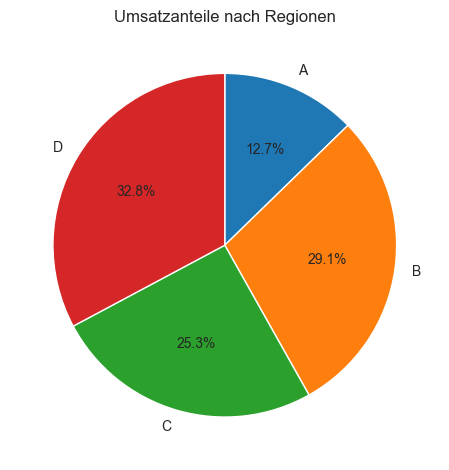

In [94]:
# Anteil am Umsatz nach Region als Kreisdiagramm
df_sales_per_region = df_sales.groupby(['region'])['revenue'].sum()

plt.pie(df_sales_per_region, labels=df_sales_per_region.index, autopct='%1.1f%%', counterclock=False, startangle=90)
plt.title('Umsatzanteile nach Regionen')

plt.tight_layout()
plt.show()

Das hier zusehende Kreisdiagramm zeigt an wie viel jede Region zum Gesamtumsatz beiträgt.

In einem Optimalfall würden alle Regionen ungefähr gleich viel zum Gesamtumsatz beitragen, da während der Analyse die Annahme getroffen wurde, dass alle Regionen systematisch gleich sind und in jeder Region die gleichen Produkte über die gleichen Vertriebskanäle verkauft werden. Das ist hier jedoch nicht der Fall.

Es fällt besonders auf, dass die Region A einen fast dreifach kleineren Umsatzanteil hat als die Region D. Der Unterschied in den Anteilen der anderen Regionen ist dabei im Vergleich weitaus weniger stark, hier liegen die Unterschiede in einem Bereich von 3% bis 5%. Diese Werte liegen schon näher am Optimalfall, dass alle Regionen gleich große Anteile haben. Von A zu C, der drittschlechtesten Region, beträgt der Unterschied allein schon 12.6 Prozentpunkte.

Für die folgenden Analysen liegt der Fokus auf die Regionen A und D, da diese die Extremwerte darstellen.

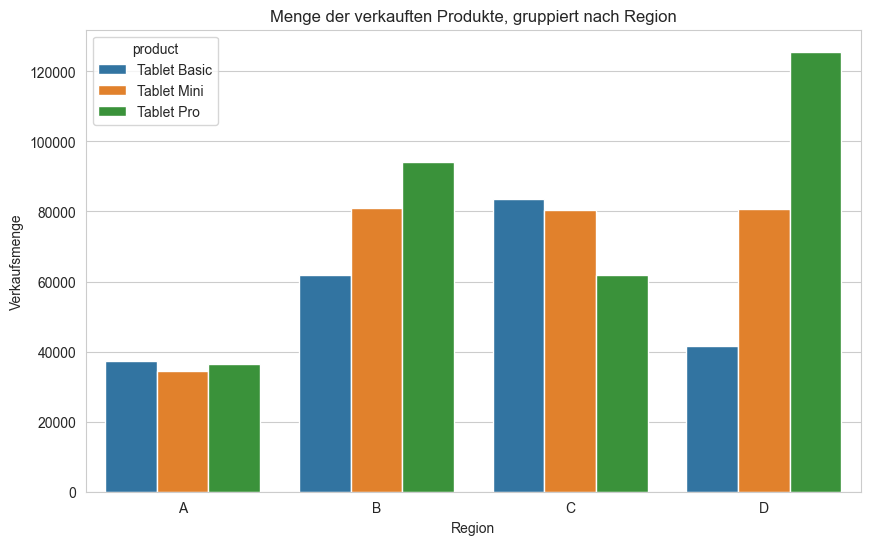

In [95]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sales_per_product_by_region, x='region', y='amount', hue='product')

plt.title('Menge der verkauften Produkte, gruppiert nach Region')
plt.xlabel('Region')
plt.ylabel('Verkaufsmenge')
plt.show()

Das Balkendiagramm zeigt für jede Region die Verkaufsmengen der einzelnen Produkte.

Die Extrema sind hier die Mengenwerte von dem Tablet Mini in der Region A mit ungefähr 37000 Stück und dem Tablet Pro in der Region D mit ungefähr 123000 Stück. Region A hat hier über alle Produkte hinweg die geringsten Verkaufsmengen, was nicht verwunderlich ist, da sie auch den geringsten Umsatzanteil hat.

Die Balken von Region B und C sind hier symmetrisch, wo bei B einen größeren Höchstwert hat, mit dem Tablet Pro. Obwohl Region D den größten Umsatzanteil hat, ist die Verteilung der Verkaufsmengen weitaus ungleichmäßiger als bei B und C. Insbesondere die schlechten Verkaufsmengen des Tablet Basic fallen hier auf, die sich schon fast den Verkaufszahlen der Region A annähern. Die schlechte Performance wird aber durch die sehr guten Verkaufsmengen des Tablet Pro ausgeglichen.

Mit dem Hintergrundwissen, dass das Produkt Pro auch am meisten Umsatz bringt, ist es nicht verwunderlich, dass die Region D den größten Umsatzanteil hat. In­te­r­es­san­t ist jedoch, dass das Tablet Mini, welches sich in den Regionen B, C und D auf einem ähnlich hohen Level verkauft wird, in der Region A deutlich schlechtere Verkaufszahlen aufweist.

Insgesamt bildet sich hier die Fragestellung: Warum ist die Performance der Regionen so unterschiedlich? Hier liegt der Fokus besonders auf der Region A, da sie als Underperformer besonders auffällt.

Um dies genauer zu untersuchen, werden nun die einzelnen Regionen detailierter analysiert.

### Funktionen:

Die folgenden Funktionen wurden speziell für die Erstellung der folgenden Diagramme gebaut. Sie dienen nur der einfachen Redundanzvermeidung und sind schwer wiederzuverwenden in Bereichen außerhalb dieses Abschnittes.

In [96]:
def plot_profit_per_product_channel_region(region_costs, profit_per_region_product_channel):
    # Iteration über die einzelnen Regionen
    for region_cost in region_costs:
        # Filtern der Daten für die aktuelle Region
        region_data = profit_per_region_product_channel[profit_per_region_product_channel['region'] == region_cost]
        
        # Diagramm erstellen
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Erstellen der x-Achsenbeschriftungen für das Säulendiagramm
        products = region_data['product']
        channels = region_data['channel']
        labels = [f'{product} - {channel}' for product, channel in zip(products, channels)]
        
        # Extrahieren der Gewinne
        profits = region_data['profit_total']
        
        # Festlegen der Farben für Basic, Mini und Pro
        colors = ['tab:orange' if product == 'Basic' else 'b' if product == 'Mini' else 'g' for product in products]
        
        # Erstellen des Säulendiagramms mit den entsprechenden Farben
        plt.bar(labels, profits, color=colors)
        
        # Achsentitel und Diagrammtitel
        plt.xlabel('Produkt und Kanal', size = 15)
        plt.ylabel('Profit in Mio. €', size = 15)
        plt.title(f'Profit pro Produkt & Kanal - Region {region_cost}', size = 20)
        
        # Anpassung des Layouts und Anzeigen des Diagramms
        plt.tight_layout()
        
        # Gitterlinien aktivieren
        plt.grid(True)

        # Legende anzeigen mit den entsprechenden Farben
        legend_elements = [mpatches.Patch(facecolor='tab:orange', label='Basic'),
                              mpatches.Patch(facecolor='b', label='Mini'),
                              mpatches.Patch(facecolor='g', label='Pro')]
        plt.legend(handles=legend_elements, loc='upper right', fontsize='large')

        # Gitter in den Hintergrund legen
        ax.set_axisbelow(True)
         
        # Anpassung x-Achse und y-Achse
        max = 22.5
        ticks = 2.5
        plt.xticks(rotation = 45)
        plt.yticks(np.arange(0, max, ticks))
        plt.show()
        
def plot_sales(region):
    # Erstellen der Datenframes für die einzelnen Kanäle
    df_sales_region_channel_online = globals()[f'df_sales_region_channel_{region.lower()}_online']
    df_sales_region_channel_phone = globals()[f'df_sales_region_channel_{region.lower()}_phone']
    df_sales_region_channel_store = globals()[f'df_sales_region_channel_{region.lower()}_store']

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Daten plotten
    ax.plot(df_sales_region_channel_online['year'].astype(str) + '-' + df_sales_region_channel_online['month'].astype(str), df_sales_region_channel_online['amount'])
    ax.plot(df_sales_region_channel_phone['year'].astype(str) + '-' + df_sales_region_channel_phone['month'].astype(str), df_sales_region_channel_phone['amount'])
    ax.plot(df_sales_region_channel_store['year'].astype(str) + '-' + df_sales_region_channel_store['month'].astype(str), df_sales_region_channel_store['amount'])

    # Achsenbeschriftung und Titel hinzufuegen
    ax.set_xlabel('Jahr-Monat', fontsize=12)

    # y-Achse in Millionen formatieren
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    ax.set_ylabel('Menge in Stück', fontsize=12)
    ax.set_title(f'Verkaufsmenge nach Kanälen - Region {region}', fontsize=20)

    # Legende hinzufuegen
    ax.legend(['Online', 'Phone', 'Store'], fontsize=14)

    # X-Achsenbeschriftung drehen
    plt.xticks(rotation=45)

    # Diagramm anzeigen
    plt.tight_layout()
    plt.show()

### Region A

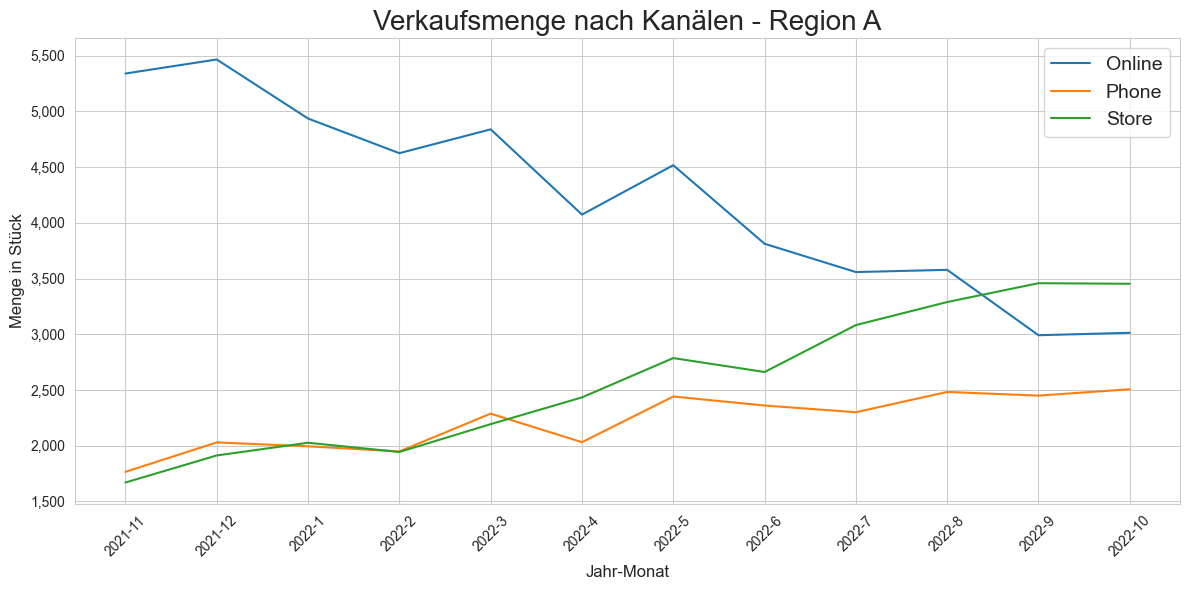

In [97]:
plot_sales('A')

Das Graphendiagramm zeigt die Verkaufsmengen nach Vertriebskanälen für die Region A, in dem Zeitraum von November 2021 bis Oktober 2022.

Der Online-Kanal ist hier im Abwärtstrend, während der Phone- und Store-Kanal im Aufwärtstrend sind. Das zeigt hier, dass die allgemeinen Trends der Vertriebskanäle auch in der Region A stattfinden.

Alle drei Graphen sind am Ende des Beobachtungszeitraums ungefähr gleich groß, mit einem Abstand von 1000 Stück. Am Anfang des Beobachtungszeitraums ist der Online-Kanal noch der größte Kanal mit einem sehr großen Abstand zu den beiden anderen Kanälen. Im Verlauf der Zeit wird der Abstand immer kleiner und am Ende des Beobachtungszeitraums ist der Store-Kanal der größte Kanal. Zwischen dem 08/2022 und dem 9/2022 findet der Wendepunkt statt, wo der Graph des Online-Kanals vom Store Kanal überholt wird.

Die Beobachtung des Wendepunktes und wann der stattfindet, wird mit dem späteren Vergleich der anderen Regionen verwendet, um Schlüsse für die schlechte Performance der Region A zu ziehen. 

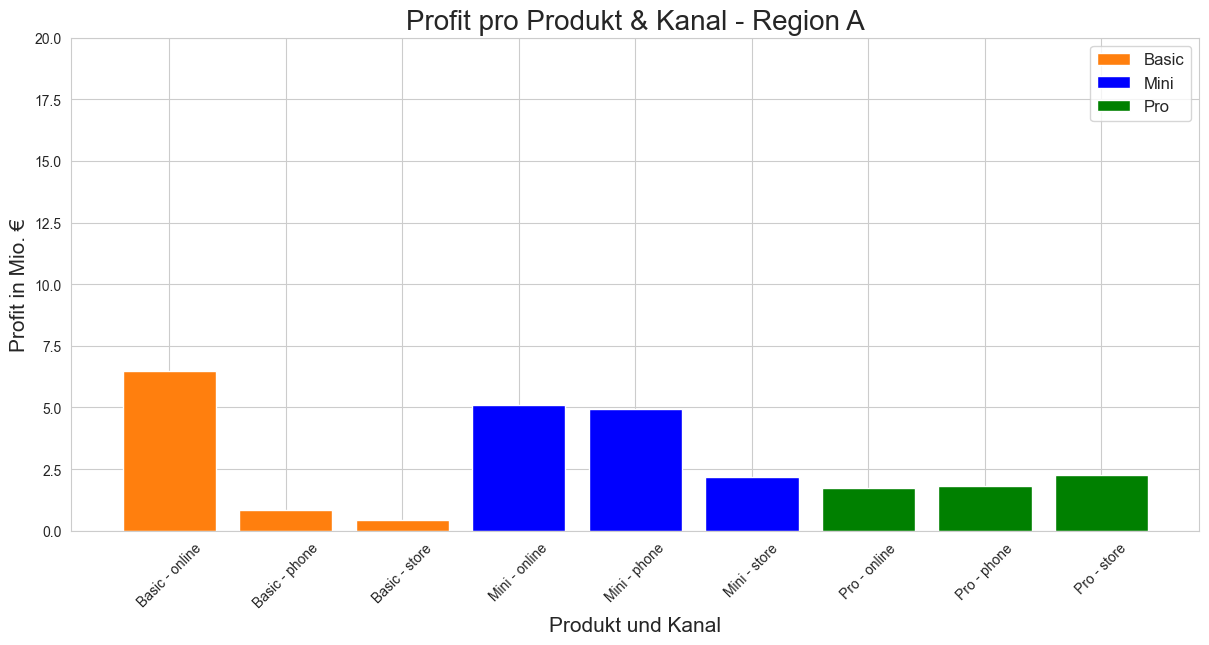

In [98]:
region_profit = ["A"]
plot_profit_per_product_channel_region(region_profit, profit_per_region_product_channel)

Das Balkendiagramm zeigt den Gesamtprofit aufgeteilt nach den einzelnen Produkte und Vertriebskanälen in der Region A. Links das Tablet Basic, in der Mitte das Tablet Mini und rechts das Tablet Pro.

Die Extrema sind hier als Maximum das Basic + Online mit 6.25 Millionen € und als Minimum das Basic + Online mit 0.3 Millionen €. Generell sind die Profitströme, unabhängig vom Kanal und Produkt, sehr niedrig.

Das Tablet Pro bringt über alle Kanäle hinweg wenig Profit, was in Zusammenhang mit den geringen Verkaufsmengen und hohen Produktionskosten stehen könnte. Der Online-Kanal ist hier am profitabelsten, Basic und Mini bringen in diesem Kanal am meisten Profit und beim Pro sind Unterschiede der Kanäle sehr gering. Die Kombination Basic + Online ist hier eine der wichtigsten Profitstützen, wobei eine ähnliche Kombination bei Mini und Pro hier fehlt.

Man erkennt hier gut, dass das schlechte Abschneiden der Region A an der unausgeschöpften Profitmöglichkeiten liegt, vor allem beim Tablet Pro.

### Region B

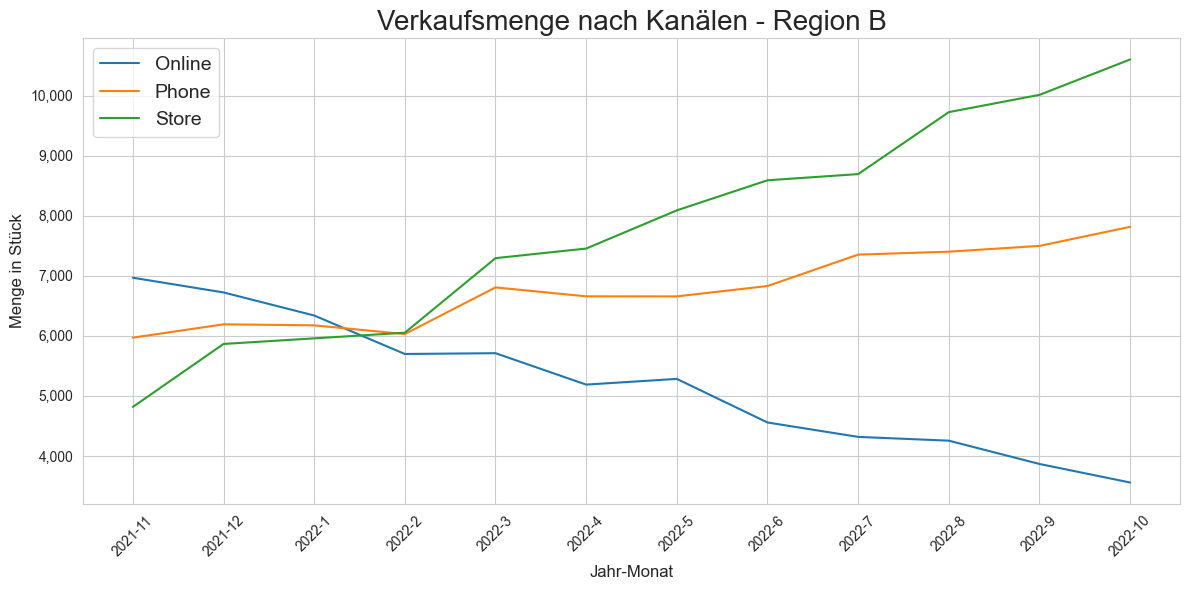

In [99]:
plot_sales('B')

Das Graphendiagramm zeigt die Verkaufsmengen nach Vertriebskanälen für die Region B, in dem Zeitraum von November 2021 bis Oktober 2022.

Der Online Kanal ist hier im Abwärtstrend, während der Phone und Store Kanal im Aufwärtstrend sind. Das zeigt hier, dass die allgemeinen Trends der Vertriebskanäle auch in der Region B stattfinden. Alle drei Graphen liegen am Ende des Beobachtungszeitraums weit auseinander, mit einem Abstand von 7000-8000 Stück. Am Anfang des Beobachtungszeitraums liegen die Graphen noch sehr nah beieinander, mit einem Abstand von 2000 Stück. Der Online Kanal ist hier am Anfang des Beobachtungszeitraums der größte Kanal. Im Verlauf der Zeit wird der Abstand immer größer und am Ende des Beobachtungszeitraums ist der Store Kanal der größte Kanal. Zwischen dem 01/2022 und dem 2/2022 findet der Wendepunkt statt, wo der Graph des Online Kanals überholt wird vom Store und Phone Kanal.

Das zeigt uns gut, dass der Wendepunkt hier viel früher, 7 Monate, stattfindet als in der Region A. Für das angezielte Normalverhalten der Regionen ist ein früherer Wendepunkt besser, da die Region weniger vom Abwärtstrend des Online Kanals betroffen ist.

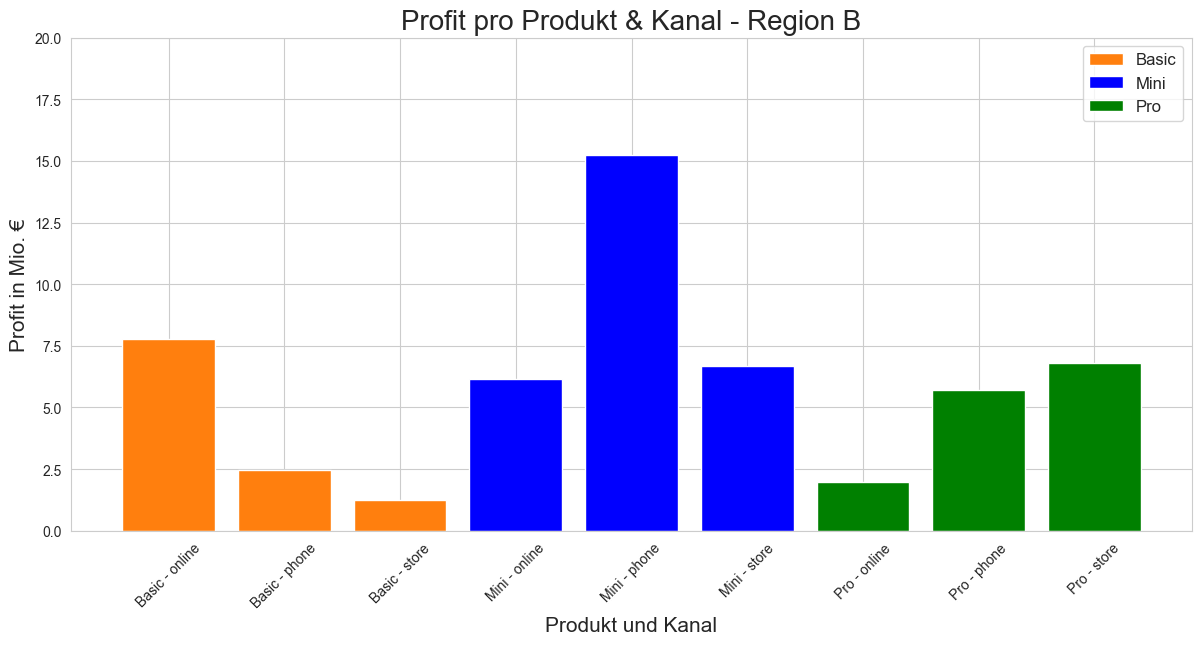

In [100]:
region_profit = ["B"]  
plot_profit_per_product_channel_region(region_profit, profit_per_region_product_channel)

Das Balkendiagramm zeigt den Gesamtprofit aufgeteilt nach den einzelnen Produkte und Vertriebskanälen in der Region B. Links das Tablet Basic, in der Mitte das Tablet Mini und rechts das Tablet Pro.

Die Extrema sind hier als Maximum das Mini + Phone mit 15 Millionen € und als Minimum das Basic + Store mit 1 Millionen €. Generell sind die Profitströme, hier sehr unterschiedlich verteilt, aber trotzdem in fast jeder Kombination höher als bei der Region A.

Die Kombination Mini + Phone und Pro + Store zeigen gut, was der Region A fehlt. Die drei Kombinationen Basic + Online, Mini + Phone und Pro + Store sind hier die wichtigsten Profitstützen, wobei die erste Kombination im Verlauf des Beobachtungszeitraums immer mehr an Wert verlieren wird.

### Region C

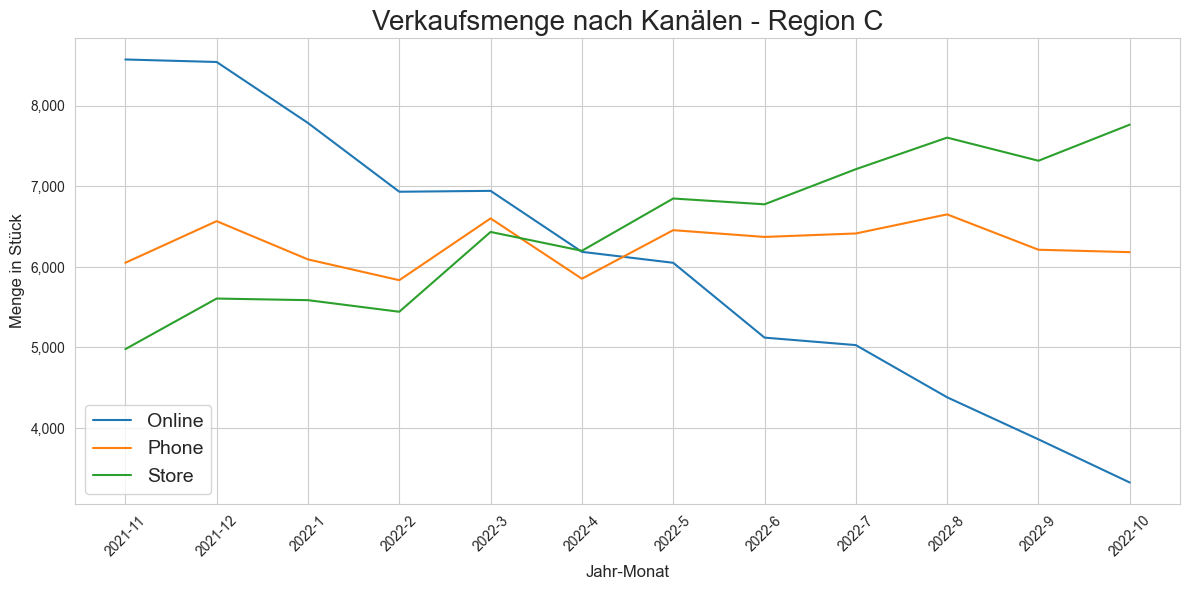

In [101]:
plot_sales('C')

Das Graphendiagramm zeigt die Verkaufsmengen nach Vertriebskanälen für die Region C, in dem Zeitraum von November 2021 bis Oktober 2022.

Der Online Kanal ist hier im Abwärtstrend, während der Phone und Store Kanal im Aufwärtstrend sind, wobei der Trend beim Phone Kanal eher schwach ausgeprägt ist. Das zeigt hier, dass die allgemeinen Trends der Vertriebskanäle auch in der Region C stattfinden. Alle drei Graphen liegen am Ende des Beobachtungszeitraums weit auseinander, mit einem Abstand von 5000-6000 Stück.
Am Anfang des Beobachtungszeitraums liegen die Graphen ebenso noch weit auseinander, mit einem Abstand von 5000 Stück. Der Online Kanal ist hier am Anfang des Beobachtungszeitraums der größte Kanal. Im Verlauf der Zeit wird der Abstand zunächst kleiner, bis der Wendepunkt erreicht wird, wonach der Abstand wieder größer wird, und am Ende des Beobachtungszeitraums ist der Store Kanal der größte Kanal. An Anfang vom 04/2022 findet der Wendepunkt statt, wo der Graph des Online Kanals überholt wird vom Store und Phone Kanal.

Das zeigt uns gut, dass der Wendepunkt hier früher eintritt, als in der Region A, aber später als in der Region B, was den Unterschied beim Kreisdiagramm erklären könnte.

Für das angezielte Normalverhalten der Regionen ist ein früherer Wendepunkt besser, da die Region weniger vom Abwärtstrend des Online Kanals betroffen ist.

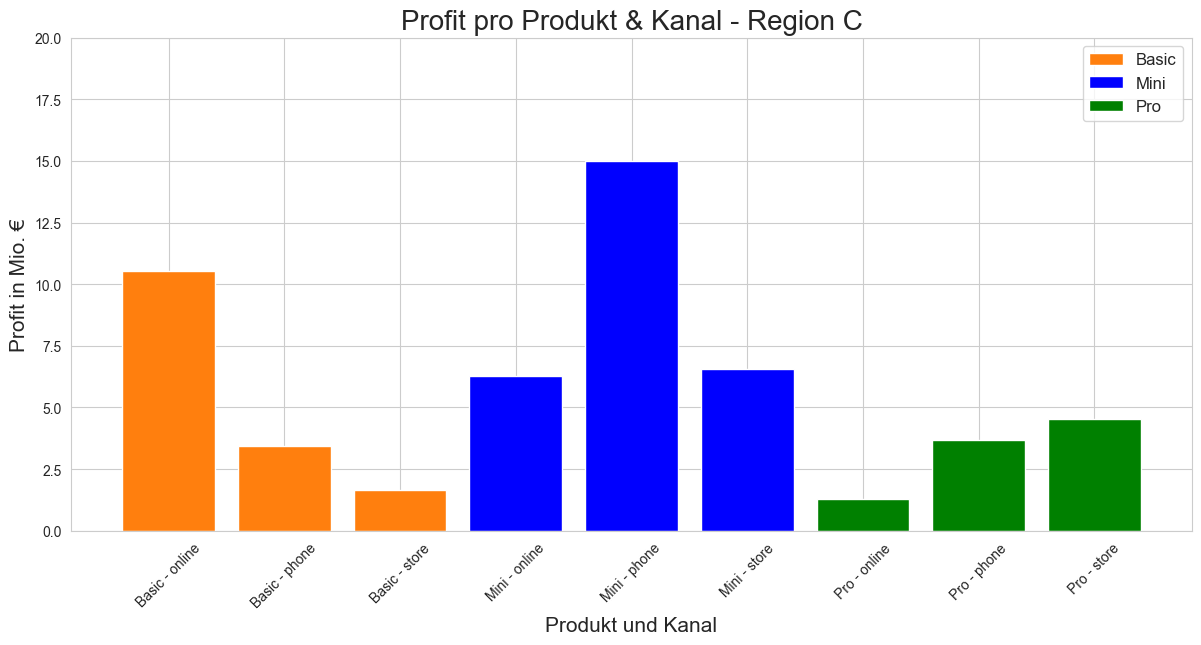

In [102]:
region_profit = ["C"] 
plot_profit_per_product_channel_region(region_profit, profit_per_region_product_channel)

Das Balkendiagramm zeigt den Gesamtprofit aufgeteilt nach den einzelnen Produkte und Vertriebskanälen in der Region C. Links das Tablet Basic, in der Mitte das Tablet Mini und rechts das Tablet Pro.

Die Extrema sind hier als Maximum das Mini + Phone mit 15 Millionen € und als Minimum das Basic + Store mit 1 Millionen €. Generell sind die Profitströme, hier sehr unterschiedlich verteilt, aber trotzdem in fast jeder Kombination höher als bei der Region A.

Die Kombination Mini + Phone und Pro + Store zeigen wieder gut, was der Region A fehlt, vorallem da C an dritter Stelle steht bei den Umsatzanteilen. Die drei Kombinationen Basic + Online, Mini + Phone und Pro + Store sind hier die wichtigsten Profitstützen, wobei die erste Kombination im Verlauf des Beobachtungszeitraums immer mehr an Wert verlieren wird.

Das Diagramm ist sehr ähnlich zu B, wobei die Kombination Pro + Store noch nicht so hoch ist und die Kombination Basic + Online noch höher ist. Höchstwahrscheinlich liegt der Grund am später stattfindenden Wendepunkt in der Region C als bei der Region B.

### Region D

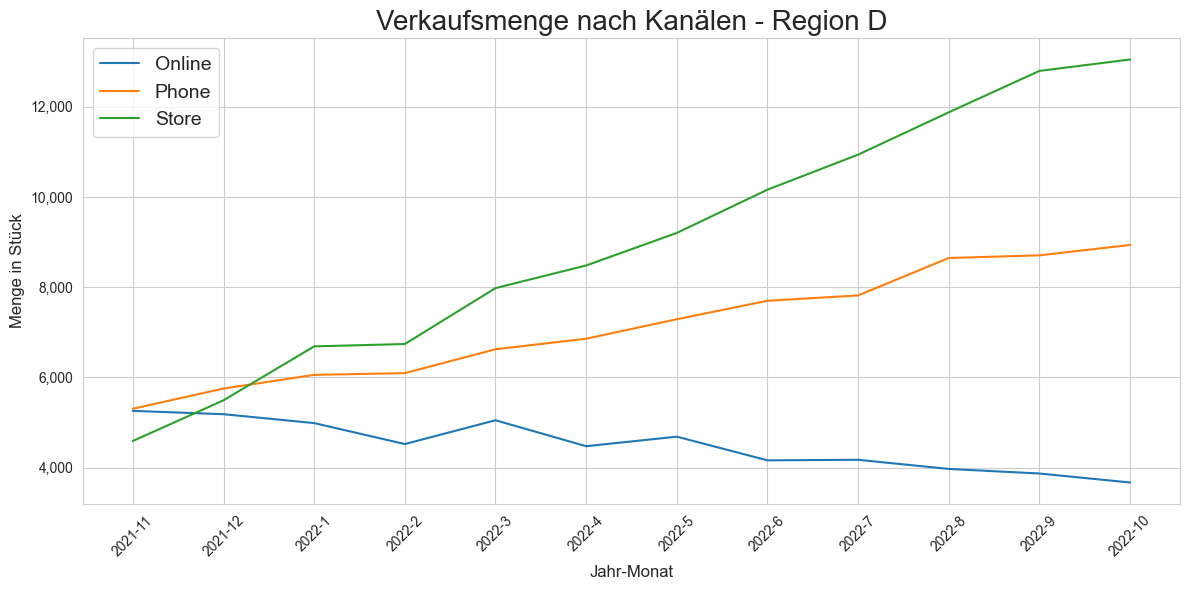

In [103]:
plot_sales('D')

Das Graphendiagramm zeigt die Verkaufsmengen nach Vertriebskanälen für die Region D, in dem Zeitraum von November 2021 bis Oktober 2022.

Der Online Kanal ist hier im Abwärtstrend, während der Phone und Store Kanal im Aufwärtstrend ist, wobei der Trend beim Online Kanal eher schwach ausgeprägt ist.
Das zeigt hier das die allgemeinen Trends der Vertriebskanäle auch in der Region D stattfinden. Alle drei Graphen liegen am Ende des Beobachtungszeitraums weit auseinander, mit einem Abstand von 9000-10000 Stück, die höchste von allen Regionen. Am Anfang des Beobachtungszeitraums liegen die Graphen noch sehr nah beieinander, mit einem Abstand von 1000 Stück. Der Online Kanal ist hier am Anfang des Beobachtungszeitraums nicht der größte Kanal, da der schon beobachtete Wendepunkt hier direkt am Anfang eingetreten ist. Im Verlauf der Zeit wird der Abstand immer größer und am Ende des Beobachtungszeitraums ist der Store Kanal der größte Kanal. An Anfang vom 11/2021 findet der Wendepunkt statt, wahrscheinlich sogar früher, da der Graph des Online Kanals schon niedriger ist als der des Phone Kanals.

Das zeigt uns gut, dass der Wendepunkt hier am frühesten eintritt, was den großen Umsatzanteil der Region D erklären könnte.

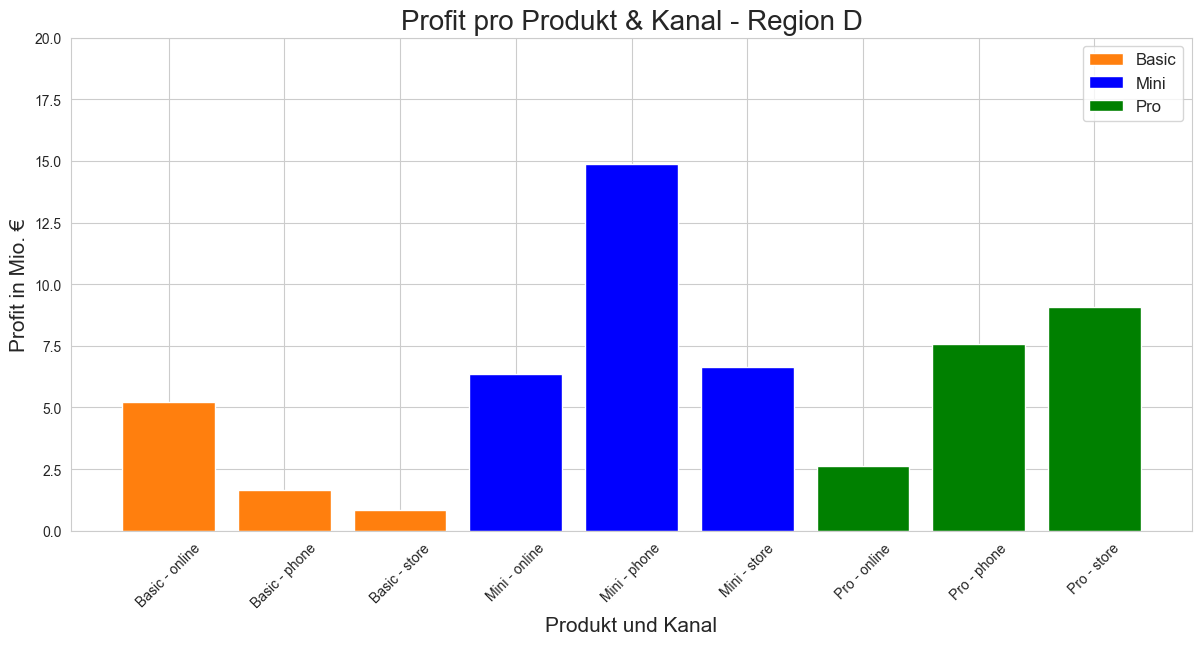

In [104]:
region_profit = ["D"] 
plot_profit_per_product_channel_region(region_profit, profit_per_region_product_channel)

Das Balkendiagramm zeigt den Gesamtprofit aufgeteilt nach den einzelnen Produkte und Vertriebskanälen in der Region D.
Links das Tablet Basic, in der Mitte das Tablet Mini und rechts das Tablet Pro.
Die Extrema sind hier als Maximum das Mini + Phone mit 15 Millionen € und als Minimum das Basic + Store mit 1 Millionen €.
Generell sind die Profitströme, hier sehr unterschiedlich verteilt, aber trotzdem in jeder Kombination höher als bei der Region A.

Die Kombination Mini + Phone und Pro + Store zeigen wieder gut, was der Region A fehlt.
Die drei Kombinationen Basic + Online, Mini + Phone und Pro + Store sind hier die wichtigsten Profitstützen, wobei die erste Kombination im Verlauf des Beobachtungszeitraums immer mehr an Wert verlieren wird.

Das Diagramm ist sehr ähnlich zu B, wobei die Kombination Pro + Store hier am so höchsten ist von allen Regionen und die Kombination Basic + Online besonders klein ist Vergleich zu den anderen Kombinationen. Höchstwahrscheinlich liegt der Grund für dieses Verhalten, daran das der Wendepunkt hier am frühesten stattfindet.

### Ergebnisse der Performance-Analyse der Regionen

Der Abwärtstrend vom Online Kanal und Basic Produkt schlägt sich in den Regionen unterschiedlich aus, findet aber überall statt. Region A leidet am meisten darunter, da sie am meisten über den Online Kanal verkauft und die Verkaufszahlen im Phone und Store noch nicht groß genug sind, um das auszugleichen.

Die anderen Regionen sind bei Profitgewinnung sehr ähnlich zueinander und können das Defizit aus dem Online Kanal besser ausgleichen. Besonders aufgrund der Mini + Phone und der Pro + Store Kombination, die hier am profitabelsten sind. Die Überperformance von D ist darauf zurückzuführen, dass sie am frühesten den Wendepunkt, also die Verkaufszahlsteigerung im Phone und Store Kanal erreicht haben.

Wenn man die Regionen danach aufreiht, wann sie den Wendepunkt erreicht haben, also an erster Stelle D, B, C und A, sieht man hier wieder die Reihenfolge wie bei den Umsatzanteilen, D:32.8%, B: 29.1%, C: 25.3%, A: 12.7%.

### Handlungsempfehlungen

Da die Regionen B bis D den Übergang vom Online Kanal zum Phone und Store Kanal schon geschafft haben, fokusieren wir uns auf die Region A, die noch am Anfang des Übergangs steht.

Das Steigen der Verkaufszahlen im Phone und Store Kanal muss hier beschleunigt werden, dementsprechend empfehlen wir die Werbung zuerst eine Analyse der Kanäle zu machen, nach deren Ergebnissen wir die Performance der Kanäle verbessern können.

Zudem empfehlen wir eine Mitarbeiterperformance Analyse durchzuführen, da die Kanäle Phone und Store stark von den Mitarbeitern abhängen, grade in der individuellen Beratung.

Als eine weitere Maßnahme empfehlen wir einen Wissenstransfer mit den anderen Regionen, da diese schon den Übergang geschafft haben und die Region A von deren Erfahrungen profitieren kann.

Zuletzt sollte man den Auftritt von den Produkten Mini und Pro in der Region A verbessern, mithilfe von Werbeaktionen, da diese Produkte in den anderen Regionen sehr gut performen.

## 12. Fazit

### Positive und negative Aspekte der wirtschaftlichen Entwicklung

Zusammengefasst lassen sich anhand der durchgeführten Analyse folgende positive und negative Aspekte nennen:

Positiv:
* Generell konnte die Tablet GmbH eine Umsatzsteigerung von ca. 60 % erzielen.
* Das Tablet Pro ist ein Starprodukt, welches sehr beliebt bei den Kunden ist.
* Das Tablet Mini ist eine profitable Cash Cow, welche die höchsten Gewinne erzielt.
* Besonders die Regionen B und C weisen eine gute Performance auf.

Negativ:
* Die Kosten des Tablet Pros und der Store-Kanäle sind sehr stark gestiegen. Dies ist wahrscheinlich auf die teueren Materialkosten sowie den Kosten des stationären Handels zurückzuführen.
* Das Tablet Basic ist zunehmend unbeliebter bei den Kunden. So ist die Nachfrage im Beobachtungszeitraum stetig gesunken und die Kundenbewertungen haben sich bei diesem Produkt auch verschlechtert. Zudem sind die Kosten dieses Produktes im Beobachtungszeitraum stark gestiegen.
* Obwohl das Tablet Mini grundsätzlich ein gutes Produkt ist, stagniert dessen Performance. Hier gilt es, einen möglichen Abwärtstrend aufzuhalten.
* Sowohl die Region A als auch die Online-Kanäle aller Regionen haben sich sehr schlecht entwickelt.

### Wichtigste Handlungsempfehlungen

Abschließend werden nochmal die wichtigsten Handlungsempfehlungen zusammengefasst, die die Tablet GmbH in Zukunft berücksichtigen sollte:

* Das Tablet Basic sollte entweder eliminiert oder substituiert werden. Hierbei gilt es, einen Nachfolger für den Vertrieb im Online-Kanal zu finden. Dabei müssen aber zunächst die Kundenbedürfnisse analysiert werden.
* Besonders im Hinblick auf das Tablet Pro und die Store-Kanäle sollte eine umfangreiche Kostenanalyse durchgeführt werden und Einsparpotentiale gefunden werden. Auch eine Preiserhöhung beim Tablet Pro wäre denkbar, da die Kunden sehr zufrieden mit dem Produkt sind. Hier sollte aber zunächst untersucht werden, wie sich ein höherer Preis auf die Nachfrage auswirkt.
* Der Auftritt des Tablet Pro im Online-Kanal und der Auftritt des Tablet Mini im Online- & Store-Kanal sollte verbessert werden, da diese Produkte in den jeweiligen Kanälen relativ schlecht performen.
* Um die Disparitäten zwischen den Regionen und Kanälen auszugleichen, sollte es einen übergreifenden Wissenstransfer geben.